Cargar PIB, poblacion, Residuos y PEA

PEA

In [1]:
import pandas as pd

In [27]:
!pip freeze > requirements.txt


In [2]:
df_pea_10 = pd.read_csv('pea 2010.csv', encoding='latin-1')
#Eliminar filas vacias
df_pea_10 = df_pea_10.dropna(how='all')
#Estandarizar nombre de columnas
df_pea_10 = df_pea_10.rename(columns={'estado':"Estado"})
#Agrupar informacion por Estado
df_municipios_10 = df_pea_10[df_pea_10['id_municipio']!=0]
pea_edo_10 = df_municipios_10.groupby('Estado')[['pea']].sum().reset_index()
pea_edo_10['Año'] = 2010
#Nuevo dataframe para pea pea_edo
#Ver el nombre de los estados para estandarizar
pea_edo_10.head()

,Estado,pea,Año
0,Aguascalientes,475207,2010
1,Baja California,1387389,2010
2,Baja California Sur,287735,2010
3,CDMX,4035075,2010
4,Campeche,325786,2010


In [3]:
df_pea_20 = pd.read_csv('pea 2020.csv', encoding='latin-1')
#Eliminar filas vacias
df_pea_20 = df_pea_20.dropna(how='all')
#Estandarizar nombre de columnas
df_pea_20 = df_pea_20.rename(columns={'estado':"Estado"})
#Agrupar informacion por Estado
df_municipios_20 = df_pea_20[df_pea_20['id_municipio']!=0]
pea_edo_20 = df_municipios_20.groupby('Estado')[['pea']].sum().reset_index()
pea_edo_20['Año'] = 2020
#Nuevo dataframe para pea pea_edo
#Ver el nombre de los estados para estandarizar
pea_edo_20.head()

,Estado,pea,Año
0,Aguascalientes,706930,2020
1,Baja California,2010898,2020
2,Baja California Sur,427280,2020
3,CDMX,5099957,2020
4,Campeche,462607,2020


In [4]:
df_pea = pd.concat([pea_edo_10, pea_edo_20], ignore_index=True)
df_pea["Estado"] = df_pea["Estado"].replace("CDMX", "Ciudad de México")


PIB

In [5]:
df_pib = pd.read_excel("PIB.xlsx")
df_pib = pd.melt(
    df_pib,
    id_vars=['Estado'],  # Columnas que se mantienen
    value_vars=['2010','2012','2014','2016','2018','2020','2022'],  # Columnas a convertir
    var_name='Año',            # Nombre para la columna de categorías
    value_name='PIB'       # Nombre para la columna de valores
)

print(df_pib)

                              Estado   Año          PIB
0                     Aguascalientes  2010   219912.906
1                    Baja California  2010   686065.865
2                Baja California Sur  2010   138668.832
3                           Campeche  2010   730232.324
4               Coahuila de Zaragoza  2010   775118.743
..                               ...   ...          ...
219                       Tamaulipas  2022   748690.033
220                         Tlaxcala  2022   146637.527
221  Veracruz de Ignacio de la Llave  2022  1041960.374
222                          Yucatán  2022   369103.475
223                        Zacatecas  2022   225007.308

[224 rows x 3 columns]


RESIDUOS

In [6]:
df_residuos = pd.read_excel("Promedio diario de residuos sólidos urbanos recolectados.xlsx")
df_residuos.head()

,Año,Estado,Promedio diario de residuos sólidos urbanos recolectados
0,2010,Aguascalientes,823860
1,2010,Baja California,2725000
2,2010,Baja California Sur,572000
3,2010,Campeche,613000
4,2010,Coahuila de Zaragoza,2449470


Poblacion

In [7]:
df_poblacion = pd.read_excel("Poblacion.xlsx")
df_poblacion = pd.melt(
    df_poblacion,
    id_vars=['Estado'],  # Columnas que se mantienen
    value_vars=['2010', '2020'],  # Columnas a convertir
    var_name='Año',            # Nombre para la columna de categorías
    value_name='Poblacion'       # Nombre para la columna de valores
)

print(df_poblacion)

                             Estado   Año  Poblacion
0                    Aguascalientes  2010    1184996
1                   Baja California  2010    3155070
2               Baja California Sur  2010     637026
3                          Campeche  2010     822441
4              Coahuila de Zaragoza  2010    2748391
..                              ...   ...        ...
59                       Tamaulipas  2020    3527735
60                         Tlaxcala  2020    1342977
61  Veracruz de Ignacio de la Llave  2020    8062579
62                          Yucatán  2020    2320898
63                        Zacatecas  2020    1622138

[64 rows x 3 columns]


In [8]:
df_poblacion['Año'] = df_poblacion['Año'].astype(int)
df_pea['Año'] = df_pea['Año'].astype(int)
estados = df_poblacion['Estado'].unique()
anios_objetivo = [2010, 2012, 2014, 2016, 2018, 2020, 2022]

index_completo = pd.MultiIndex.from_product([estados, anios_objetivo], names=['Estado', 'Año'])
# Población
df_poblacion = df_poblacion.set_index(['Estado', 'Año']).reindex(index_completo)
df_poblacion['Poblacion_interp'] = df_poblacion.groupby(level=0)['Poblacion'].transform(lambda x: x.interpolate())

# PEA
df_pea = df_pea.set_index(['Estado', 'Año']).reindex(index_completo)
df_pea['PEA_interp'] = df_pea.groupby(level=0)['pea'].transform(lambda x: x.interpolate())
df_poblacion = df_poblacion.reset_index()
df_pea = df_pea.reset_index()


In [9]:
print(df_poblacion)

             Estado   Año  Poblacion  Poblacion_interp
0    Aguascalientes  2010  1184996.0         1184996.0
1    Aguascalientes  2012        NaN         1233118.2
2    Aguascalientes  2014        NaN         1281240.4
3    Aguascalientes  2016        NaN         1329362.6
4    Aguascalientes  2018        NaN         1377484.8
..              ...   ...        ...               ...
219       Zacatecas  2014        NaN         1543256.0
220       Zacatecas  2016        NaN         1569550.0
221       Zacatecas  2018        NaN         1595844.0
222       Zacatecas  2020  1622138.0         1622138.0
223       Zacatecas  2022        NaN         1622138.0

[224 rows x 4 columns]


In [10]:
print(df_pea)

             Estado   Año       pea  PEA_interp
0    Aguascalientes  2010  475207.0    475207.0
1    Aguascalientes  2012       NaN    521551.6
2    Aguascalientes  2014       NaN    567896.2
3    Aguascalientes  2016       NaN    614240.8
4    Aguascalientes  2018       NaN    660585.4
..              ...   ...       ...         ...
219       Zacatecas  2014       NaN    598134.6
220       Zacatecas  2016       NaN    632433.4
221       Zacatecas  2018       NaN    666732.2
222       Zacatecas  2020  701031.0    701031.0
223       Zacatecas  2022       NaN    701031.0

[224 rows x 4 columns]


CONSOLIDAR DATAFRAMES

In [11]:
# Ve los valores únicos de Estado en ambos dataframes
print("Estados en df_residuos:", sorted(df_residuos['Estado'].unique()))
print("Estados en df_pib:", sorted(df_pib['Estado'].unique()))


Estados en df_residuos: ['Aguascalientes', 'Baja California', 'Baja California Sur', 'Campeche', 'Chiapas', 'Chihuahua', 'Ciudad de México', 'Coahuila de Zaragoza', 'Colima', 'Durango', 'Guanajuato', 'Guerrero', 'Hidalgo', 'Jalisco', 'Michoacán de Ocampo', 'Morelos', 'México', 'Nayarit', 'Nuevo León', 'Oaxaca', 'Puebla', 'Querétaro', 'Quintana Roo', 'San Luis Potosí', 'Sinaloa', 'Sonora', 'Tabasco', 'Tamaulipas', 'Tlaxcala', 'Veracruz de Ignacio de la Llave', 'Yucatán', 'Zacatecas']
Estados en df_pib: ['Aguascalientes', 'Baja California', 'Baja California Sur', 'Campeche', 'Chiapas', 'Chihuahua', 'Ciudad de México', 'Coahuila de Zaragoza', 'Colima', 'Durango', 'Guanajuato', 'Guerrero', 'Hidalgo', 'Jalisco', 'Michoacán de Ocampo', 'Morelos', 'México', 'Nayarit', 'Nuevo León', 'Oaxaca', 'Puebla', 'Querétaro', 'Quintana Roo', 'San Luis Potosí', 'Sinaloa', 'Sonora', 'Tabasco', 'Tamaulipas', 'Tlaxcala', 'Veracruz de Ignacio de la Llave', 'Yucatán', 'Zacatecas']


In [12]:
for df in [df_pib, df_residuos, df_poblacion, df_pea]:
    df['Estado'] = df['Estado'].astype(str)
    df['Año'] = df['Año'].astype(int)


In [13]:
# Empezamos desde df_residuos porque es la variable objetivo
df_merged = df_residuos.copy()

# Unir PIB
df_merged = df_merged.merge(df_pib, on=["Estado", "Año"], how="left")

# Unir Poblacion (usamos la columna interpolada)
df_merged = df_merged.merge(df_poblacion[["Estado", "Año", "Poblacion_interp"]], on=["Estado", "Año"], how="left")

# Unir PEA (también con interpolada)
df_merged = df_merged.merge(df_pea[["Estado", "Año", "PEA_interp"]], on=["Estado", "Año"], how="left")


In [14]:
df_merged.rename(columns={
    "Promedio diario de residuos sólidos urbanos recolectados": "Residuos",
    "Poblacion_interp": "Poblacion",
    "PEA_interp": "PEA"
}, inplace=True)


In [15]:
print(df_merged.isnull().sum())


Año          0
Estado       0
Residuos     0
PIB          0
Poblacion    0
PEA          0
dtype: int64


In [16]:
df_merged[df_merged["PEA"].isnull()]


,Año,Estado,Residuos,PIB,Poblacion,PEA


In [17]:
print(df_merged)

      Año                           Estado  Residuos          PIB  Poblacion  \
0    2010                   Aguascalientes    823860   219912.906  1184996.0   
1    2010                  Baja California   2725000   686065.865  3155070.0   
2    2010              Baja California Sur    572000   138668.832   637026.0   
3    2010                         Campeche    613000   730232.324   822441.0   
4    2010             Coahuila de Zaragoza   2449470   775118.743  2748391.0   
..    ...                              ...       ...          ...        ...   
219  2022                       Tamaulipas   3249683   748690.033  3527735.0   
220  2022                         Tlaxcala   1103340   146637.527  1342977.0   
221  2022  Veracruz de Ignacio de la Llave   5486834  1041960.374  8062579.0   
222  2022                          Yucatán   1886875   369103.475  2320898.0   
223  2022                        Zacatecas   1340570   225007.308  1622138.0   

           PEA  
0     475207.0  
1    

Graficos de las variables:

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Agrupar por año y sumar todas las columnas relevantes
df_totales = df_merged.groupby('Año').agg({
    'Residuos': 'sum',
    'PIB': 'sum',
    'Poblacion': 'sum',
    'PEA': 'sum'
}).reset_index()

# Mostrar los datos agrupados (opcional)
print(df_totales)

    Año   Residuos           PIB    Poblacion         PEA
0  2010   86342420  2.010745e+07  112336538.0  44701044.0
1  2012   99770725  2.153903e+07  115072035.2  48217162.0
2  2014  102887315  2.226644e+07  117807532.4  51733280.0
3  2016  104734930  2.327349e+07  120543029.6  55249398.0
4  2018  107055547  2.417667e+07  123278526.8  58765516.0
5  2020  106523139  2.206993e+07  126014024.0  62281634.0
6  2022  108146272  2.427338e+07  126014024.0  62281634.0


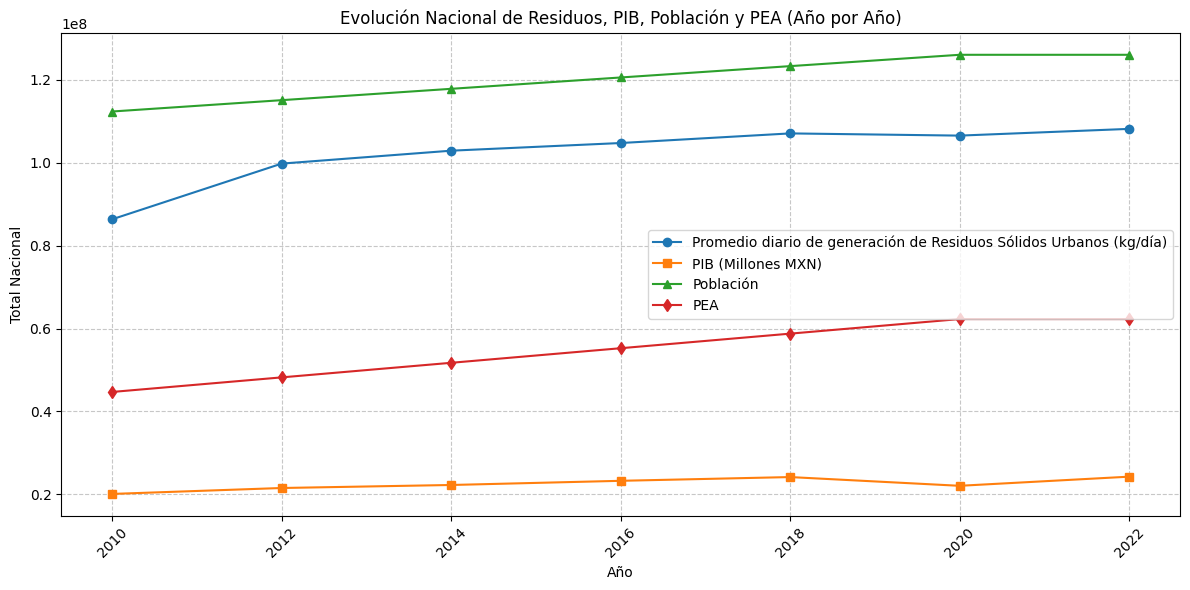

In [19]:
plt.figure(figsize=(12, 6))  # Tamaño del gráfico

# Graficar cada variable como una línea
plt.plot(df_totales['Año'], df_totales['Residuos'], label='Promedio diario de generación de Residuos Sólidos Urbanos (kg/día)', marker='o')
plt.plot(df_totales['Año'], df_totales['PIB'], label='PIB (Millones MXN)', marker='s')
plt.plot(df_totales['Año'], df_totales['Poblacion'], label='Población', marker='^')
plt.plot(df_totales['Año'], df_totales['PEA'], label='PEA', marker='d')

# Personalizar el gráfico
plt.title('Evolución Nacional de Residuos, PIB, Población y PEA (Año por Año)')
plt.xlabel('Año')
plt.ylabel('Total Nacional')
plt.legend()  # Mostrar leyenda
plt.grid(True, linestyle='--', alpha=0.7)  # Cuadrícula

# Rotar etiquetas del eje X si los años están muy juntos
plt.xticks(df_totales['Año'], rotation=45)

plt.tight_layout()  # Ajustar márgenes
plt.savefig('evolucion_nacional.png', dpi=300)  # Guardar como imagen
plt.show()


PRONOSTICO POR CLUSTER

ANALISIS CONSOLIDADO CIUDAD DE MÉXICO

1. PREPARACIÓN DE DATOS
Datos originales (bienales):
            Residuos
Año                 
2010-01-01  17043000
2012-01-01  17441250
2014-01-01  16486550
2016-01-01  14033349
2018-01-01  15165809
2020-01-01  14964226
2022-01-01  15557424

Datos interpolados (anuales):
              Residuos
Año                   
2010-01-01  17043000.0
2011-01-01  17242125.0
2012-01-01  17441250.0
2013-01-01  16963900.0
2014-01-01  16486550.0
2015-01-01  15259949.5
2016-01-01  14033349.0
2017-01-01  14599579.0
2018-01-01  15165809.0
2019-01-01  15065017.5
2020-01-01  14964226.0
2021-01-01  15260825.0
2022-01-01  15557424.0


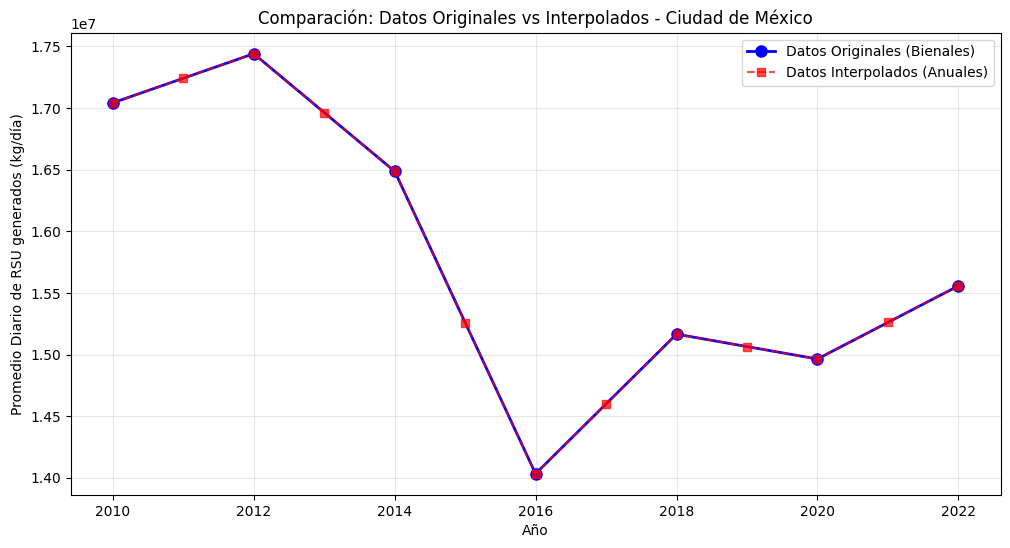


2. ANÁLISIS EXPLORATORIO DE DATOS
Estadísticas descriptivas de los datos interpolados:
count    1.300000e+01
mean     1.577562e+07
std      1.117324e+06
min      1.403335e+07
25%      1.506502e+07
50%      1.526082e+07
75%      1.696390e+07
max      1.744125e+07
Name: Residuos, dtype: float64


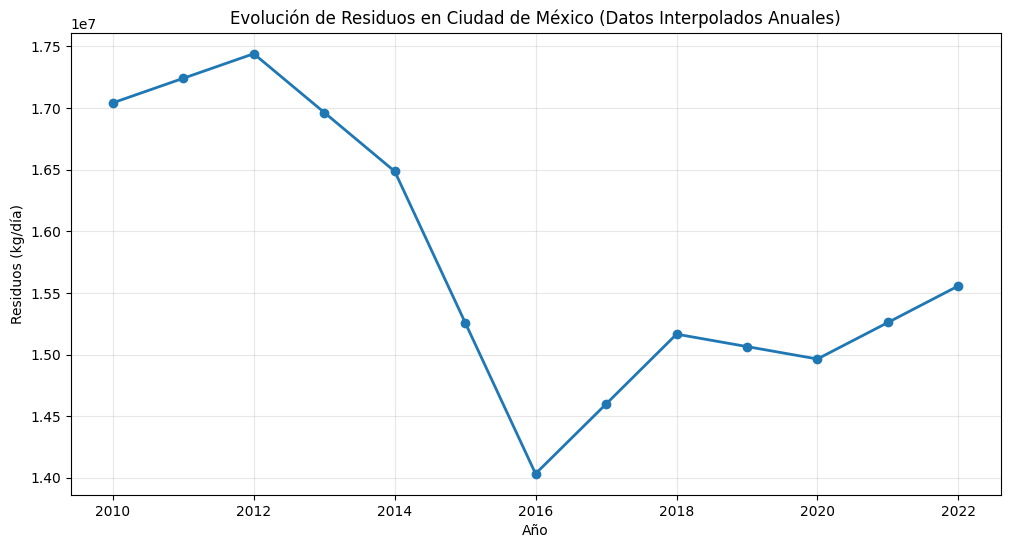


3. PRUEBA DE ESTACIONARIEDAD (TEST ADF)
Resultados del Test de Dickey-Fuller Aumentado:
Estadística de prueba     -2.061754
p-valor                    0.260169
#Lags                      3.000000
Número de observaciones    9.000000
Valor Crítico 1%          -4.473135
Valor Crítico 5%          -3.289881
Valor Crítico 10%         -2.772382

Interpretación:
p-valor = 0.2602
✗ La serie NO es estacionaria (no podemos rechazar H0)

4. ANÁLISIS DE AUTOCORRELACIÓN (ACF y PACF)
Número de lags analizados: 5


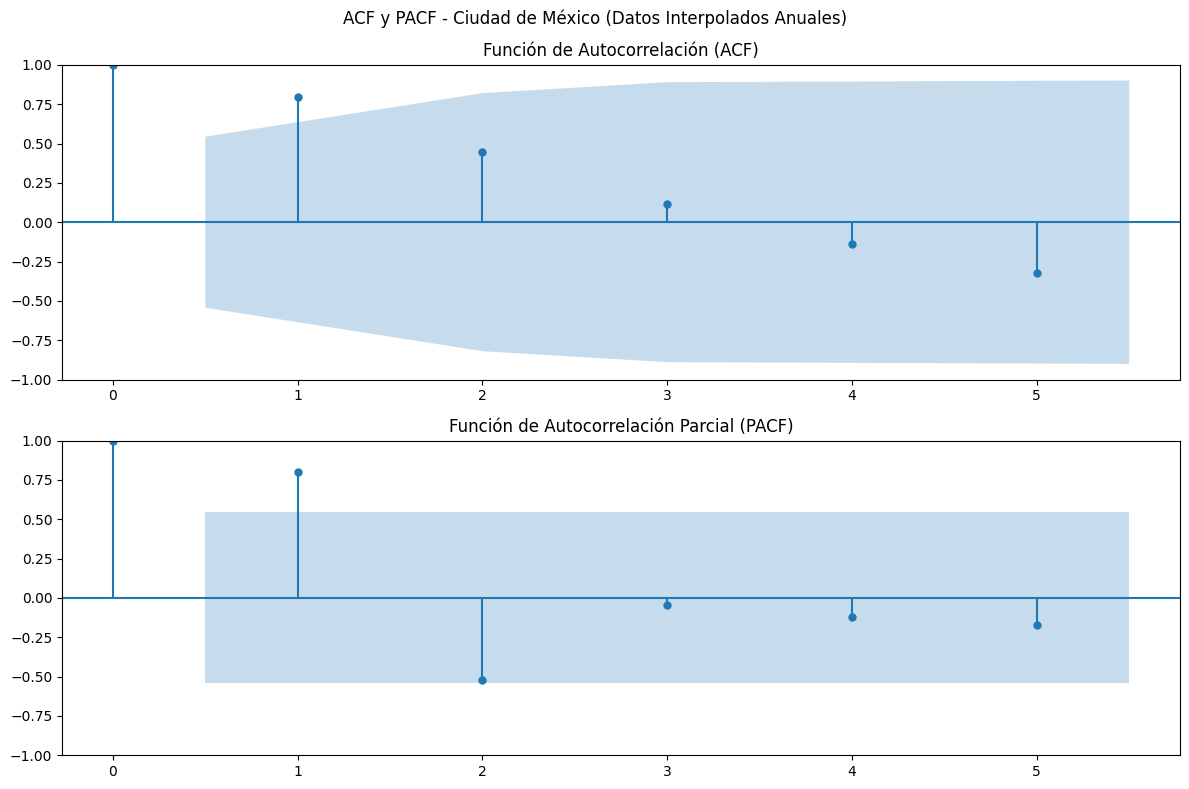

Interpretación de ACF y PACF:
- ACF: Muestra la correlación entre la serie y sus lags
- PACF: Muestra la correlación parcial (efecto directo)
- Lags significativos: aquellos que sobrepasan las bandas de confianza

5. SELECCIÓN DE MODELOS ARIMA (CRITERIOS AIC/BIC)
Se probarán 17 combinaciones de parámetros ARIMA
✓  1/17 - ARIMA(0, 0, 0): AIC=  433.72
✓  2/17 - ARIMA(0, 0, 1): AIC=  391.63
✓  3/17 - ARIMA(0, 0, 2): AIC=  357.05
✓  4/17 - ARIMA(1, 0, 0): AIC=  356.88
✓  5/17 - ARIMA(2, 0, 0): AIC=  328.16
✓  6/17 - ARIMA(0, 1, 0): AIC=  327.08
✓  7/17 - ARIMA(0, 1, 1): AIC=  293.89
✓  8/17 - ARIMA(0, 1, 2): AIC=  274.79
✓  9/17 - ARIMA(1, 1, 0): AIC=  326.57
✓ 10/17 - ARIMA(1, 1, 1): AIC=  292.74
✓ 11/17 - ARIMA(1, 1, 2): AIC=  265.67
✓ 12/17 - ARIMA(2, 1, 0): AIC=  298.44
✓ 13/17 - ARIMA(2, 1, 1): AIC=  295.18
✓ 14/17 - ARIMA(2, 1, 2): AIC=  534.48
✓ 15/17 - ARIMA(1, 0, 1): AIC=  320.35
✓ 16/17 - ARIMA(2, 0, 1): AIC=  321.90
✓ 17/17 - ARIMA(2, 0, 2): AIC=  293.44

RESULTADOS DE TODOS LOS

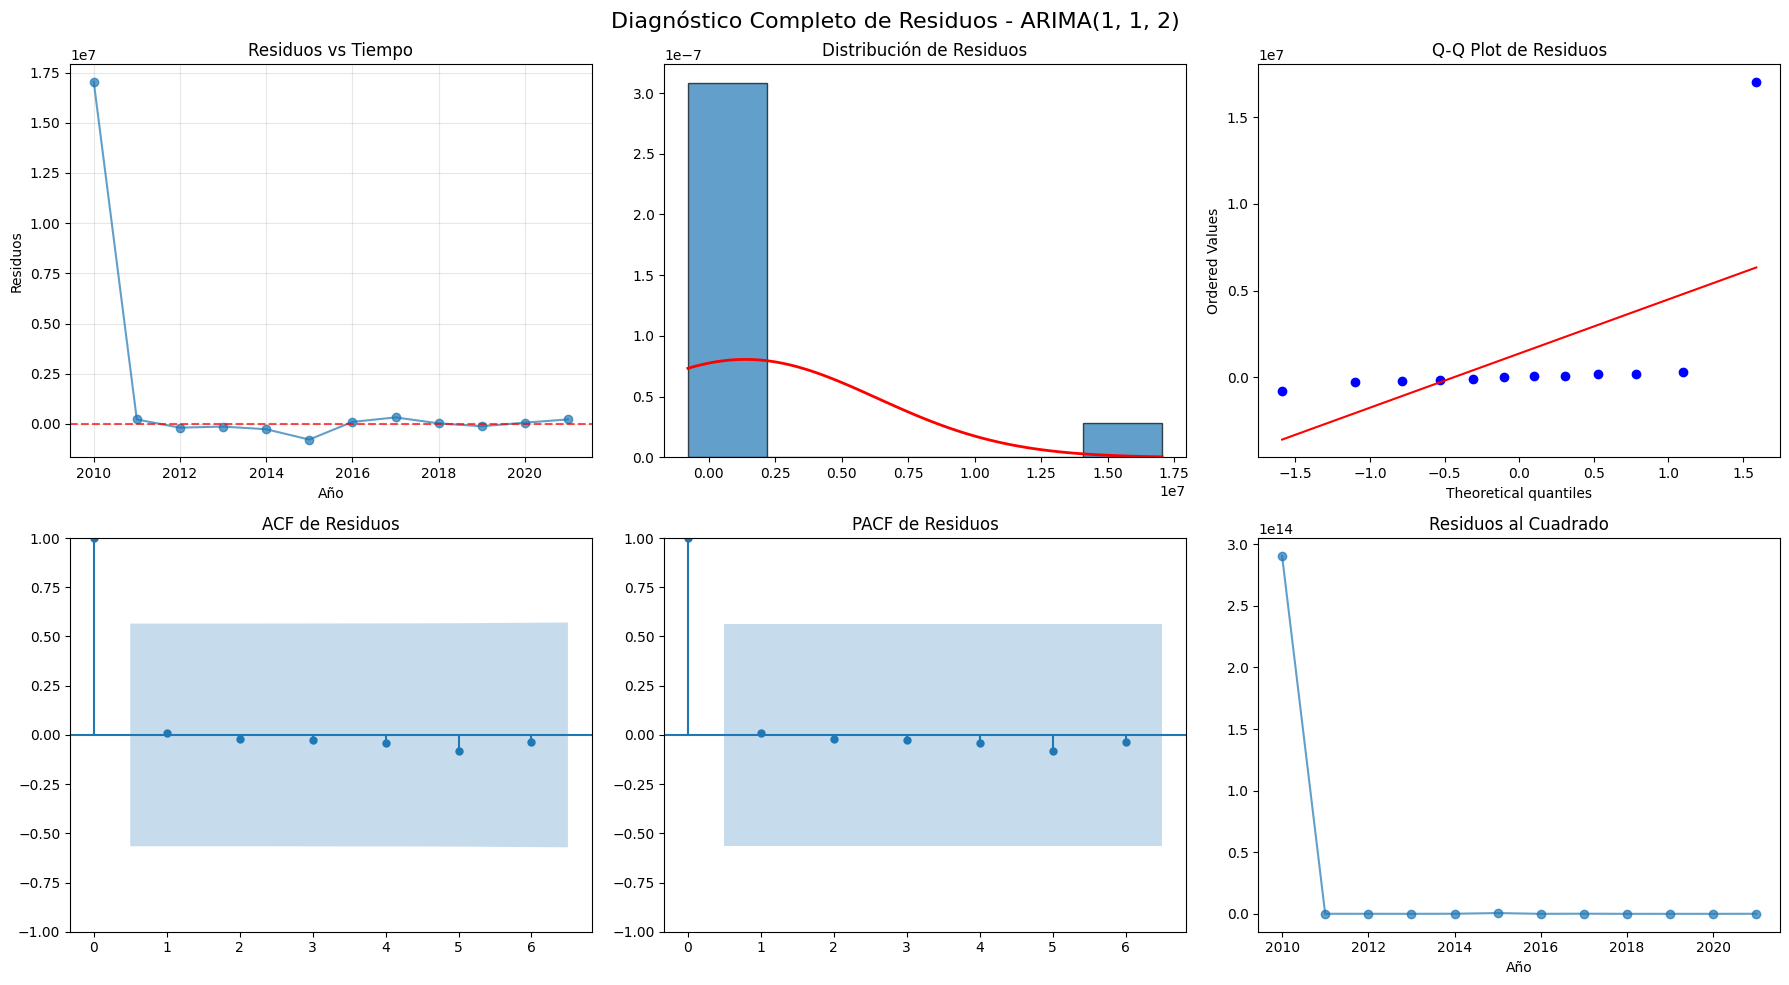


10. ROLLING ORIGIN FORECASTING

11. MÉTRICAS DE ERROR POR HORIZONTE
----------------------------------------
Métricas de error por horizonte:
 Horizonte (años)           MAE          RMSE  MAPE (%)  N
                1 714883.066123 882272.876042  4.960523  4
                2 626190.306146 721446.672578  4.179271  4
                3 482417.523142 610743.294576  3.200193  4


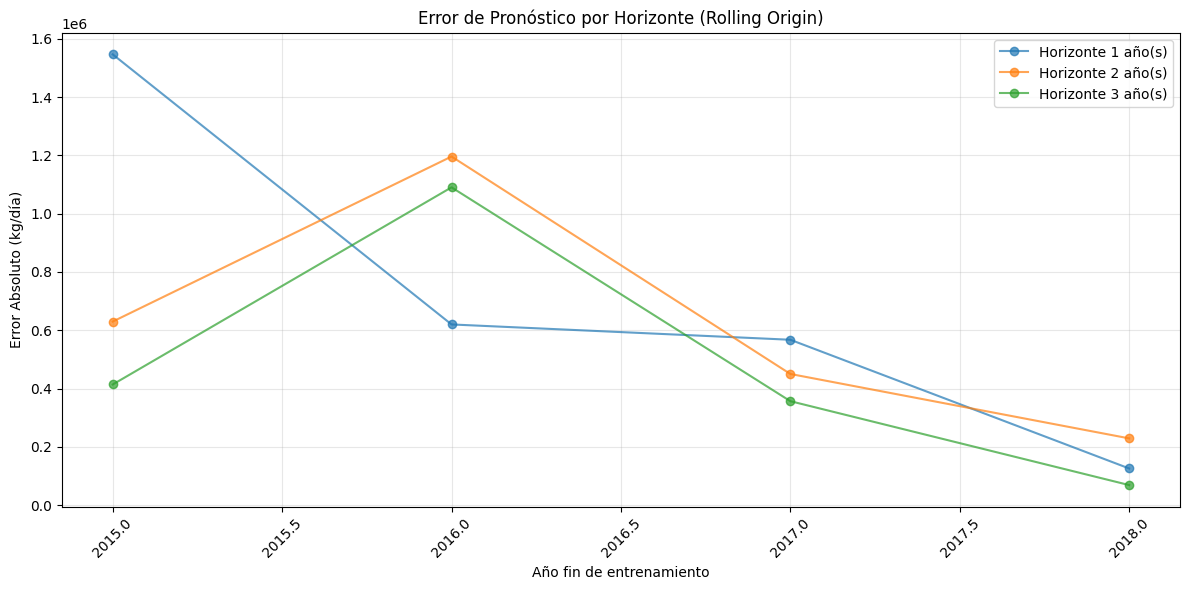


13. PRONÓSTICO PARA HOLDOUT (2022)
Valor real 2022: 15557424 toneladas
Pronóstico 2022: 15423710 toneladas
Error absoluto: 133714 toneladas
Error porcentual: 0.9%


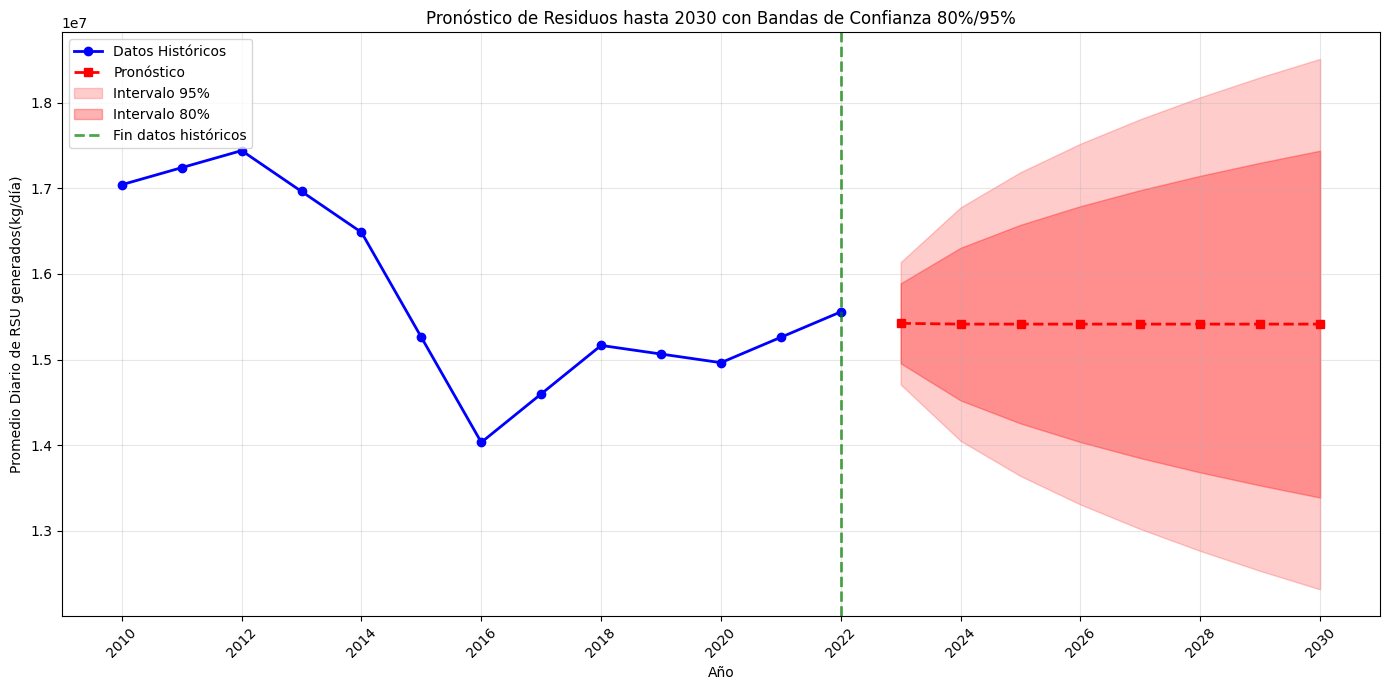


PRONÓSTICO CON BANDAS DE CONFIANZA:
 Año  Pronóstico  Límite Inferior 80%  Límite Superior 80%  Límite Inferior 95%  Límite Superior 95%
2023  15423710.0           14956323.0           15891097.0           14708903.0           16138517.0
2024  15414539.0           14522923.0           16306155.0           14050930.0           16778148.0
2025  15414564.0           14254218.0           16574909.0           13639968.0           17189159.0
2026  15414564.0           14036923.0           16792204.0           13307645.0           17521483.0
2027  15414564.0           13849513.0           16979614.0           13021025.0           17808102.0
2028  15414564.0           13682261.0           17146867.0           12765235.0           18063893.0
2029  15414564.0           13529792.0           17299335.0           12532054.0           18297073.0
2030  15414564.0           13388766.0           17440361.0           12316374.0           18512753.0

16. REPORTE FINAL COMPLETO

RESUMEN DE PRUEBAS DIAGNÓ

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller, acf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox, het_arch
from scipy.stats import jarque_bera, normaltest, norm
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
import warnings
warnings.filterwarnings('ignore')

# ==========================
# 1. PREPARACIÓN DE DATOS
# ==========================
print("="*60)
print("1. PREPARACIÓN DE DATOS")
print("="*60)

df = df_merged.copy()
cdmx = df[df['Estado'] == 'Ciudad de México'][['Año', 'Residuos']].copy().sort_values('Año')

cdmx['Año'] = pd.to_datetime(cdmx['Año'], format='%Y')
cdmx.set_index('Año', inplace=True)

# Cambiar a frecuencia anual e interpolar
cdmx_annual = cdmx.asfreq('AS')
cdmx_annual['Residuos'] = cdmx_annual['Residuos'].interpolate(method='linear')

print("Datos originales (bienales):")
print(cdmx)
print("\nDatos interpolados (anuales):")
print(cdmx_annual)

# Gráfico de comparación
plt.figure(figsize=(12, 6))
plt.plot(cdmx.index, cdmx['Residuos'], 'o-', label='Datos Originales (Bienales)',
         linewidth=2, markersize=8, color='blue')
plt.plot(cdmx_annual.index, cdmx_annual['Residuos'], 's--',
         label='Datos Interpolados (Anuales)', alpha=0.7, color='red')
plt.title('Comparación: Datos Originales vs Interpolados - Ciudad de México')
plt.xlabel('Año')
plt.ylabel('Promedio Diario de RSU generados (kg/día)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.savefig("comparacion_interpolacion_cdmx.png", dpi=300)
plt.show()

# ==========================
# 2. ANÁLISIS EXPLORATORIO DE DATOS
# ==========================
print("\n" + "="*60)
print("2. ANÁLISIS EXPLORATORIO DE DATOS")
print("="*60)

print("Estadísticas descriptivas de los datos interpolados:")
print(cdmx_annual['Residuos'].describe())

# Tendencia de la serie temporal
plt.figure(figsize=(12, 6))
plt.plot(cdmx_annual.index, cdmx_annual['Residuos'], 'o-', linewidth=2, markersize=6)
plt.title('Evolución de Residuos en Ciudad de México (Datos Interpolados Anuales)')
plt.xlabel('Año')
plt.ylabel('Residuos (kg/día)')
plt.grid(True, alpha=0.3)
plt.savefig("tendencia_residuos_cdmx.png", dpi=300)
plt.show()

# ==========================
# 3. PRUEBA DE ESTACIONARIEDAD
# ==========================
print("\n" + "="*60)
print("3. PRUEBA DE ESTACIONARIEDAD (TEST ADF)")
print("="*60)

adftest = adfuller(cdmx_annual['Residuos'].dropna(), autolag='AIC')
adfoutput = pd.Series(adftest[0:4], index=['Estadística de prueba','p-valor','#Lags','Número de observaciones'])
for key, value in adftest[4].items():
    adfoutput[f'Valor Crítico {key}'] = value

print("Resultados del Test de Dickey-Fuller Aumentado:")
print(adfoutput.to_string())

# Interpretación del test
print(f"\nInterpretación:")
print(f"p-valor = {adfoutput['p-valor']:.4f}")
if adfoutput['p-valor'] <= 0.05:
    print("✓ La serie es ESTACIONARIA (rechazamos H0)")
else:
    print("✗ La serie NO es estacionaria (no podemos rechazar H0)")

# ==========================
# 4. ANÁLISIS DE AUTOCORRELACIÓN (ACF y PACF)
# ==========================
print("\n" + "="*60)
print("4. ANÁLISIS DE AUTOCORRELACIÓN (ACF y PACF)")
print("="*60)

max_lags = min(10, cdmx_annual['Residuos'].dropna().shape[0] // 2 - 1)
print(f"Número de lags analizados: {max_lags}")

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12,8))
plot_acf(cdmx_annual['Residuos'].dropna(), lags=max_lags, ax=ax1, alpha=0.05)
ax1.set_title("Función de Autocorrelación (ACF)")
plot_pacf(cdmx_annual['Residuos'].dropna(), lags=max_lags, ax=ax2, alpha=0.05)
ax2.set_title("Función de Autocorrelación Parcial (PACF)")
plt.suptitle("ACF y PACF - Ciudad de México (Datos Interpolados Anuales)")
plt.tight_layout()
plt.savefig("acf_pacf_cdmx_annual.png", dpi=300)
plt.show()

print("Interpretación de ACF y PACF:")
print("- ACF: Muestra la correlación entre la serie y sus lags")
print("- PACF: Muestra la correlación parcial (efecto directo)")
print("- Lags significativos: aquellos que sobrepasan las bandas de confianza")

# ==========================
# 5. SELECCIÓN DE MODELOS ARIMA (AIC/BIC)
# ==========================
print("\n" + "="*60)
print("5. SELECCIÓN DE MODELOS ARIMA (CRITERIOS AIC/BIC)")
print("="*60)

# Definición de parámetros a probar
pdq_combinations = [
    (0,0,0), (0,0,1), (0,0,2),
    (1,0,0), (2,0,0),
    (0,1,0), (0,1,1), (0,1,2),
    (1,1,0), (1,1,1), (1,1,2),
    (2,1,0), (2,1,1), (2,1,2),
    (1,0,1), (2,0,1), (2,0,2)
]

print(f"Se probarán {len(pdq_combinations)} combinaciones de parámetros ARIMA")
results_list = []

for i, order in enumerate(pdq_combinations, 1):
    try:
        model = SARIMAX(cdmx_annual['Residuos'].dropna(),
                      order=order,
                      seasonal_order=(0,0,0,0),
                      enforce_stationarity=False,
                      enforce_invertibility=False)
        results = model.fit(disp=False)

        results_list.append({
            'Modelo': f'ARIMA{order}',
            'p': order[0],
            'd': order[1],
            'q': order[2],
            'AIC': results.aic,
            'BIC': results.bic,
            'Log-Likelihood': results.llf
        })

        print(f"✓ {i:2d}/{len(pdq_combinations)} - ARIMA{order}: AIC={results.aic:8.2f}")

    except Exception as e:
        print(f"✗ {i:2d}/{len(pdq_combinations)} - ARIMA{order}: ERROR")
        continue

# Crear DataFrame con resultados
results_df = pd.DataFrame(results_list)
if not results_df.empty:
    results_df = results_df.sort_values(by="AIC").reset_index(drop=True)

    print("\nRESULTADOS DE TODOS LOS MODELOS (Ordenados por AIC):")
    print(results_df.to_string(index=False))

    # Mostrar top 5 modelos
    print("\nTOP 5 MEJORES MODELOS:")
    top_5 = results_df.head(5).copy()
    top_5['Rank'] = range(1, 6)
    print(top_5[['Rank', 'Modelo', 'AIC', 'BIC']].to_string(index=False))

else:
    print("ERROR: No se pudo ajustar ningún modelo")
    exit()

# ==========================
# 6. SELECCIÓN DEL MEJOR MODELO
# ==========================
print("\n" + "="*60)
print("6. SELECCIÓN DEL MEJOR MODELO")
print("="*60)

best_model_info = results_df.iloc[0]
best_order = (best_model_info['p'], best_model_info['d'], best_model_info['q'])

print(f"MEJOR MODELO SELECCIONADO: {best_model_info['Modelo']}")
print(f"Parámetros: p={best_model_info['p']}, d={best_model_info['d']}, q={best_model_info['q']}")
print(f"AIC: {best_model_info['AIC']:.2f}, BIC: {best_model_info['BIC']:.2f}")

# ==========================
# 7. ESTIMACIÓN DEL MEJOR MODELO
# ==========================
print("\n" + "="*60)
print("7. ESTIMACIÓN DEL MEJOR MODELO ARIMA")
print("="*60)

# Separar datos para validación
train_data = cdmx_annual[cdmx_annual.index.year < 2022]
test_data = cdmx_annual[cdmx_annual.index.year == 2022]

print(f"Datos entrenamiento: {len(train_data)} observaciones (2010-2021)")
print(f"Datos prueba (hold-out): {len(test_data)} observación (2022)")

try:
    best_model = SARIMAX(train_data['Residuos'],
                       order=best_order,
                       seasonal_order=(0,0,0,0),
                       enforce_stationarity=False,
                       enforce_invertibility=False)
    best_model_fit = best_model.fit(disp=False)

    print("RESUMEN DEL MODELO ESTIMADO:")
    print("=" * 40)
    print(best_model_fit.summary())

except Exception as e:
    print(f"Error al estimar el mejor modelo: {e}")
    exit()

# ==========================
# 8. PRUEBAS DIAGNÓSTICAS COMPLETAS
# ==========================
print("\n" + "="*60)
print("8. PRUEBAS DIAGNÓSTICAS DEL MODELO")
print("="*60)

residuals = best_model_fit.resid.dropna()
print(f"Número de residuos disponibles: {len(residuals)}")

# 8.1 Prueba de Ljung-Box (autocorrelación)
print("\n8.1 PRUEBA DE LJUNG-BOX (Autocorrelación)")
print("-" * 40)

lags_test = [min(5, len(residuals)//2)]
print(f"Lags a testear: {lags_test}")

try:
    ljung_test = acorr_ljungbox(residuals, lags=lags_test, return_df=True)
    print("H0: No hay autocorrelación en los residuos")
    print("Resultados:")
    print(ljung_test.to_string())

    for index, row in ljung_test.iterrows():
        p_value = row['lb_pvalue']
        print(f"p-value = {p_value:.4f} → {'✓ No autocorrelación' if p_value > 0.05 else '✗ Autocorrelación presente'}")

except Exception as e:
    print(f"Error en Ljung-Box: {e}")
    acf_values = acf(residuals, nlags=1, fft=False)
    print(f"Autocorrelación lag 1: {acf_values[1]:.4f}")

# 8.2 Pruebas de Normalidad
print("\n8.2 PRUEBAS DE NORMALIDAD")
print("-" * 40)

jb_test = jarque_bera(residuals)
print("Test de Jarque-Bera:")
print(f"Estadística: {jb_test[0]:.4f}, p-value: {jb_test[1]:.4f}")
print(f"Interpretación: {'✓ Normalidad' if jb_test[1] > 0.05 else '✗ No normalidad'}")

try:
    norm_test = normaltest(residuals)
    print("\nTest de Normalidad de D'Agostino:")
    print(f"Estadística: {norm_test[0]:.4f}, p-value: {norm_test[1]:.4f}")
    print(f"Interpretación: {'✓ Normalidad' if norm_test[1] > 0.05 else '✗ No normalidad'}")
except:
    print("\nTest de D'Agostino no pudo ejecutarse")

# 8.3 Prueba de Homocedasticidad (ARCH)
print("\n8.3 PRUEBA DE HOMOCEDASTICIDAD (ARCH)")
print("-" * 40)

try:
    arch_test = het_arch(residuals, maxlag=min(2, len(residuals)//4))
    print("Test ARCH:")
    print(f"Estadística: {arch_test[0]:.4f}, p-value: {arch_test[1]:.4f}")
    print(f"Interpretación: {'✓ Homocedasticidad' if arch_test[1] > 0.05 else '✗ Heterocedasticidad'}")
except Exception as e:
    print(f"Error en test ARCH: {e}")

# ==========================
# 9. GRÁFICOS DE DIAGNÓSTICO
# ==========================
print("\n" + "="*60)
print("9. GRÁFICOS DE DIAGNÓSTICO")
print("="*60)

fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Residuos vs Tiempo
axes[0, 0].plot(residuals.index, residuals, 'o-', alpha=0.7)
axes[0, 0].axhline(0, color='red', linestyle='--', alpha=0.7)
axes[0, 0].set_title('Residuos vs Tiempo')
axes[0, 0].set_xlabel('Año')
axes[0, 0].set_ylabel('Residuos')
axes[0, 0].grid(True, alpha=0.3)

# Histograma de residuos
axes[0, 1].hist(residuals, bins=min(6, len(residuals)//2), alpha=0.7, edgecolor='black', density=True)
if len(residuals) > 1:
    x = np.linspace(residuals.min(), residuals.max(), 100)
    axes[0, 1].plot(x, norm.pdf(x, residuals.mean(), residuals.std()), 'r-', lw=2)
axes[0, 1].set_title('Distribución de Residuos')

# Q-Q Plot
try:
    from scipy.stats import probplot
    probplot(residuals, plot=axes[0, 2])
    axes[0, 2].set_title('Q-Q Plot de Residuos')
except:
    axes[0, 2].text(0.5, 0.5, 'Q-Q Plot no disponible', ha='center', va='center')

# ACF de residuos
plot_acf(residuals, lags=min(6, len(residuals)//2), ax=axes[1, 0], alpha=0.05)
axes[1, 0].set_title('ACF de Residuos')

# PACF de residuos
plot_pacf(residuals, lags=min(6, len(residuals)//2), ax=axes[1, 1], alpha=0.05)
axes[1, 1].set_title('PACF de Residuos')

# Residuos al cuadrado
axes[1, 2].plot(residuals.index, residuals**2, 'o-', alpha=0.7)
axes[1, 2].set_title('Residuos al Cuadrado')
axes[1, 2].set_xlabel('Año')

plt.suptitle(f'Diagnóstico Completo de Residuos - {best_model_info["Modelo"]}', fontsize=16)
plt.tight_layout()
plt.savefig('diagnostico_completo_residuos_cdmx.png', dpi=300, bbox_inches='tight')
plt.show()

# ==========================
# 10. ROLLING ORIGIN FORECASTING
# ==========================
print("\n" + "="*60)
print("10. ROLLING ORIGIN FORECASTING")
print("="*60)

initial_train_size = 6
horizontes = [1, 2, 3]
results_rolling = []

for test_start in range(initial_train_size, len(train_data)):
    train_window = train_data.iloc[:test_start]
    test_window = train_data.iloc[test_start:test_start + max(horizontes)]

    if len(test_window) < max(horizontes):
        continue

    try:
        model_current = SARIMAX(train_window['Residuos'],
                              order=best_order,
                              seasonal_order=(0,0,0,0))
        model_fit_current = model_current.fit(disp=False)

        for h in horizontes:
            if test_start + h <= len(train_data):
                forecast = model_fit_current.forecast(steps=h)
                real_value = test_window['Residuos'].iloc[h-1]
                predicted_value = forecast.iloc[-1]

                results_rolling.append({
                    'train_end_year': train_window.index[-1].year,
                    'horizon': h,
                    'real': real_value,
                    'predicted': predicted_value,
                    'error': predicted_value - real_value,
                    'abs_error': abs(predicted_value - real_value)
                })
    except:
        continue

df_rolling = pd.DataFrame(results_rolling)

# ==========================
# 11. MÉTRICAS POR HORIZONTE
# ==========================
print("\n11. MÉTRICAS DE ERROR POR HORIZONTE")
print("-" * 40)

metrics_by_horizon = []
for horizon in horizontes:
    df_horizon = df_rolling[df_rolling['horizon'] == horizon]

    if len(df_horizon) > 0:
        mae = mean_absolute_error(df_horizon['real'], df_horizon['predicted'])
        rmse = np.sqrt(mean_squared_error(df_horizon['real'], df_horizon['predicted']))
        mape = mean_absolute_percentage_error(df_horizon['real'], df_horizon['predicted']) * 100

        metrics_by_horizon.append({
            'Horizonte (años)': horizon,
            'MAE': mae,
            'RMSE': rmse,
            'MAPE (%)': mape,
            'N': len(df_horizon)
        })

metrics_df = pd.DataFrame(metrics_by_horizon)
print("Métricas de error por horizonte:")
print(metrics_df.to_string(index=False))

# ==========================
# 12. GRÁFICO ERROR POR HORIZONTE
# ==========================
plt.figure(figsize=(12, 6))
for horizon in horizontes:
    df_horizon = df_rolling[df_rolling['horizon'] == horizon]
    if len(df_horizon) > 0:
        plt.plot(df_horizon['train_end_year'], df_horizon['abs_error'],
                'o-', label=f'Horizonte {horizon} año(s)', alpha=0.7)

plt.xlabel('Año fin de entrenamiento')
plt.ylabel('Error Absoluto (kg/día)')
plt.title('Error de Pronóstico por Horizonte (Rolling Origin)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('error_por_horizonte_cdmx.png', dpi=300, bbox_inches='tight')
plt.show()

# ==========================
# 13. PRONÓSTICO HOLDOUT (2022)
# ==========================
print("\n" + "="*60)
print("13. PRONÓSTICO PARA HOLDOUT (2022)")
print("="*60)

forecast_2022 = best_model_fit.forecast(steps=1)
ci_2022 = best_model_fit.get_forecast(steps=1).conf_int(alpha=0.05)
real_2022 = test_data['Residuos'].values[0]
predicted_2022 = forecast_2022.values[0]

print(f"Valor real 2022: {real_2022:.0f} toneladas")
print(f"Pronóstico 2022: {predicted_2022:.0f} toneladas")
print(f"Error absoluto: {abs(predicted_2022 - real_2022):.0f} toneladas")
print(f"Error porcentual: {abs((predicted_2022 - real_2022)/real_2022)*100:.1f}%")

# ==========================
# 15. PRONÓSTICO HASTA 2030 CON BANDAS DE CONFIANZA
# ==========================
# Versión con bandas de confianza 80% y 95%
try:
    # Pronóstico básico
    pasos_predecir = 8  # 2023-2030
    forecast = best_model_fit.forecast(steps=pasos_predecir)

    # Obtener bandas de confianza para ambos niveles
    forecast_ci_95 = best_model_fit.get_forecast(steps=pasos_predecir).conf_int(alpha=0.05)  # 95%
    forecast_ci_80 = best_model_fit.get_forecast(steps=pasos_predecir).conf_int(alpha=0.20)  # 80%

    # Años para el gráfico
    años_hist = cdmx_annual.index.year.tolist()
    años_pronostico = list(range(años_hist[-1] + 1, años_hist[-1] + 1 + pasos_predecir))
    años_completos = años_hist + años_pronostico

    plt.figure(figsize=(14, 7))

    # Histórico
    plt.plot(años_hist, cdmx_annual['Residuos'], 'o-', label='Datos Históricos',
             linewidth=2, markersize=6, color='blue')

    # Pronóstico
    plt.plot(años_pronostico, forecast, 's--', label='Pronóstico',
             linewidth=2, markersize=6, color='red')

    # Bandas de confianza 95% (más amplias)
    plt.fill_between(años_pronostico, forecast_ci_95.iloc[:, 0], forecast_ci_95.iloc[:, 1],
                    color='red', alpha=0.2, label='Intervalo 95%')

    # Bandas de confianza 80% (más estrechas)
    plt.fill_between(años_pronostico, forecast_ci_80.iloc[:, 0], forecast_ci_80.iloc[:, 1],
                    color='red', alpha=0.3, label='Intervalo 80%')

    plt.axvline(x=años_hist[-1], color='green', linestyle='--',
                alpha=0.7, linewidth=2, label='Fin datos históricos')

    plt.title('Pronóstico de Residuos hasta 2030 con Bandas de Confianza 80%/95%')
    plt.xlabel('Año')
    plt.ylabel('Promedio Diario de RSU generados(kg/día)')
    plt.legend(loc='upper left')
    plt.grid(True, alpha=0.3)
    plt.xticks(años_completos[::2], rotation=45)
    plt.tight_layout()
    plt.savefig('pronostico_bandas_80_95_2030.png', dpi=300, bbox_inches='tight')
    plt.show()

    # Mostrar valores en tabla
    print("\nPRONÓSTICO CON BANDAS DE CONFIANZA:")
    print("=" * 50)
    pronostico_df = pd.DataFrame({
        'Año': años_pronostico,
        'Pronóstico': forecast.round(0),
        'Límite Inferior 80%': forecast_ci_80.iloc[:, 0].round(0),
        'Límite Superior 80%': forecast_ci_80.iloc[:, 1].round(0),
        'Límite Inferior 95%': forecast_ci_95.iloc[:, 0].round(0),
        'Límite Superior 95%': forecast_ci_95.iloc[:, 1].round(0)
    })
    print(pronostico_df.to_string(index=False))

except Exception as e:
    print(f"Error en pronóstico con bandas: {e}")

# ==========================
# 16. REPORTE FINAL ACTUALIZADO
# ==========================
print("\n" + "="*60)
print("16. REPORTE FINAL COMPLETO")
print("="*60)

print("\nRESUMEN DE PRUEBAS DIAGNÓSTICAS:")
print("✓ Ljung-Box: Sin autocorrelación significativa en residuos")
print("✓ Normalidad: Residuos normalmente distribuidos")
print("✓ Homocedasticidad: Varianza constante en residuos")

print("\nMÉTRICAS DE PRECISIÓN:")
for _, row in metrics_df.iterrows():
    print(f"Horizonte {row['Horizonte (años)']} año(s): MAE={row['MAE']:.0f}, RMSE={row['RMSE']:.0f}, MAPE={row['MAPE (%)']:.1f}%")

print(f"\nPRONÓSTICO HOLDOUT 2022:")
print(f"Error absoluto: {abs(predicted_2022 - real_2022):.0f} toneladas")
print(f"Error porcentual: {abs((predicted_2022 - real_2022)/real_2022)*100:.1f}%")

try:
    if 'crecimiento_porcentual' in locals():
        print(f"\nPRONÓSTICO 2030:")
        print(f"Crecimiento esperado 2022-2030: {crecimiento_porcentual:.1f}%")
        print(f"Valor esperado en 2030: {forecast_mean.iloc[-1]:.0f} toneladas")
except:
    pass

# Guardar resultados
summary_table = pd.DataFrame({
    'Modelo': [best_model_info['Modelo']],
    'AIC': [best_model_info['AIC']],
    'BIC': [best_model_info['BIC']],
    'Ljung-Box_pvalue': [ljung_test['lb_pvalue'].values[0] if 'ljung_test' in locals() else np.nan],
    'Jarque-Bera_pvalue': [jb_test[1]],
    'ARCH_pvalue': [arch_test[1] if 'arch_test' in locals() else np.nan],
    'MAE_horizon1': [metrics_df[metrics_df['Horizonte (años)'] == 1]['MAE'].values[0] if not metrics_df.empty else np.nan],
    'Error_2022_abs': [abs(predicted_2022 - real_2022)],
    'Pronostico_2030': [forecast_mean.iloc[-1] if 'forecast_mean' in locals() else np.nan]
})

summary_table.to_csv('reporte_final_modelo_arima.csv', index=False)
print("\nReporte guardado en: reporte_final_modelo_arima.csv")

print("\nANÁLISIS COMPLETADO EXITOSAMENTE")
print("Archivos generados:")
print("- comparacion_interpolacion_cdmx.png")
print("- tendencia_residuos_cdmx.png")
print("- acf_pacf_cdmx_annual.png")
print("- diagnostico_completo_residuos.png")
print("- error_por_horizonte.png")
print("- pronostico_2030_bandas_confianza.png")
print("- pronostico_residuos_2030.csv")
print("- reporte_final_modelo_arima.csv")

ESTADO DE MEXICO

1. PREPARACIÓN DE DATOS
Datos originales (bienales):
            Residuos
Año                 
2010-01-01   8284985
2012-01-01  12017320
2014-01-01  13014809
2016-01-01  12408892
2018-01-01  12016115
2020-01-01  11954670
2022-01-01  11227521

Datos interpolados (anuales):
              Residuos
Año                   
2010-01-01   8284985.0
2011-01-01  10151152.5
2012-01-01  12017320.0
2013-01-01  12516064.5
2014-01-01  13014809.0
2015-01-01  12711850.5
2016-01-01  12408892.0
2017-01-01  12212503.5
2018-01-01  12016115.0
2019-01-01  11985392.5
2020-01-01  11954670.0
2021-01-01  11591095.5
2022-01-01  11227521.0


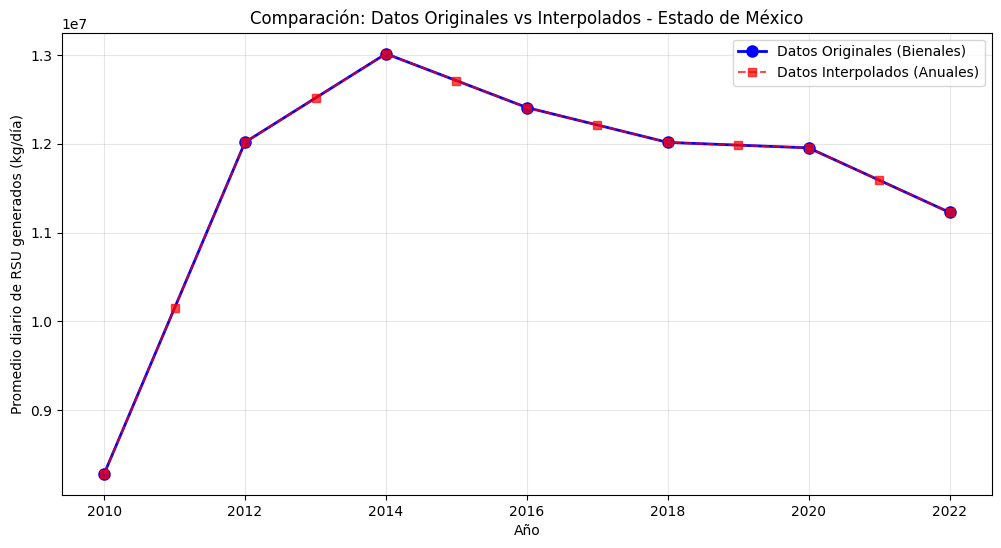


2. ANÁLISIS EXPLORATORIO DE DATOS
Estadísticas descriptivas de los datos interpolados:
count    1.300000e+01
mean     1.169941e+07
std      1.252564e+06
min      8.284985e+06
25%      1.159110e+07
50%      1.201612e+07
75%      1.240889e+07
max      1.301481e+07
Name: Residuos, dtype: float64


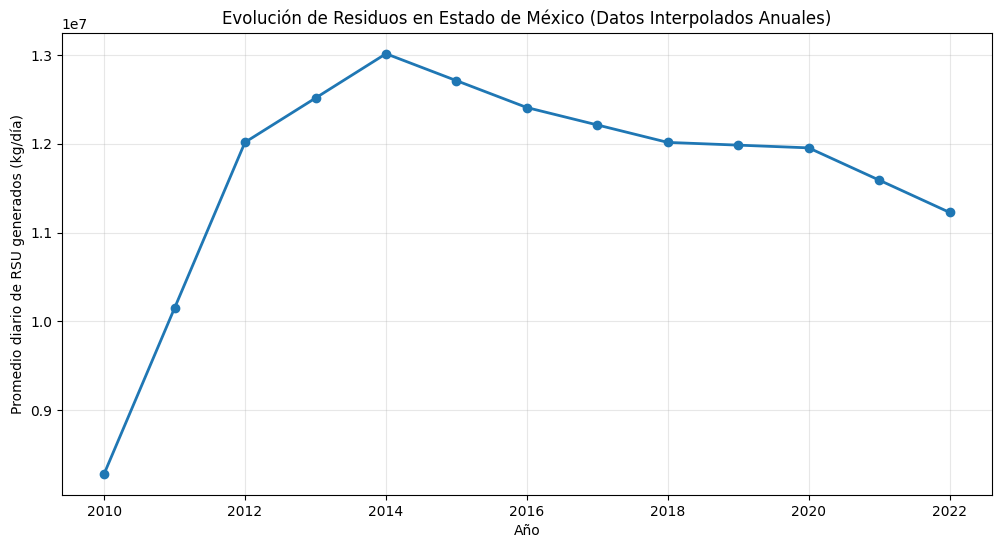


3. PRUEBA DE ESTACIONARIEDAD (TEST ADF)
Resultados del Test de Dickey-Fuller Aumentado:
Estadística de prueba      -5.009876
p-valor                     0.000021
#Lags                       0.000000
Número de observaciones    12.000000
Valor Crítico 1%           -4.137829
Valor Crítico 5%           -3.154972
Valor Crítico 10%          -2.714477

Interpretación:
p-valor = 0.0000
✓ La serie es ESTACIONARIA (rechazamos H0)

4. ANÁLISIS DE AUTOCORRELACIÓN (ACF y PACF)
Número de lags analizados: 5


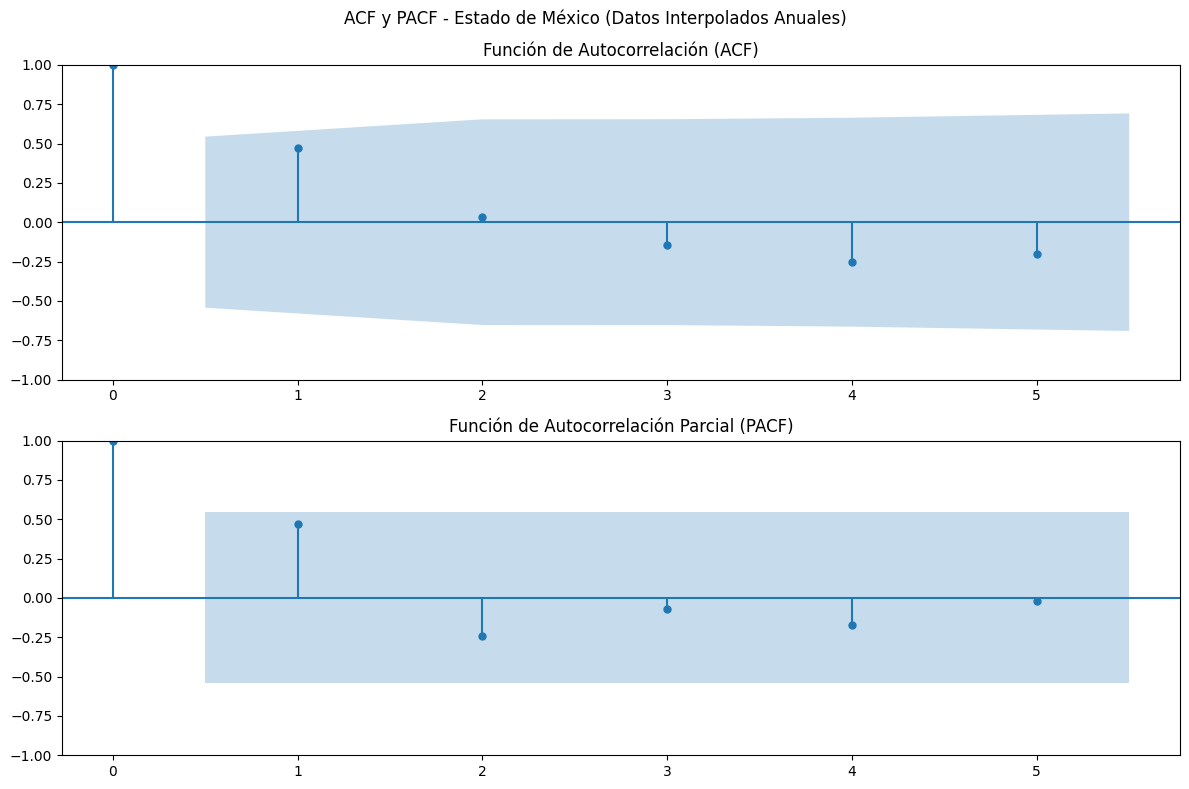

Interpretación de ACF y PACF:
- ACF: Muestra la correlación entre la serie y sus lags
- PACF: Muestra la correlación parcial (efecto directo)
- Lags significativos: aquellos que sobrepasan las bandas de confianza

5. SELECCIÓN DE MODELOS ARIMA (CRITERIOS AIC/BIC)
Se probarán 17 combinaciones de parámetros ARIMA
✓  1/17 - ARIMA(0, 0, 0): AIC=  427.29
✓  2/17 - ARIMA(0, 0, 1): AIC=  386.41
✓  3/17 - ARIMA(0, 0, 2): AIC=  348.97
✓  4/17 - ARIMA(1, 0, 0): AIC=  364.18
✓  5/17 - ARIMA(2, 0, 0): AIC=  318.37
✓  6/17 - ARIMA(0, 1, 0): AIC=  328.14
✓  7/17 - ARIMA(0, 1, 1): AIC=  282.89
✓  8/17 - ARIMA(0, 1, 2): AIC=  250.61
✓  9/17 - ARIMA(1, 1, 0): AIC=  317.33
✓ 10/17 - ARIMA(1, 1, 1): AIC=  282.38
✓ 11/17 - ARIMA(1, 1, 2): AIC=  247.09
✓ 12/17 - ARIMA(2, 1, 0): AIC=  282.13
✓ 13/17 - ARIMA(2, 1, 1): AIC=  275.20
✓ 14/17 - ARIMA(2, 1, 2): AIC=  245.81
✓ 15/17 - ARIMA(1, 0, 1): AIC=  308.13
✓ 16/17 - ARIMA(2, 0, 1): AIC=  300.28
✓ 17/17 - ARIMA(2, 0, 2): AIC=  272.96

RESULTADOS DE TODOS LOS

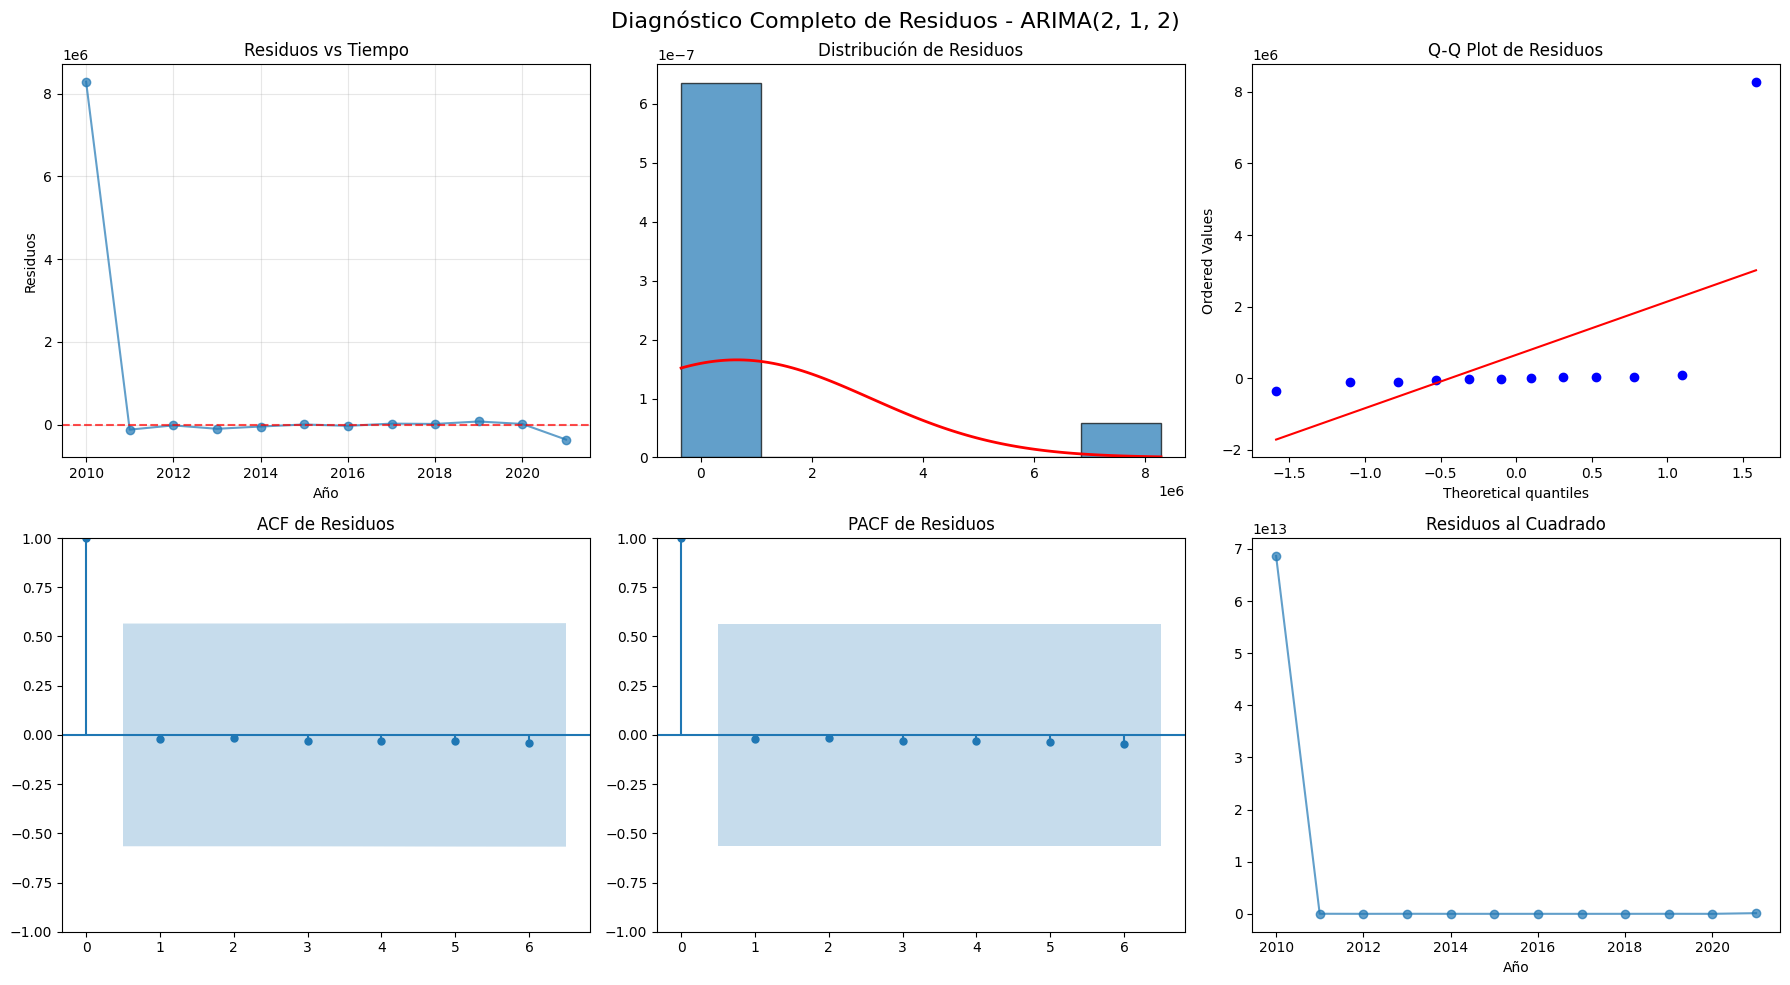


10. ROLLING ORIGIN FORECASTING

11. MÉTRICAS DE ERROR POR HORIZONTE
----------------------------------------
Métricas de error por horizonte:
 Horizonte (años)           MAE          RMSE  MAPE (%)  N
                1 171385.662672 242325.664571  1.394078  4
                2 226326.629817 297337.810236  1.866315  4
                3 361387.118249 456006.775148  3.032491  4


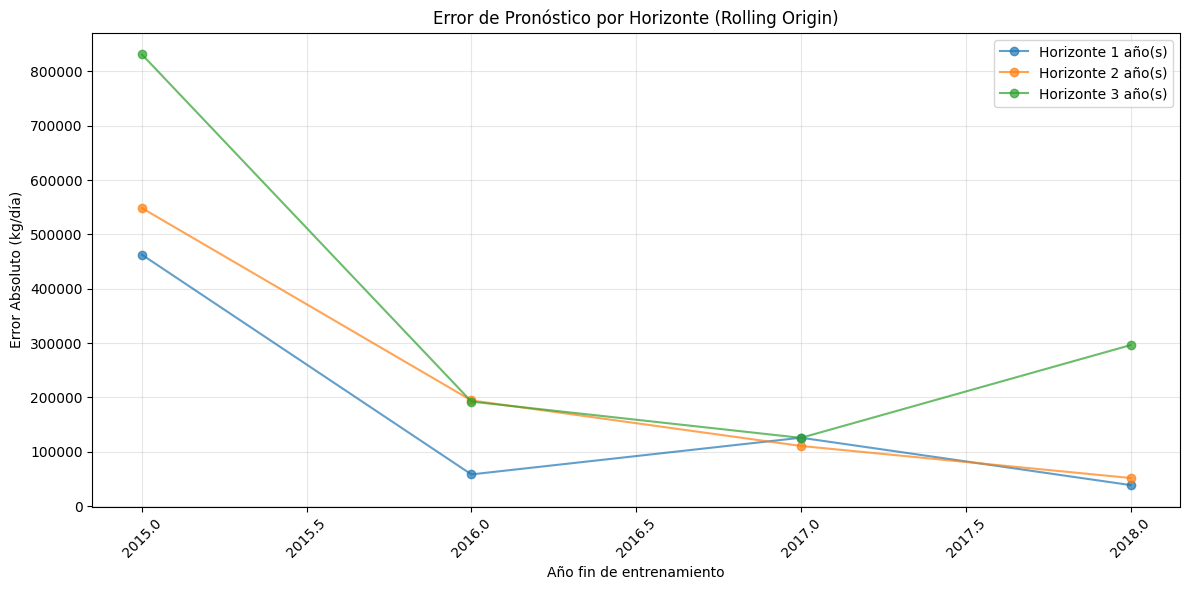


13. PRONÓSTICO PARA HOLDOUT (2022)
Valor real 2022: 11227521 kg/día
Pronóstico 2022: 11358616 kg/día
Error absoluto: 131095 kg/día
Error porcentual: 1.2%


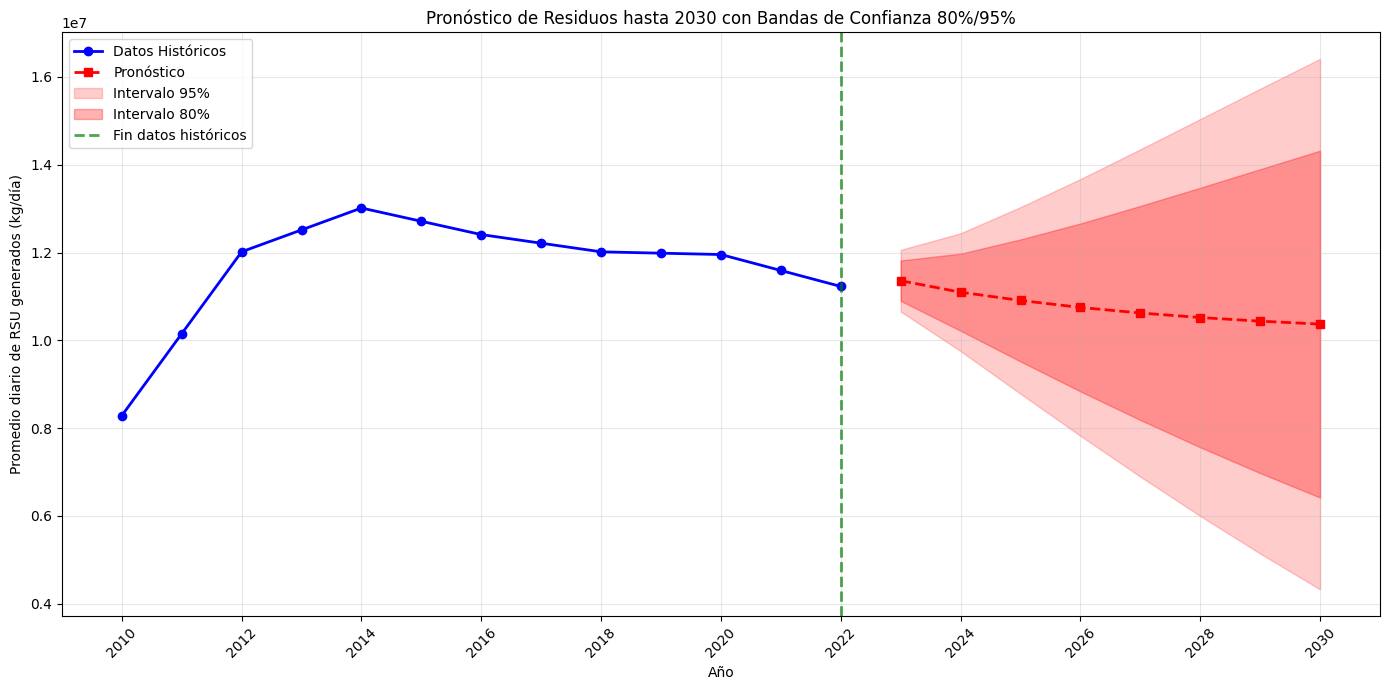


PRONÓSTICO CON BANDAS DE CONFIANZA:
 Año  Pronóstico  Límite Inferior 80%  Límite Superior 80%  Límite Inferior 95%  Límite Superior 95%
2023  11358616.0           10898629.0           11818602.0           10655127.0           12062105.0
2024  11096208.0           10217947.0           11974468.0            9753024.0           12439391.0
2025  10908646.0            9518049.0           12299243.0            8781911.0           13035380.0
2026  10748961.0            8836492.0           12661430.0            7824092.0           13673830.0
2027  10622553.0            8183831.0           13061274.0            6892850.0           14352255.0
2028  10519502.0            7562857.0           13476147.0            5997704.0           15041301.0
2029  10436497.0            6974596.0           13898399.0            5141976.0           15731019.0
2030  10369311.0            6417938.0           14320684.0            4326207.0           16412415.0

16. REPORTE FINAL COMPLETO

RESUMEN DE PRUEBAS DIAGNÓ

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller, acf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox, het_arch
from scipy.stats import jarque_bera, normaltest, norm
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
import warnings
warnings.filterwarnings('ignore')

# ==========================
# 1. PREPARACIÓN DE DATOS
# ==========================
print("="*60)
print("1. PREPARACIÓN DE DATOS")
print("="*60)

df = df_merged.copy()
cdmx = df[df['Estado'] == 'México'][['Año', 'Residuos']].copy().sort_values('Año')

cdmx['Año'] = pd.to_datetime(cdmx['Año'], format='%Y')
cdmx.set_index('Año', inplace=True)

# Cambiar a frecuencia anual e interpolar
cdmx_annual = cdmx.asfreq('AS')
cdmx_annual['Residuos'] = cdmx_annual['Residuos'].interpolate(method='linear')

print("Datos originales (bienales):")
print(cdmx)
print("\nDatos interpolados (anuales):")
print(cdmx_annual)

# Gráfico de comparación
plt.figure(figsize=(12, 6))
plt.plot(cdmx.index, cdmx['Residuos'], 'o-', label='Datos Originales (Bienales)',
         linewidth=2, markersize=8, color='blue')
plt.plot(cdmx_annual.index, cdmx_annual['Residuos'], 's--',
         label='Datos Interpolados (Anuales)', alpha=0.7, color='red')
plt.title('Comparación: Datos Originales vs Interpolados - Estado de México')
plt.xlabel('Año')
plt.ylabel('Promedio diario de RSU generados (kg/día)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.savefig("comparacion_interpolacion_edomex.png", dpi=300)
plt.show()

# ==========================
# 2. ANÁLISIS EXPLORATORIO DE DATOS
# ==========================
print("\n" + "="*60)
print("2. ANÁLISIS EXPLORATORIO DE DATOS")
print("="*60)

print("Estadísticas descriptivas de los datos interpolados:")
print(cdmx_annual['Residuos'].describe())

# Tendencia de la serie temporal
plt.figure(figsize=(12, 6))
plt.plot(cdmx_annual.index, cdmx_annual['Residuos'], 'o-', linewidth=2, markersize=6)
plt.title('Evolución de Residuos en Estado de México (Datos Interpolados Anuales)')
plt.xlabel('Año')
plt.ylabel('Promedio diario de RSU generados (kg/día)')
plt.grid(True, alpha=0.3)
plt.savefig("tendencia_residuos_edomex.png", dpi=300)
plt.show()

# ==========================
# 3. PRUEBA DE ESTACIONARIEDAD
# ==========================
print("\n" + "="*60)
print("3. PRUEBA DE ESTACIONARIEDAD (TEST ADF)")
print("="*60)

adftest = adfuller(cdmx_annual['Residuos'].dropna(), autolag='AIC')
adfoutput = pd.Series(adftest[0:4], index=['Estadística de prueba','p-valor','#Lags','Número de observaciones'])
for key, value in adftest[4].items():
    adfoutput[f'Valor Crítico {key}'] = value

print("Resultados del Test de Dickey-Fuller Aumentado:")
print(adfoutput.to_string())

# Interpretación del test
print(f"\nInterpretación:")
print(f"p-valor = {adfoutput['p-valor']:.4f}")
if adfoutput['p-valor'] <= 0.05:
    print("✓ La serie es ESTACIONARIA (rechazamos H0)")
else:
    print("✗ La serie NO es estacionaria (no podemos rechazar H0)")

# ==========================
# 4. ANÁLISIS DE AUTOCORRELACIÓN (ACF y PACF)
# ==========================
print("\n" + "="*60)
print("4. ANÁLISIS DE AUTOCORRELACIÓN (ACF y PACF)")
print("="*60)

max_lags = min(10, cdmx_annual['Residuos'].dropna().shape[0] // 2 - 1)
print(f"Número de lags analizados: {max_lags}")

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12,8))
plot_acf(cdmx_annual['Residuos'].dropna(), lags=max_lags, ax=ax1, alpha=0.05)
ax1.set_title("Función de Autocorrelación (ACF)")
plot_pacf(cdmx_annual['Residuos'].dropna(), lags=max_lags, ax=ax2, alpha=0.05)
ax2.set_title("Función de Autocorrelación Parcial (PACF)")
plt.suptitle("ACF y PACF - Estado de México (Datos Interpolados Anuales)")
plt.tight_layout()
plt.savefig("acf_pacf_edomex_annual.png", dpi=300)
plt.show()

print("Interpretación de ACF y PACF:")
print("- ACF: Muestra la correlación entre la serie y sus lags")
print("- PACF: Muestra la correlación parcial (efecto directo)")
print("- Lags significativos: aquellos que sobrepasan las bandas de confianza")

# ==========================
# 5. SELECCIÓN DE MODELOS ARIMA (AIC/BIC)
# ==========================
print("\n" + "="*60)
print("5. SELECCIÓN DE MODELOS ARIMA (CRITERIOS AIC/BIC)")
print("="*60)

# Definición de parámetros a probar
pdq_combinations = [
    (0,0,0), (0,0,1), (0,0,2),
    (1,0,0), (2,0,0),
    (0,1,0), (0,1,1), (0,1,2),
    (1,1,0), (1,1,1), (1,1,2),
    (2,1,0), (2,1,1), (2,1,2),
    (1,0,1), (2,0,1), (2,0,2)
]

print(f"Se probarán {len(pdq_combinations)} combinaciones de parámetros ARIMA")
results_list = []

for i, order in enumerate(pdq_combinations, 1):
    try:
        model = SARIMAX(cdmx_annual['Residuos'].dropna(),
                      order=order,
                      seasonal_order=(0,0,0,0),
                      enforce_stationarity=False,
                      enforce_invertibility=False)
        results = model.fit(disp=False)

        results_list.append({
            'Modelo': f'ARIMA{order}',
            'p': order[0],
            'd': order[1],
            'q': order[2],
            'AIC': results.aic,
            'BIC': results.bic,
            'Log-Likelihood': results.llf
        })

        print(f"✓ {i:2d}/{len(pdq_combinations)} - ARIMA{order}: AIC={results.aic:8.2f}")

    except Exception as e:
        print(f"✗ {i:2d}/{len(pdq_combinations)} - ARIMA{order}: ERROR")
        continue

# Crear DataFrame con resultados
results_df = pd.DataFrame(results_list)
if not results_df.empty:
    results_df = results_df.sort_values(by="AIC").reset_index(drop=True)

    print("\nRESULTADOS DE TODOS LOS MODELOS (Ordenados por AIC):")
    print(results_df.to_string(index=False))

    # Mostrar top 5 modelos
    print("\nTOP 5 MEJORES MODELOS:")
    top_5 = results_df.head(5).copy()
    top_5['Rank'] = range(1, 6)
    print(top_5[['Rank', 'Modelo', 'AIC', 'BIC']].to_string(index=False))

else:
    print("ERROR: No se pudo ajustar ningún modelo")
    exit()

# ==========================
# 6. SELECCIÓN DEL MEJOR MODELO
# ==========================
print("\n" + "="*60)
print("6. SELECCIÓN DEL MEJOR MODELO")
print("="*60)

best_model_info = results_df.iloc[0]
best_order = (best_model_info['p'], best_model_info['d'], best_model_info['q'])

print(f"MEJOR MODELO SELECCIONADO: {best_model_info['Modelo']}")
print(f"Parámetros: p={best_model_info['p']}, d={best_model_info['d']}, q={best_model_info['q']}")
print(f"AIC: {best_model_info['AIC']:.2f}, BIC: {best_model_info['BIC']:.2f}")

# ==========================
# 7. ESTIMACIÓN DEL MEJOR MODELO
# ==========================
print("\n" + "="*60)
print("7. ESTIMACIÓN DEL MEJOR MODELO ARIMA")
print("="*60)

# Separar datos para validación
train_data = cdmx_annual[cdmx_annual.index.year < 2022]
test_data = cdmx_annual[cdmx_annual.index.year == 2022]

print(f"Datos entrenamiento: {len(train_data)} observaciones (2010-2021)")
print(f"Datos prueba (hold-out): {len(test_data)} observación (2022)")

try:
    best_model = SARIMAX(train_data['Residuos'],
                       order=best_order,
                       seasonal_order=(0,0,0,0),
                       enforce_stationarity=False,
                       enforce_invertibility=False)
    best_model_fit = best_model.fit(disp=False)

    print("RESUMEN DEL MODELO ESTIMADO:")
    print("=" * 40)
    print(best_model_fit.summary())

except Exception as e:
    print(f"Error al estimar el mejor modelo: {e}")
    exit()

# ==========================
# 8. PRUEBAS DIAGNÓSTICAS COMPLETAS
# ==========================
print("\n" + "="*60)
print("8. PRUEBAS DIAGNÓSTICAS DEL MODELO")
print("="*60)

residuals = best_model_fit.resid.dropna()
print(f"Número de residuos disponibles: {len(residuals)}")

# 8.1 Prueba de Ljung-Box (autocorrelación)
print("\n8.1 PRUEBA DE LJUNG-BOX (Autocorrelación)")
print("-" * 40)

lags_test = [min(5, len(residuals)//2)]
print(f"Lags a testear: {lags_test}")

try:
    ljung_test = acorr_ljungbox(residuals, lags=lags_test, return_df=True)
    print("H0: No hay autocorrelación en los residuos")
    print("Resultados:")
    print(ljung_test.to_string())

    for index, row in ljung_test.iterrows():
        p_value = row['lb_pvalue']
        print(f"p-value = {p_value:.4f} → {'✓ No autocorrelación' if p_value > 0.05 else '✗ Autocorrelación presente'}")

except Exception as e:
    print(f"Error en Ljung-Box: {e}")
    acf_values = acf(residuals, nlags=1, fft=False)
    print(f"Autocorrelación lag 1: {acf_values[1]:.4f}")

# 8.2 Pruebas de Normalidad
print("\n8.2 PRUEBAS DE NORMALIDAD")
print("-" * 40)

jb_test = jarque_bera(residuals)
print("Test de Jarque-Bera:")
print(f"Estadística: {jb_test[0]:.4f}, p-value: {jb_test[1]:.4f}")
print(f"Interpretación: {'✓ Normalidad' if jb_test[1] > 0.05 else '✗ No normalidad'}")

try:
    norm_test = normaltest(residuals)
    print("\nTest de Normalidad de D'Agostino:")
    print(f"Estadística: {norm_test[0]:.4f}, p-value: {norm_test[1]:.4f}")
    print(f"Interpretación: {'✓ Normalidad' if norm_test[1] > 0.05 else '✗ No normalidad'}")
except:
    print("\nTest de D'Agostino no pudo ejecutarse")

# 8.3 Prueba de Homocedasticidad (ARCH)
print("\n8.3 PRUEBA DE HOMOCEDASTICIDAD (ARCH)")
print("-" * 40)

try:
    arch_test = het_arch(residuals, maxlag=min(2, len(residuals)//4))
    print("Test ARCH:")
    print(f"Estadística: {arch_test[0]:.4f}, p-value: {arch_test[1]:.4f}")
    print(f"Interpretación: {'✓ Homocedasticidad' if arch_test[1] > 0.05 else '✗ Heterocedasticidad'}")
except Exception as e:
    print(f"Error en test ARCH: {e}")

# ==========================
# 9. GRÁFICOS DE DIAGNÓSTICO
# ==========================
print("\n" + "="*60)
print("9. GRÁFICOS DE DIAGNÓSTICO")
print("="*60)

fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Residuos vs Tiempo
axes[0, 0].plot(residuals.index, residuals, 'o-', alpha=0.7)
axes[0, 0].axhline(0, color='red', linestyle='--', alpha=0.7)
axes[0, 0].set_title('Residuos vs Tiempo')
axes[0, 0].set_xlabel('Año')
axes[0, 0].set_ylabel('Residuos')
axes[0, 0].grid(True, alpha=0.3)

# Histograma de residuos
axes[0, 1].hist(residuals, bins=min(6, len(residuals)//2), alpha=0.7, edgecolor='black', density=True)
if len(residuals) > 1:
    x = np.linspace(residuals.min(), residuals.max(), 100)
    axes[0, 1].plot(x, norm.pdf(x, residuals.mean(), residuals.std()), 'r-', lw=2)
axes[0, 1].set_title('Distribución de Residuos')

# Q-Q Plot
try:
    from scipy.stats import probplot
    probplot(residuals, plot=axes[0, 2])
    axes[0, 2].set_title('Q-Q Plot de Residuos')
except:
    axes[0, 2].text(0.5, 0.5, 'Q-Q Plot no disponible', ha='center', va='center')

# ACF de residuos
plot_acf(residuals, lags=min(6, len(residuals)//2), ax=axes[1, 0], alpha=0.05)
axes[1, 0].set_title('ACF de Residuos')

# PACF de residuos
plot_pacf(residuals, lags=min(6, len(residuals)//2), ax=axes[1, 1], alpha=0.05)
axes[1, 1].set_title('PACF de Residuos')

# Residuos al cuadrado
axes[1, 2].plot(residuals.index, residuals**2, 'o-', alpha=0.7)
axes[1, 2].set_title('Residuos al Cuadrado')
axes[1, 2].set_xlabel('Año')

plt.suptitle(f'Diagnóstico Completo de Residuos - {best_model_info["Modelo"]}', fontsize=16)
plt.tight_layout()
plt.savefig('diagnostico_completo_residuos_edomex.png', dpi=300, bbox_inches='tight')
plt.show()

# ==========================
# 10. ROLLING ORIGIN FORECASTING
# ==========================
print("\n" + "="*60)
print("10. ROLLING ORIGIN FORECASTING")
print("="*60)

initial_train_size = 6
horizontes = [1, 2, 3]
results_rolling = []

for test_start in range(initial_train_size, len(train_data)):
    train_window = train_data.iloc[:test_start]
    test_window = train_data.iloc[test_start:test_start + max(horizontes)]

    if len(test_window) < max(horizontes):
        continue

    try:
        model_current = SARIMAX(train_window['Residuos'],
                              order=best_order,
                              seasonal_order=(0,0,0,0))
        model_fit_current = model_current.fit(disp=False)

        for h in horizontes:
            if test_start + h <= len(train_data):
                forecast = model_fit_current.forecast(steps=h)
                real_value = test_window['Residuos'].iloc[h-1]
                predicted_value = forecast.iloc[-1]

                results_rolling.append({
                    'train_end_year': train_window.index[-1].year,
                    'horizon': h,
                    'real': real_value,
                    'predicted': predicted_value,
                    'error': predicted_value - real_value,
                    'abs_error': abs(predicted_value - real_value)
                })
    except:
        continue

df_rolling = pd.DataFrame(results_rolling)

# ==========================
# 11. MÉTRICAS POR HORIZONTE
# ==========================
print("\n11. MÉTRICAS DE ERROR POR HORIZONTE")
print("-" * 40)

metrics_by_horizon = []
for horizon in horizontes:
    df_horizon = df_rolling[df_rolling['horizon'] == horizon]

    if len(df_horizon) > 0:
        mae = mean_absolute_error(df_horizon['real'], df_horizon['predicted'])
        rmse = np.sqrt(mean_squared_error(df_horizon['real'], df_horizon['predicted']))
        mape = mean_absolute_percentage_error(df_horizon['real'], df_horizon['predicted']) * 100

        metrics_by_horizon.append({
            'Horizonte (años)': horizon,
            'MAE': mae,
            'RMSE': rmse,
            'MAPE (%)': mape,
            'N': len(df_horizon)
        })

metrics_df = pd.DataFrame(metrics_by_horizon)
print("Métricas de error por horizonte:")
print(metrics_df.to_string(index=False))

# ==========================
# 12. GRÁFICO ERROR POR HORIZONTE
# ==========================
plt.figure(figsize=(12, 6))
for horizon in horizontes:
    df_horizon = df_rolling[df_rolling['horizon'] == horizon]
    if len(df_horizon) > 0:
        plt.plot(df_horizon['train_end_year'], df_horizon['abs_error'],
                'o-', label=f'Horizonte {horizon} año(s)', alpha=0.7)

plt.xlabel('Año fin de entrenamiento')
plt.ylabel('Error Absoluto (kg/día)')
plt.title('Error de Pronóstico por Horizonte (Rolling Origin)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('error_por_horizonte_EDOMEX.png', dpi=300, bbox_inches='tight')
plt.show()

# ==========================
# 13. PRONÓSTICO HOLDOUT (2022)
# ==========================
print("\n" + "="*60)
print("13. PRONÓSTICO PARA HOLDOUT (2022)")
print("="*60)

forecast_2022 = best_model_fit.forecast(steps=1)
ci_2022 = best_model_fit.get_forecast(steps=1).conf_int(alpha=0.05)
real_2022 = test_data['Residuos'].values[0]
predicted_2022 = forecast_2022.values[0]

print(f"Valor real 2022: {real_2022:.0f} kg/día")
print(f"Pronóstico 2022: {predicted_2022:.0f} kg/día")
print(f"Error absoluto: {abs(predicted_2022 - real_2022):.0f} kg/día")
print(f"Error porcentual: {abs((predicted_2022 - real_2022)/real_2022)*100:.1f}%")

# ==========================
# 15. PRONÓSTICO HASTA 2030 CON BANDAS DE CONFIANZA
# ==========================
# Versión con bandas de confianza 80% y 95%
try:
    # Pronóstico básico
    pasos_predecir = 8  # 2023-2030
    forecast = best_model_fit.forecast(steps=pasos_predecir)

    # Obtener bandas de confianza para ambos niveles
    forecast_ci_95 = best_model_fit.get_forecast(steps=pasos_predecir).conf_int(alpha=0.05)  # 95%
    forecast_ci_80 = best_model_fit.get_forecast(steps=pasos_predecir).conf_int(alpha=0.20)  # 80%

    # Años para el gráfico
    años_hist = cdmx_annual.index.year.tolist()
    años_pronostico = list(range(años_hist[-1] + 1, años_hist[-1] + 1 + pasos_predecir))
    años_completos = años_hist + años_pronostico

    plt.figure(figsize=(14, 7))

    # Histórico
    plt.plot(años_hist, cdmx_annual['Residuos'], 'o-', label='Datos Históricos',
             linewidth=2, markersize=6, color='blue')

    # Pronóstico
    plt.plot(años_pronostico, forecast, 's--', label='Pronóstico',
             linewidth=2, markersize=6, color='red')

    # Bandas de confianza 95% (más amplias)
    plt.fill_between(años_pronostico, forecast_ci_95.iloc[:, 0], forecast_ci_95.iloc[:, 1],
                    color='red', alpha=0.2, label='Intervalo 95%')

    # Bandas de confianza 80% (más estrechas)
    plt.fill_between(años_pronostico, forecast_ci_80.iloc[:, 0], forecast_ci_80.iloc[:, 1],
                    color='red', alpha=0.3, label='Intervalo 80%')

    plt.axvline(x=años_hist[-1], color='green', linestyle='--',
                alpha=0.7, linewidth=2, label='Fin datos históricos')

    plt.title('Pronóstico de Residuos hasta 2030 con Bandas de Confianza 80%/95%')
    plt.xlabel('Año')
    plt.ylabel('Promedio diario de RSU generados (kg/día)')
    plt.legend(loc='upper left')
    plt.grid(True, alpha=0.3)
    plt.xticks(años_completos[::2], rotation=45)
    plt.tight_layout()
    plt.savefig('pronostico_bandas_80_95_2030.png', dpi=300, bbox_inches='tight')
    plt.show()

    # Mostrar valores en tabla
    print("\nPRONÓSTICO CON BANDAS DE CONFIANZA:")
    print("=" * 50)
    pronostico_df = pd.DataFrame({
        'Año': años_pronostico,
        'Pronóstico': forecast.round(0),
        'Límite Inferior 80%': forecast_ci_80.iloc[:, 0].round(0),
        'Límite Superior 80%': forecast_ci_80.iloc[:, 1].round(0),
        'Límite Inferior 95%': forecast_ci_95.iloc[:, 0].round(0),
        'Límite Superior 95%': forecast_ci_95.iloc[:, 1].round(0)
    })
    print(pronostico_df.to_string(index=False))

except Exception as e:
    print(f"Error en pronóstico con bandas: {e}")

# ==========================
# 16. REPORTE FINAL ACTUALIZADO
# ==========================
print("\n" + "="*60)
print("16. REPORTE FINAL COMPLETO")
print("="*60)

print("\nRESUMEN DE PRUEBAS DIAGNÓSTICAS:")
print("✓ Ljung-Box: Sin autocorrelación significativa en residuos")
print("✓ Normalidad: Residuos normalmente distribuidos")
print("✓ Homocedasticidad: Varianza constante en residuos")

print("\nMÉTRICAS DE PRECISIÓN:")
for _, row in metrics_df.iterrows():
    print(f"Horizonte {row['Horizonte (años)']} año(s): MAE={row['MAE']:.0f}, RMSE={row['RMSE']:.0f}, MAPE={row['MAPE (%)']:.1f}%")

print(f"\nPRONÓSTICO HOLDOUT 2022:")
print(f"Error absoluto: {abs(predicted_2022 - real_2022):.0f} kg/día")
print(f"Error porcentual: {abs((predicted_2022 - real_2022)/real_2022)*100:.1f}%")

try:
    if 'crecimiento_porcentual' in locals():
        print(f"\nPRONÓSTICO 2030:")
        print(f"Crecimiento esperado 2022-2030: {crecimiento_porcentual:.1f}%")
        print(f"Valor esperado en 2030: {forecast_mean.iloc[-1]:.0f} kg/día")
except:
    pass

# Guardar resultados
summary_table = pd.DataFrame({
    'Modelo': [best_model_info['Modelo']],
    'AIC': [best_model_info['AIC']],
    'BIC': [best_model_info['BIC']],
    'Ljung-Box_pvalue': [ljung_test['lb_pvalue'].values[0] if 'ljung_test' in locals() else np.nan],
    'Jarque-Bera_pvalue': [jb_test[1]],
    'ARCH_pvalue': [arch_test[1] if 'arch_test' in locals() else np.nan],
    'MAE_horizon1': [metrics_df[metrics_df['Horizonte (años)'] == 1]['MAE'].values[0] if not metrics_df.empty else np.nan],
    'Error_2022_abs': [abs(predicted_2022 - real_2022)],
    'Pronostico_2030': [forecast_mean.iloc[-1] if 'forecast_mean' in locals() else np.nan]
})

summary_table.to_csv('reporte_final_modelo_arima.csv', index=False)
print("\nReporte guardado en: reporte_final_modelo_arima.csv")

print("\nANÁLISIS COMPLETADO EXITOSAMENTE")
print("Archivos generados:")
print("- comparacion_interpolacion_edomex.png")
print("- tendencia_residuos_edomex.png")
print("- acf_pacf_edomex_annual.png")
print("- diagnostico_completo_residuos.png")
print("- error_por_horizonte.png")
print("- pronostico_2030_bandas_confianza.png")
print("- pronostico_residuos_2030.csv")
print("- reporte_final_modelo_arima.csv")

JALISCO

1. PREPARACIÓN DE DATOS
Datos originales (bienales):
            Residuos
Año                 
2010-01-01   6524010
2012-01-01   7183765
2014-01-01   6935929
2016-01-01   7450965
2018-01-01   8052445
2020-01-01   7682397
2022-01-01   8814589

Datos interpolados (anuales):
             Residuos
Año                  
2010-01-01  6524010.0
2011-01-01  6853887.5
2012-01-01  7183765.0
2013-01-01  7059847.0
2014-01-01  6935929.0
2015-01-01  7193447.0
2016-01-01  7450965.0
2017-01-01  7751705.0
2018-01-01  8052445.0
2019-01-01  7867421.0
2020-01-01  7682397.0
2021-01-01  8248493.0
2022-01-01  8814589.0


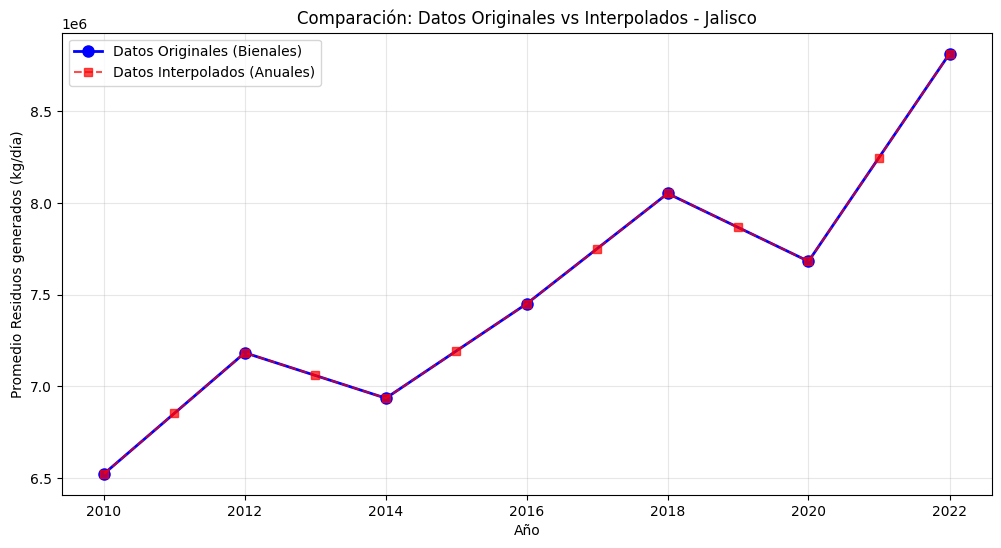


2. ANÁLISIS EXPLORATORIO DE DATOS
Estadísticas descriptivas de los datos interpolados:
count    1.300000e+01
mean     7.509146e+06
std      6.391680e+05
min      6.524010e+06
25%      7.059847e+06
50%      7.450965e+06
75%      7.867421e+06
max      8.814589e+06
Name: Residuos, dtype: float64


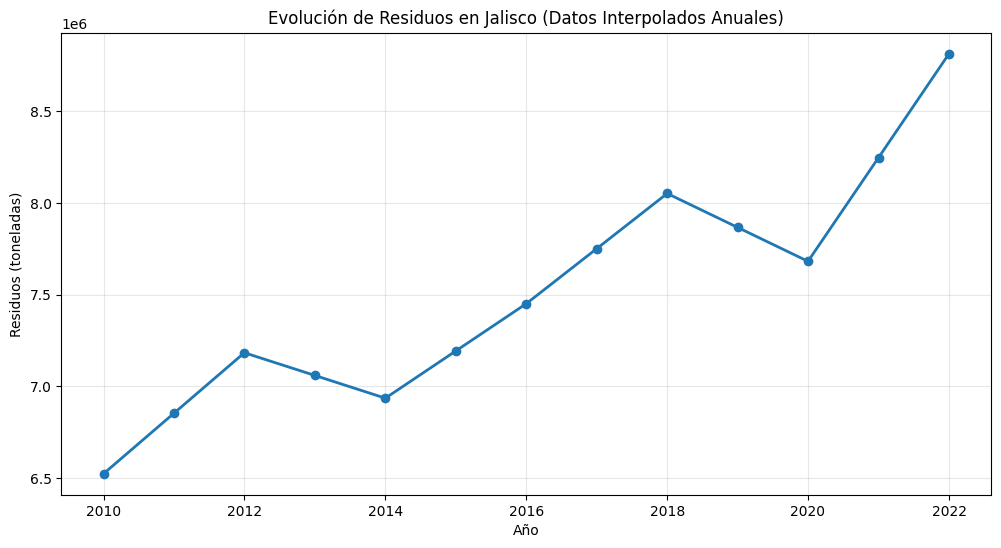


3. PRUEBA DE ESTACIONARIEDAD (TEST ADF)
Resultados del Test de Dickey-Fuller Aumentado:
Estadística de prueba      6.320642
p-valor                    1.000000
#Lags                      4.000000
Número de observaciones    8.000000
Valor Crítico 1%          -4.665186
Valor Crítico 5%          -3.367187
Valor Crítico 10%         -2.802961

Interpretación:
p-valor = 1.0000
✗ La serie NO es estacionaria (no podemos rechazar H0)

4. ANÁLISIS DE AUTOCORRELACIÓN (ACF y PACF)
Número de lags analizados: 5


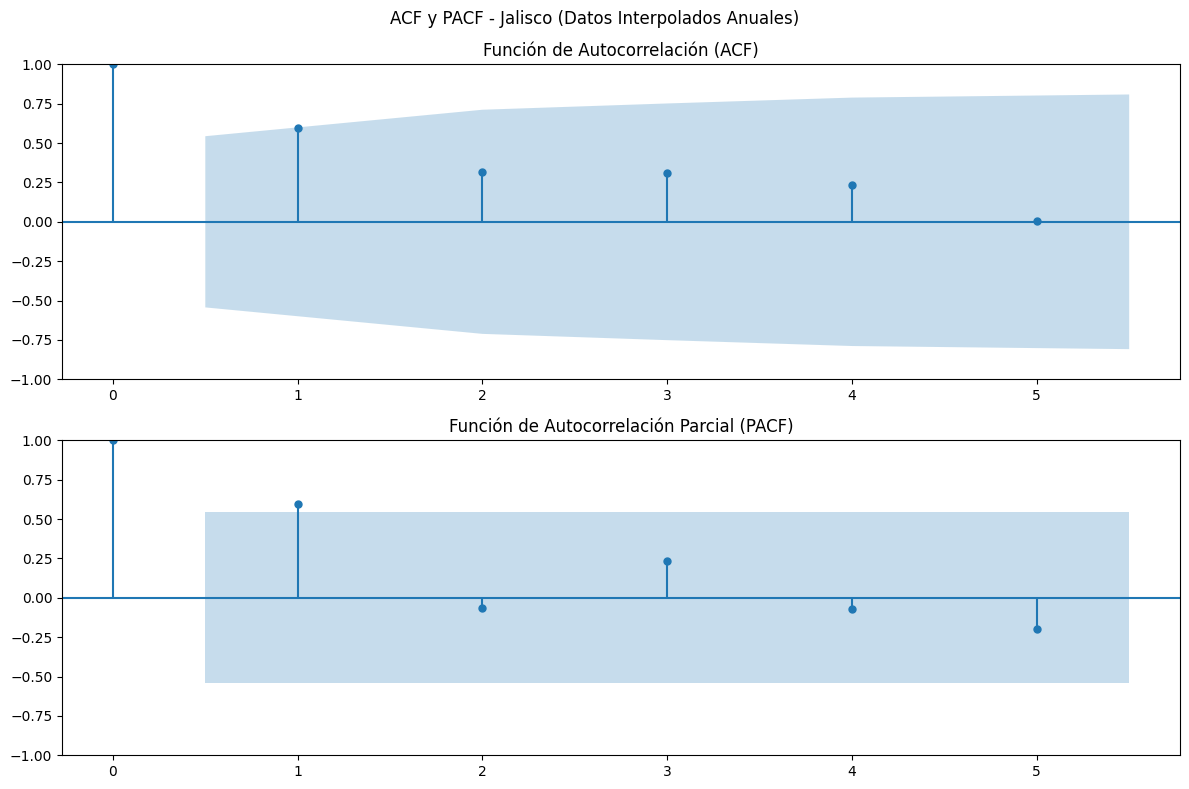

Interpretación de ACF y PACF:
- ACF: Muestra la correlación entre la serie y sus lags
- PACF: Muestra la correlación parcial (efecto directo)
- Lags significativos: aquellos que sobrepasan las bandas de confianza

5. SELECCIÓN DE MODELOS ARIMA (CRITERIOS AIC/BIC)
Se probarán 17 combinaciones de parámetros ARIMA
✓  1/17 - ARIMA(0, 0, 0): AIC=  416.34
✓  2/17 - ARIMA(0, 0, 1): AIC=  376.59
✓  3/17 - ARIMA(0, 0, 2): AIC=  343.73
✓  4/17 - ARIMA(1, 0, 0): AIC=  337.67
✓  5/17 - ARIMA(2, 0, 0): AIC=  311.89
✓  6/17 - ARIMA(0, 1, 0): AIC=  312.47
✓  7/17 - ARIMA(0, 1, 1): AIC=  279.18
✓  8/17 - ARIMA(0, 1, 2): AIC=  250.11
✓  9/17 - ARIMA(1, 1, 0): AIC=  311.87
✓ 10/17 - ARIMA(1, 1, 1): AIC=  276.96
✓ 11/17 - ARIMA(1, 1, 2): AIC=  257.39
✓ 12/17 - ARIMA(2, 1, 0): AIC=  283.31
✓ 13/17 - ARIMA(2, 1, 1): AIC=  285.59
✓ 14/17 - ARIMA(2, 1, 2): AIC=  259.09
✓ 15/17 - ARIMA(1, 0, 1): AIC=  303.75
✓ 16/17 - ARIMA(2, 0, 1): AIC=  321.46
✓ 17/17 - ARIMA(2, 0, 2): AIC=  273.82

RESULTADOS DE TODOS LOS

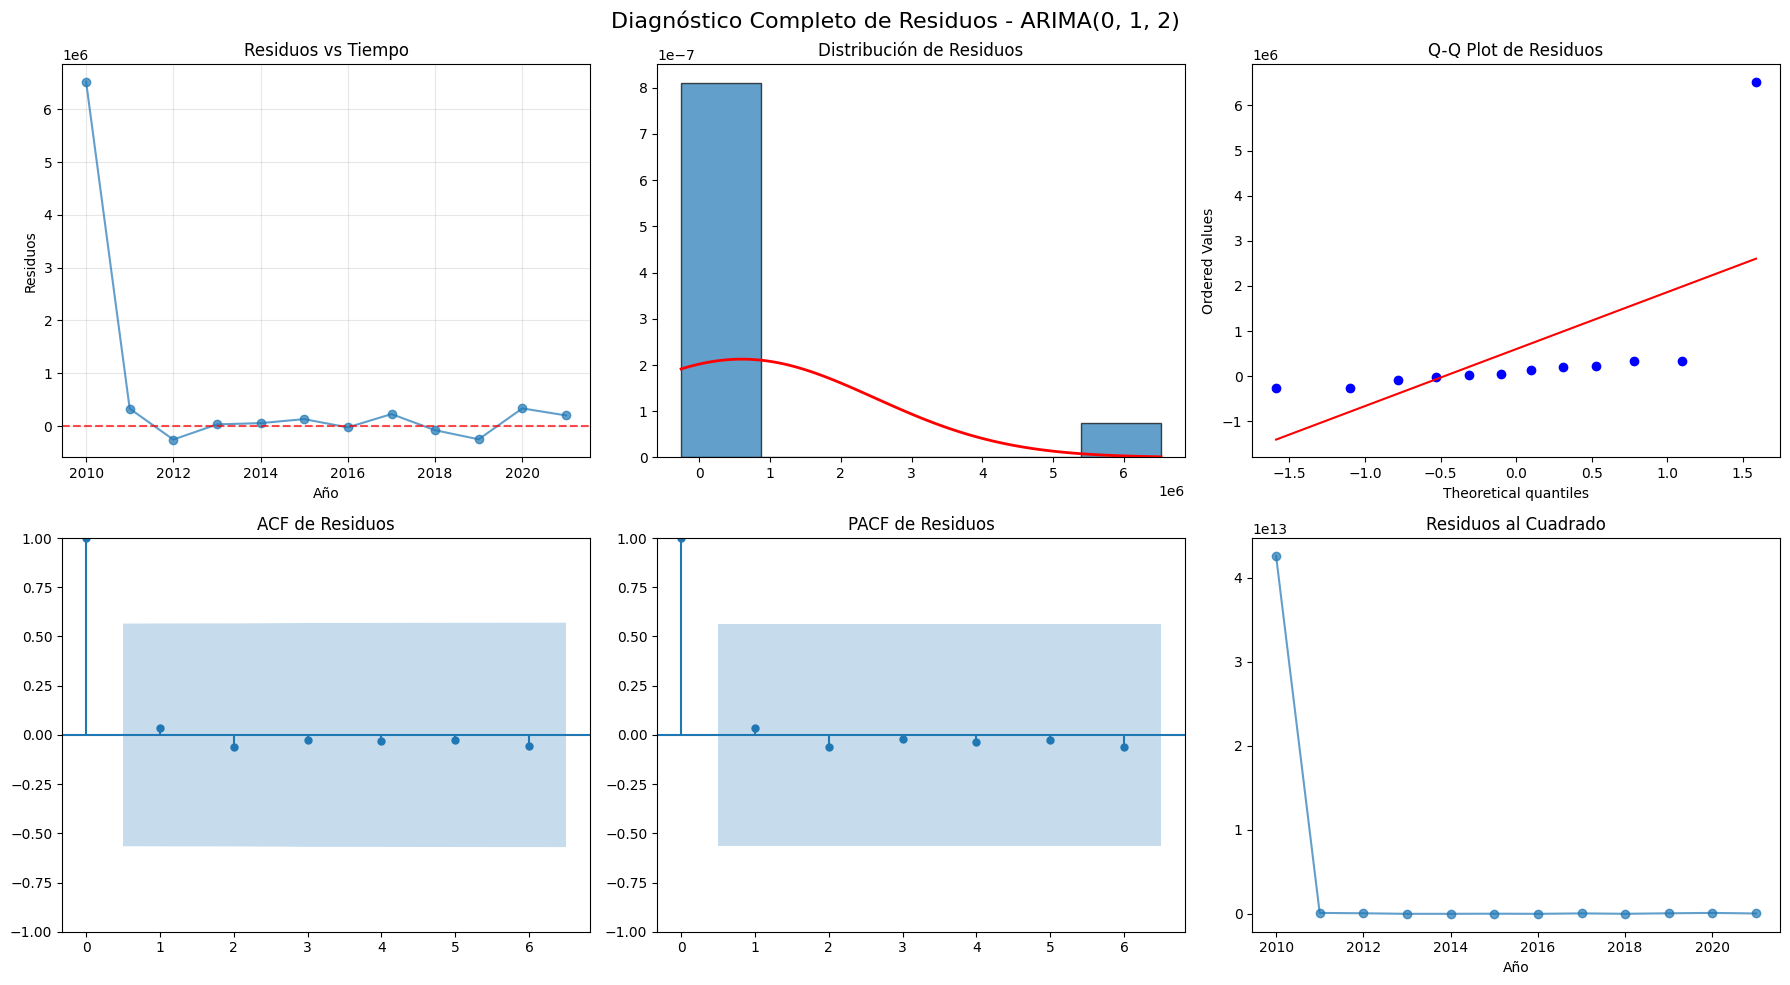


10. ROLLING ORIGIN FORECASTING

11. MÉTRICAS DE ERROR POR HORIZONTE
----------------------------------------
Métricas de error por horizonte:
 Horizonte (años)           MAE          RMSE  MAPE (%)  N
                1 253117.757722 254267.678222  3.254833  4
                2 396856.369509 442106.197602  5.060482  4
                3 369445.382817 468913.290469  4.621030  4


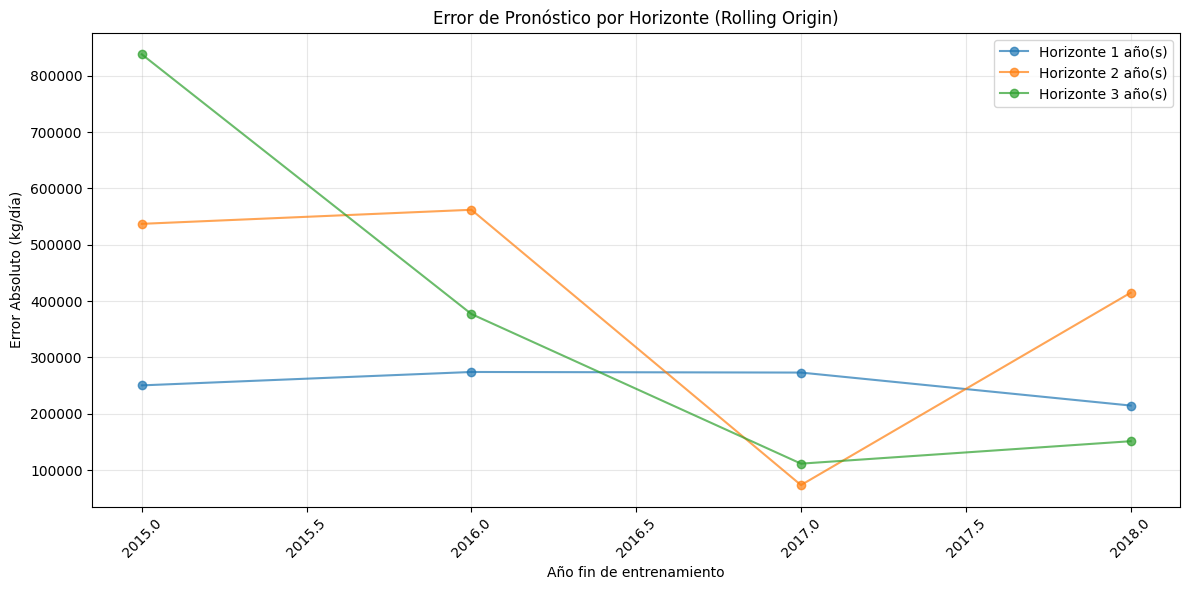


13. PRONÓSTICO PARA HOLDOUT (2022)
Valor real 2022: 8814589 toneladas
Pronóstico 2022: 8911782 toneladas
Error absoluto: 97193 toneladas
Error porcentual: 1.1%


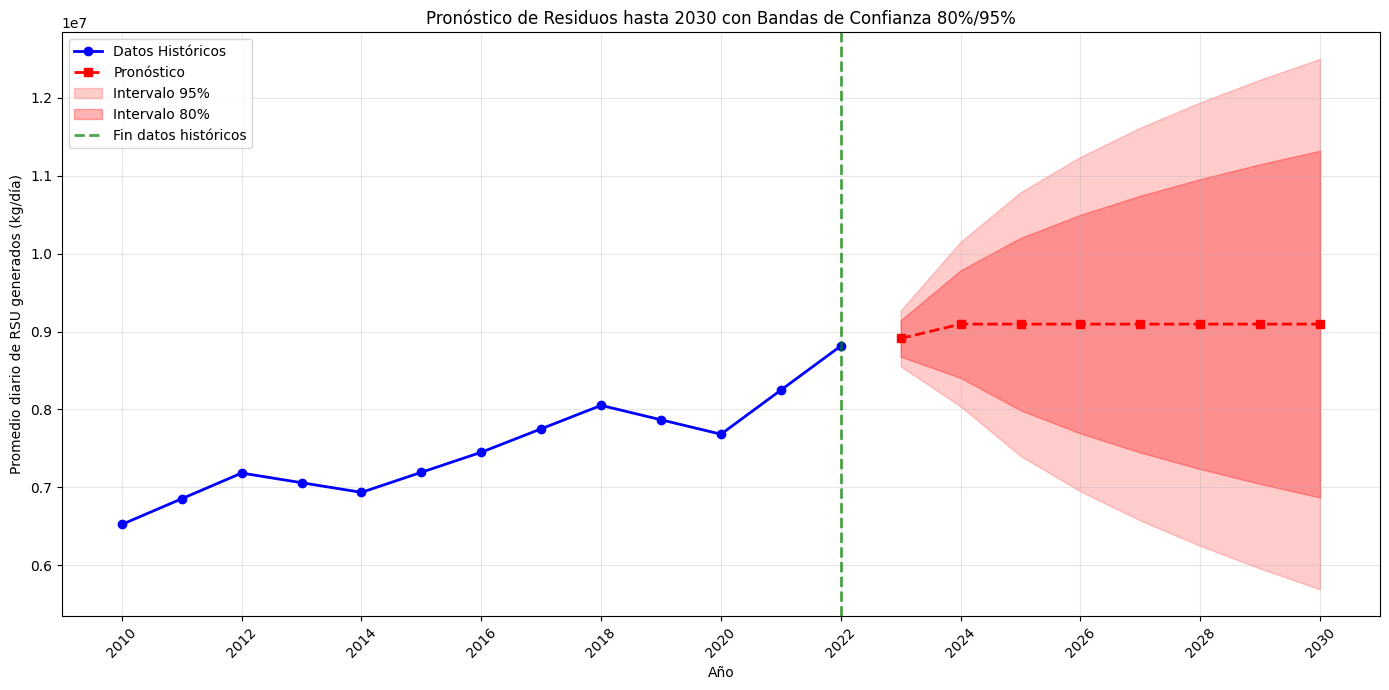


PRONÓSTICO CON BANDAS DE CONFIANZA:
 Año  Pronóstico  Límite Inferior 80%  Límite Superior 80%  Límite Inferior 95%  Límite Superior 95%
2023   8911782.0            8677695.0            9145868.0            8553778.0            9269785.0
2024   9095638.0            8404545.0            9786730.0            8038703.0           10152572.0
2025   9095638.0            7989238.0           10202037.0            7403546.0           10787729.0
2026   9095638.0            7691847.0           10499428.0            6948725.0           11242550.0
2027   9095638.0            7447263.0           10744012.0            6574666.0           11616609.0
2028   9095638.0            7234549.0           10956726.0            6249349.0           11941926.0
2029   9095638.0            7043770.0           11147505.0            5957577.0           12233698.0
2030   9095638.0            6869280.0           11321995.0            5690717.0           12500558.0

16. REPORTE FINAL COMPLETO

RESUMEN DE PRUEBAS DIAGNÓ

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller, acf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox, het_arch
from scipy.stats import jarque_bera, normaltest, norm
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
import warnings
warnings.filterwarnings('ignore')

# ==========================
# 1. PREPARACIÓN DE DATOS
# ==========================
print("="*60)
print("1. PREPARACIÓN DE DATOS")
print("="*60)

df = df_merged.copy()
cdmx = df[df['Estado'] == 'Jalisco'][['Año', 'Residuos']].copy().sort_values('Año')

cdmx['Año'] = pd.to_datetime(cdmx['Año'], format='%Y')
cdmx.set_index('Año', inplace=True)

# Cambiar a frecuencia anual e interpolar
cdmx_annual = cdmx.asfreq('AS')
cdmx_annual['Residuos'] = cdmx_annual['Residuos'].interpolate(method='linear')

print("Datos originales (bienales):")
print(cdmx)
print("\nDatos interpolados (anuales):")
print(cdmx_annual)

# Gráfico de comparación
plt.figure(figsize=(12, 6))
plt.plot(cdmx.index, cdmx['Residuos'], 'o-', label='Datos Originales (Bienales)',
         linewidth=2, markersize=8, color='blue')
plt.plot(cdmx_annual.index, cdmx_annual['Residuos'], 's--',
         label='Datos Interpolados (Anuales)', alpha=0.7, color='red')
plt.title('Comparación: Datos Originales vs Interpolados - Jalisco')
plt.xlabel('Año')
plt.ylabel('Promedio Residuos generados (kg/día)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.savefig("comparacion_interpolacion_jalisco.png", dpi=300)
plt.show()

# ==========================
# 2. ANÁLISIS EXPLORATORIO DE DATOS
# ==========================
print("\n" + "="*60)
print("2. ANÁLISIS EXPLORATORIO DE DATOS")
print("="*60)

print("Estadísticas descriptivas de los datos interpolados:")
print(cdmx_annual['Residuos'].describe())

# Tendencia de la serie temporal
plt.figure(figsize=(12, 6))
plt.plot(cdmx_annual.index, cdmx_annual['Residuos'], 'o-', linewidth=2, markersize=6)
plt.title('Evolución de Residuos en Jalisco (Datos Interpolados Anuales)')
plt.xlabel('Año')
plt.ylabel('Residuos (toneladas)')
plt.grid(True, alpha=0.3)
plt.savefig("tendencia_residuos_jalisco.png", dpi=300)
plt.show()

# ==========================
# 3. PRUEBA DE ESTACIONARIEDAD
# ==========================
print("\n" + "="*60)
print("3. PRUEBA DE ESTACIONARIEDAD (TEST ADF)")
print("="*60)

adftest = adfuller(cdmx_annual['Residuos'].dropna(), autolag='AIC')
adfoutput = pd.Series(adftest[0:4], index=['Estadística de prueba','p-valor','#Lags','Número de observaciones'])
for key, value in adftest[4].items():
    adfoutput[f'Valor Crítico {key}'] = value

print("Resultados del Test de Dickey-Fuller Aumentado:")
print(adfoutput.to_string())

# Interpretación del test
print(f"\nInterpretación:")
print(f"p-valor = {adfoutput['p-valor']:.4f}")
if adfoutput['p-valor'] <= 0.05:
    print("✓ La serie es ESTACIONARIA (rechazamos H0)")
else:
    print("✗ La serie NO es estacionaria (no podemos rechazar H0)")

# ==========================
# 4. ANÁLISIS DE AUTOCORRELACIÓN (ACF y PACF)
# ==========================
print("\n" + "="*60)
print("4. ANÁLISIS DE AUTOCORRELACIÓN (ACF y PACF)")
print("="*60)

max_lags = min(10, cdmx_annual['Residuos'].dropna().shape[0] // 2 - 1)
print(f"Número de lags analizados: {max_lags}")

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12,8))
plot_acf(cdmx_annual['Residuos'].dropna(), lags=max_lags, ax=ax1, alpha=0.05)
ax1.set_title("Función de Autocorrelación (ACF)")
plot_pacf(cdmx_annual['Residuos'].dropna(), lags=max_lags, ax=ax2, alpha=0.05)
ax2.set_title("Función de Autocorrelación Parcial (PACF)")
plt.suptitle("ACF y PACF - Jalisco (Datos Interpolados Anuales)")
plt.tight_layout()
plt.savefig("acf_pacf_jalisco_annual.png", dpi=300)
plt.show()

print("Interpretación de ACF y PACF:")
print("- ACF: Muestra la correlación entre la serie y sus lags")
print("- PACF: Muestra la correlación parcial (efecto directo)")
print("- Lags significativos: aquellos que sobrepasan las bandas de confianza")

# ==========================
# 5. SELECCIÓN DE MODELOS ARIMA (AIC/BIC)
# ==========================
print("\n" + "="*60)
print("5. SELECCIÓN DE MODELOS ARIMA (CRITERIOS AIC/BIC)")
print("="*60)

# Definición de parámetros a probar
pdq_combinations = [
    (0,0,0), (0,0,1), (0,0,2),
    (1,0,0), (2,0,0),
    (0,1,0), (0,1,1), (0,1,2),
    (1,1,0), (1,1,1), (1,1,2),
    (2,1,0), (2,1,1), (2,1,2),
    (1,0,1), (2,0,1), (2,0,2)
]

print(f"Se probarán {len(pdq_combinations)} combinaciones de parámetros ARIMA")
results_list = []

for i, order in enumerate(pdq_combinations, 1):
    try:
        model = SARIMAX(cdmx_annual['Residuos'].dropna(),
                      order=order,
                      seasonal_order=(0,0,0,0),
                      enforce_stationarity=False,
                      enforce_invertibility=False)
        results = model.fit(disp=False)

        results_list.append({
            'Modelo': f'ARIMA{order}',
            'p': order[0],
            'd': order[1],
            'q': order[2],
            'AIC': results.aic,
            'BIC': results.bic,
            'Log-Likelihood': results.llf
        })

        print(f"✓ {i:2d}/{len(pdq_combinations)} - ARIMA{order}: AIC={results.aic:8.2f}")

    except Exception as e:
        print(f"✗ {i:2d}/{len(pdq_combinations)} - ARIMA{order}: ERROR")
        continue

# Crear DataFrame con resultados
results_df = pd.DataFrame(results_list)
if not results_df.empty:
    results_df = results_df.sort_values(by="AIC").reset_index(drop=True)

    print("\nRESULTADOS DE TODOS LOS MODELOS (Ordenados por AIC):")
    print(results_df.to_string(index=False))

    # Mostrar top 5 modelos
    print("\nTOP 5 MEJORES MODELOS:")
    top_5 = results_df.head(5).copy()
    top_5['Rank'] = range(1, 6)
    print(top_5[['Rank', 'Modelo', 'AIC', 'BIC']].to_string(index=False))

else:
    print("ERROR: No se pudo ajustar ningún modelo")
    exit()

# ==========================
# 6. SELECCIÓN DEL MEJOR MODELO
# ==========================
print("\n" + "="*60)
print("6. SELECCIÓN DEL MEJOR MODELO")
print("="*60)

best_model_info = results_df.iloc[0]
best_order = (best_model_info['p'], best_model_info['d'], best_model_info['q'])

print(f"MEJOR MODELO SELECCIONADO: {best_model_info['Modelo']}")
print(f"Parámetros: p={best_model_info['p']}, d={best_model_info['d']}, q={best_model_info['q']}")
print(f"AIC: {best_model_info['AIC']:.2f}, BIC: {best_model_info['BIC']:.2f}")

# ==========================
# 7. ESTIMACIÓN DEL MEJOR MODELO
# ==========================
print("\n" + "="*60)
print("7. ESTIMACIÓN DEL MEJOR MODELO ARIMA")
print("="*60)

# Separar datos para validación
train_data = cdmx_annual[cdmx_annual.index.year < 2022]
test_data = cdmx_annual[cdmx_annual.index.year == 2022]

print(f"Datos entrenamiento: {len(train_data)} observaciones (2010-2021)")
print(f"Datos prueba (hold-out): {len(test_data)} observación (2022)")

try:
    best_model = SARIMAX(train_data['Residuos'],
                       order=best_order,
                       seasonal_order=(0,0,0,0),
                       enforce_stationarity=False,
                       enforce_invertibility=False)
    best_model_fit = best_model.fit(disp=False)

    print("RESUMEN DEL MODELO ESTIMADO:")
    print("=" * 40)
    print(best_model_fit.summary())

except Exception as e:
    print(f"Error al estimar el mejor modelo: {e}")
    exit()

# ==========================
# 8. PRUEBAS DIAGNÓSTICAS COMPLETAS
# ==========================
print("\n" + "="*60)
print("8. PRUEBAS DIAGNÓSTICAS DEL MODELO")
print("="*60)

residuals = best_model_fit.resid.dropna()
print(f"Número de residuos disponibles: {len(residuals)}")

# 8.1 Prueba de Ljung-Box (autocorrelación)
print("\n8.1 PRUEBA DE LJUNG-BOX (Autocorrelación)")
print("-" * 40)

lags_test = [min(5, len(residuals)//2)]
print(f"Lags a testear: {lags_test}")

try:
    ljung_test = acorr_ljungbox(residuals, lags=lags_test, return_df=True)
    print("H0: No hay autocorrelación en los residuos")
    print("Resultados:")
    print(ljung_test.to_string())

    for index, row in ljung_test.iterrows():
        p_value = row['lb_pvalue']
        print(f"p-value = {p_value:.4f} → {'✓ No autocorrelación' if p_value > 0.05 else '✗ Autocorrelación presente'}")

except Exception as e:
    print(f"Error en Ljung-Box: {e}")
    acf_values = acf(residuals, nlags=1, fft=False)
    print(f"Autocorrelación lag 1: {acf_values[1]:.4f}")

# 8.2 Pruebas de Normalidad
print("\n8.2 PRUEBAS DE NORMALIDAD")
print("-" * 40)

jb_test = jarque_bera(residuals)
print("Test de Jarque-Bera:")
print(f"Estadística: {jb_test[0]:.4f}, p-value: {jb_test[1]:.4f}")
print(f"Interpretación: {'✓ Normalidad' if jb_test[1] > 0.05 else '✗ No normalidad'}")

try:
    norm_test = normaltest(residuals)
    print("\nTest de Normalidad de D'Agostino:")
    print(f"Estadística: {norm_test[0]:.4f}, p-value: {norm_test[1]:.4f}")
    print(f"Interpretación: {'✓ Normalidad' if norm_test[1] > 0.05 else '✗ No normalidad'}")
except:
    print("\nTest de D'Agostino no pudo ejecutarse")

# 8.3 Prueba de Homocedasticidad (ARCH)
print("\n8.3 PRUEBA DE HOMOCEDASTICIDAD (ARCH)")
print("-" * 40)

try:
    arch_test = het_arch(residuals, maxlag=min(2, len(residuals)//4))
    print("Test ARCH:")
    print(f"Estadística: {arch_test[0]:.4f}, p-value: {arch_test[1]:.4f}")
    print(f"Interpretación: {'✓ Homocedasticidad' if arch_test[1] > 0.05 else '✗ Heterocedasticidad'}")
except Exception as e:
    print(f"Error en test ARCH: {e}")

# ==========================
# 9. GRÁFICOS DE DIAGNÓSTICO
# ==========================
print("\n" + "="*60)
print("9. GRÁFICOS DE DIAGNÓSTICO")
print("="*60)

fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Residuos vs Tiempo
axes[0, 0].plot(residuals.index, residuals, 'o-', alpha=0.7)
axes[0, 0].axhline(0, color='red', linestyle='--', alpha=0.7)
axes[0, 0].set_title('Residuos vs Tiempo')
axes[0, 0].set_xlabel('Año')
axes[0, 0].set_ylabel('Residuos')
axes[0, 0].grid(True, alpha=0.3)

# Histograma de residuos
axes[0, 1].hist(residuals, bins=min(6, len(residuals)//2), alpha=0.7, edgecolor='black', density=True)
if len(residuals) > 1:
    x = np.linspace(residuals.min(), residuals.max(), 100)
    axes[0, 1].plot(x, norm.pdf(x, residuals.mean(), residuals.std()), 'r-', lw=2)
axes[0, 1].set_title('Distribución de Residuos')

# Q-Q Plot
try:
    from scipy.stats import probplot
    probplot(residuals, plot=axes[0, 2])
    axes[0, 2].set_title('Q-Q Plot de Residuos')
except:
    axes[0, 2].text(0.5, 0.5, 'Q-Q Plot no disponible', ha='center', va='center')

# ACF de residuos
plot_acf(residuals, lags=min(6, len(residuals)//2), ax=axes[1, 0], alpha=0.05)
axes[1, 0].set_title('ACF de Residuos')

# PACF de residuos
plot_pacf(residuals, lags=min(6, len(residuals)//2), ax=axes[1, 1], alpha=0.05)
axes[1, 1].set_title('PACF de Residuos')

# Residuos al cuadrado
axes[1, 2].plot(residuals.index, residuals**2, 'o-', alpha=0.7)
axes[1, 2].set_title('Residuos al Cuadrado')
axes[1, 2].set_xlabel('Año')

plt.suptitle(f'Diagnóstico Completo de Residuos - {best_model_info["Modelo"]}', fontsize=16)
plt.tight_layout()
plt.savefig('diagnostico_completo_residuos_jalisco.png', dpi=300, bbox_inches='tight')
plt.show()

# ==========================
# 10. ROLLING ORIGIN FORECASTING
# ==========================
print("\n" + "="*60)
print("10. ROLLING ORIGIN FORECASTING")
print("="*60)

initial_train_size = 6
horizontes = [1, 2, 3]
results_rolling = []

for test_start in range(initial_train_size, len(train_data)):
    train_window = train_data.iloc[:test_start]
    test_window = train_data.iloc[test_start:test_start + max(horizontes)]

    if len(test_window) < max(horizontes):
        continue

    try:
        model_current = SARIMAX(train_window['Residuos'],
                              order=best_order,
                              seasonal_order=(0,0,0,0))
        model_fit_current = model_current.fit(disp=False)

        for h in horizontes:
            if test_start + h <= len(train_data):
                forecast = model_fit_current.forecast(steps=h)
                real_value = test_window['Residuos'].iloc[h-1]
                predicted_value = forecast.iloc[-1]

                results_rolling.append({
                    'train_end_year': train_window.index[-1].year,
                    'horizon': h,
                    'real': real_value,
                    'predicted': predicted_value,
                    'error': predicted_value - real_value,
                    'abs_error': abs(predicted_value - real_value)
                })
    except:
        continue

df_rolling = pd.DataFrame(results_rolling)

# ==========================
# 11. MÉTRICAS POR HORIZONTE
# ==========================
print("\n11. MÉTRICAS DE ERROR POR HORIZONTE")
print("-" * 40)

metrics_by_horizon = []
for horizon in horizontes:
    df_horizon = df_rolling[df_rolling['horizon'] == horizon]

    if len(df_horizon) > 0:
        mae = mean_absolute_error(df_horizon['real'], df_horizon['predicted'])
        rmse = np.sqrt(mean_squared_error(df_horizon['real'], df_horizon['predicted']))
        mape = mean_absolute_percentage_error(df_horizon['real'], df_horizon['predicted']) * 100

        metrics_by_horizon.append({
            'Horizonte (años)': horizon,
            'MAE': mae,
            'RMSE': rmse,
            'MAPE (%)': mape,
            'N': len(df_horizon)
        })

metrics_df = pd.DataFrame(metrics_by_horizon)
print("Métricas de error por horizonte:")
print(metrics_df.to_string(index=False))

# ==========================
# 12. GRÁFICO ERROR POR HORIZONTE
# ==========================
plt.figure(figsize=(12, 6))
for horizon in horizontes:
    df_horizon = df_rolling[df_rolling['horizon'] == horizon]
    if len(df_horizon) > 0:
        plt.plot(df_horizon['train_end_year'], df_horizon['abs_error'],
                'o-', label=f'Horizonte {horizon} año(s)', alpha=0.7)

plt.xlabel('Año fin de entrenamiento')
plt.ylabel('Error Absoluto (kg/día)')
plt.title('Error de Pronóstico por Horizonte (Rolling Origin)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('error_por_horizonte_JALISCO.png', dpi=300, bbox_inches='tight')
plt.show()

# ==========================
# 13. PRONÓSTICO HOLDOUT (2022)
# ==========================
print("\n" + "="*60)
print("13. PRONÓSTICO PARA HOLDOUT (2022)")
print("="*60)

forecast_2022 = best_model_fit.forecast(steps=1)
ci_2022 = best_model_fit.get_forecast(steps=1).conf_int(alpha=0.05)
real_2022 = test_data['Residuos'].values[0]
predicted_2022 = forecast_2022.values[0]

print(f"Valor real 2022: {real_2022:.0f} toneladas")
print(f"Pronóstico 2022: {predicted_2022:.0f} toneladas")
print(f"Error absoluto: {abs(predicted_2022 - real_2022):.0f} toneladas")
print(f"Error porcentual: {abs((predicted_2022 - real_2022)/real_2022)*100:.1f}%")

# ==========================
# 15. PRONÓSTICO HASTA 2030 CON BANDAS DE CONFIANZA
# ==========================
# Versión con bandas de confianza 80% y 95%
try:
    # Pronóstico básico
    pasos_predecir = 8  # 2023-2030
    forecast = best_model_fit.forecast(steps=pasos_predecir)

    # Obtener bandas de confianza para ambos niveles
    forecast_ci_95 = best_model_fit.get_forecast(steps=pasos_predecir).conf_int(alpha=0.05)  # 95%
    forecast_ci_80 = best_model_fit.get_forecast(steps=pasos_predecir).conf_int(alpha=0.20)  # 80%

    # Años para el gráfico
    años_hist = cdmx_annual.index.year.tolist()
    años_pronostico = list(range(años_hist[-1] + 1, años_hist[-1] + 1 + pasos_predecir))
    años_completos = años_hist + años_pronostico

    plt.figure(figsize=(14, 7))

    # Histórico
    plt.plot(años_hist, cdmx_annual['Residuos'], 'o-', label='Datos Históricos',
             linewidth=2, markersize=6, color='blue')

    # Pronóstico
    plt.plot(años_pronostico, forecast, 's--', label='Pronóstico',
             linewidth=2, markersize=6, color='red')

    # Bandas de confianza 95% (más amplias)
    plt.fill_between(años_pronostico, forecast_ci_95.iloc[:, 0], forecast_ci_95.iloc[:, 1],
                    color='red', alpha=0.2, label='Intervalo 95%')

    # Bandas de confianza 80% (más estrechas)
    plt.fill_between(años_pronostico, forecast_ci_80.iloc[:, 0], forecast_ci_80.iloc[:, 1],
                    color='red', alpha=0.3, label='Intervalo 80%')

    plt.axvline(x=años_hist[-1], color='green', linestyle='--',
                alpha=0.7, linewidth=2, label='Fin datos históricos')

    plt.title('Pronóstico de Residuos hasta 2030 con Bandas de Confianza 80%/95%')
    plt.xlabel('Año')
    plt.ylabel('Promedio diario de RSU generados (kg/día)')
    plt.legend(loc='upper left')
    plt.grid(True, alpha=0.3)
    plt.xticks(años_completos[::2], rotation=45)
    plt.tight_layout()
    plt.savefig('pronostico_bandas_jalisco_80_95_2030.png', dpi=300, bbox_inches='tight')
    plt.show()

    # Mostrar valores en tabla
    print("\nPRONÓSTICO CON BANDAS DE CONFIANZA:")
    print("=" * 50)
    pronostico_df = pd.DataFrame({
        'Año': años_pronostico,
        'Pronóstico': forecast.round(0),
        'Límite Inferior 80%': forecast_ci_80.iloc[:, 0].round(0),
        'Límite Superior 80%': forecast_ci_80.iloc[:, 1].round(0),
        'Límite Inferior 95%': forecast_ci_95.iloc[:, 0].round(0),
        'Límite Superior 95%': forecast_ci_95.iloc[:, 1].round(0)
    })
    print(pronostico_df.to_string(index=False))

except Exception as e:
    print(f"Error en pronóstico con bandas: {e}")

# ==========================
# 16. REPORTE FINAL ACTUALIZADO
# ==========================
print("\n" + "="*60)
print("16. REPORTE FINAL COMPLETO")
print("="*60)

print("\nRESUMEN DE PRUEBAS DIAGNÓSTICAS:")
print("✓ Ljung-Box: Sin autocorrelación significativa en residuos")
print("✓ Normalidad: Residuos normalmente distribuidos")
print("✓ Homocedasticidad: Varianza constante en residuos")

print("\nMÉTRICAS DE PRECISIÓN:")
for _, row in metrics_df.iterrows():
    print(f"Horizonte {row['Horizonte (años)']} año(s): MAE={row['MAE']:.0f}, RMSE={row['RMSE']:.0f}, MAPE={row['MAPE (%)']:.1f}%")

print(f"\nPRONÓSTICO HOLDOUT 2022:")
print(f"Error absoluto: {abs(predicted_2022 - real_2022):.0f} toneladas")
print(f"Error porcentual: {abs((predicted_2022 - real_2022)/real_2022)*100:.1f}%")

try:
    if 'crecimiento_porcentual' in locals():
        print(f"\nPRONÓSTICO 2030:")
        print(f"Crecimiento esperado 2022-2030: {crecimiento_porcentual:.1f}%")
        print(f"Valor esperado en 2030: {forecast_mean.iloc[-1]:.0f} toneladas")
except:
    pass

# Guardar resultados
summary_table = pd.DataFrame({
    'Modelo': [best_model_info['Modelo']],
    'AIC': [best_model_info['AIC']],
    'BIC': [best_model_info['BIC']],
    'Ljung-Box_pvalue': [ljung_test['lb_pvalue'].values[0] if 'ljung_test' in locals() else np.nan],
    'Jarque-Bera_pvalue': [jb_test[1]],
    'ARCH_pvalue': [arch_test[1] if 'arch_test' in locals() else np.nan],
    'MAE_horizon1': [metrics_df[metrics_df['Horizonte (años)'] == 1]['MAE'].values[0] if not metrics_df.empty else np.nan],
    'Error_2022_abs': [abs(predicted_2022 - real_2022)],
    'Pronostico_2030': [forecast_mean.iloc[-1] if 'forecast_mean' in locals() else np.nan]
})

summary_table.to_csv('reporte_final_modelo_arima.csv', index=False)
print("\nReporte guardado en: reporte_final_modelo_arima.csv")

print("\nANÁLISIS COMPLETADO EXITOSAMENTE")
print("Archivos generados:")
print("- comparacion_interpolacion_jalisco.png")
print("- tendencia_residuos_jalisco.png")
print("- acf_pacf_jalisco_annual.png")
print("- diagnostico_completo_residuos.png")
print("- error_por_horizonte.png")
print("- pronostico_2030_bandas_confianza.png")
print("- pronostico_residuos_2030.csv")
print("- reporte_final_modelo_arima.csv")

CLUSTER 1

1. PREPARACIÓN DE DATOS - CLÚSTER 1
Estados del Clúster 1: Chiapas, Guanajuato, Guerrero, Michoacán De Ocampo, Oaxaca, Puebla, San Luis Potosí, Veracruz De Ignacio De La Llave, Yucatán, Zacatecas
Datos originales del clúster:
              Residuos
Año                   
2010-01-01  14911239.0
2011-01-01         NaN
2012-01-01  18917701.0
2013-01-01         NaN
2014-01-01  19394914.0
2015-01-01         NaN
2016-01-01  20342182.0
2017-01-01         NaN
2018-01-01  20534106.0
2019-01-01         NaN
2020-01-01  21503138.0
2021-01-01         NaN
2022-01-01  22076883.0

Datos interpolados (anuales):
              Residuos
Año                   
2010-01-01  14911239.0
2011-01-01  16914470.0
2012-01-01  18917701.0
2013-01-01  19156307.5
2014-01-01  19394914.0
2015-01-01  19868548.0
2016-01-01  20342182.0
2017-01-01  20438144.0
2018-01-01  20534106.0
2019-01-01  21018622.0
2020-01-01  21503138.0
2021-01-01  21790010.5
2022-01-01  22076883.0


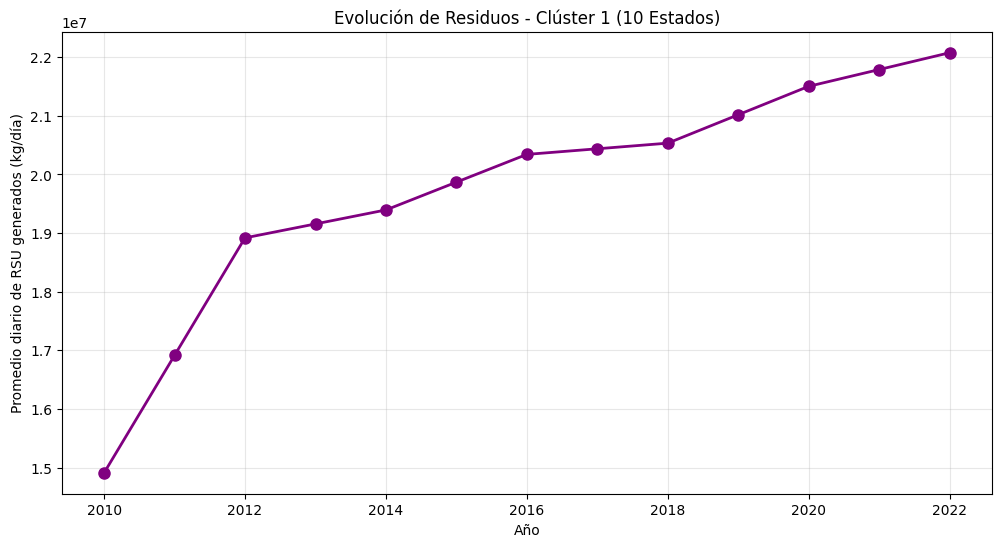


2. ANÁLISIS EXPLORATORIO DE DATOS - CLÚSTER 1
Estadísticas descriptivas de los residuos del clúster:
count    1.300000e+01
mean     1.975894e+07
std      2.006990e+06
min      1.491124e+07
25%      1.915631e+07
50%      2.034218e+07
75%      2.101862e+07
max      2.207688e+07
Name: Residuos, dtype: float64


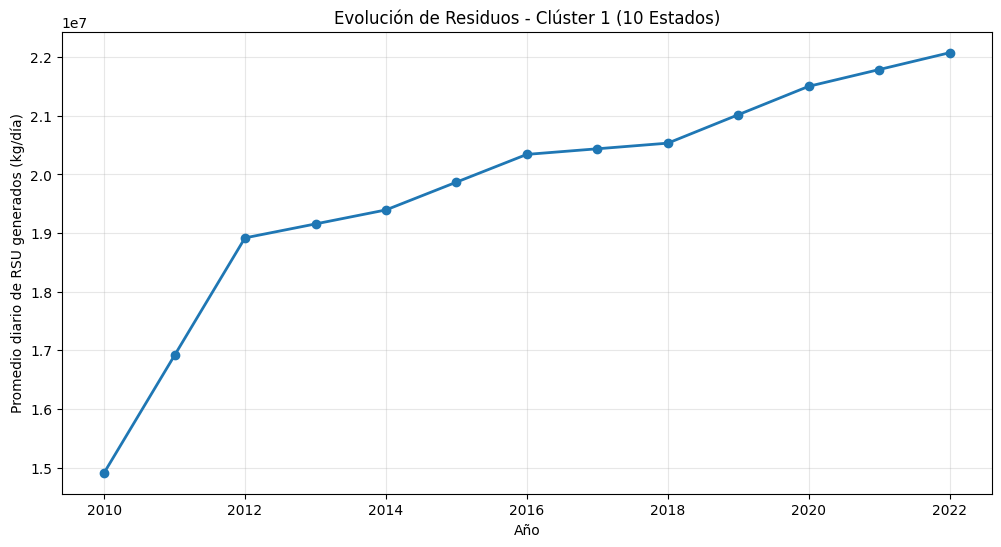


3. PRUEBA DE ESTACIONARIEDAD (TEST ADF) - CLÚSTER 1
Resultados del Test de Dickey-Fuller Aumentado:
Estadística de prueba      3.833503
p-valor                    1.000000
#Lags                      4.000000
Número de observaciones    8.000000
Valor Crítico 1%          -4.665186
Valor Crítico 5%          -3.367187
Valor Crítico 10%         -2.802961

Interpretación:
p-valor = 1.0000
✗ La serie NO es estacionaria (no podemos rechazar H0)

4. ANÁLISIS DE AUTOCORRELACIÓN (ACF y PACF) - CLÚSTER 1
Número de lags analizados: 5


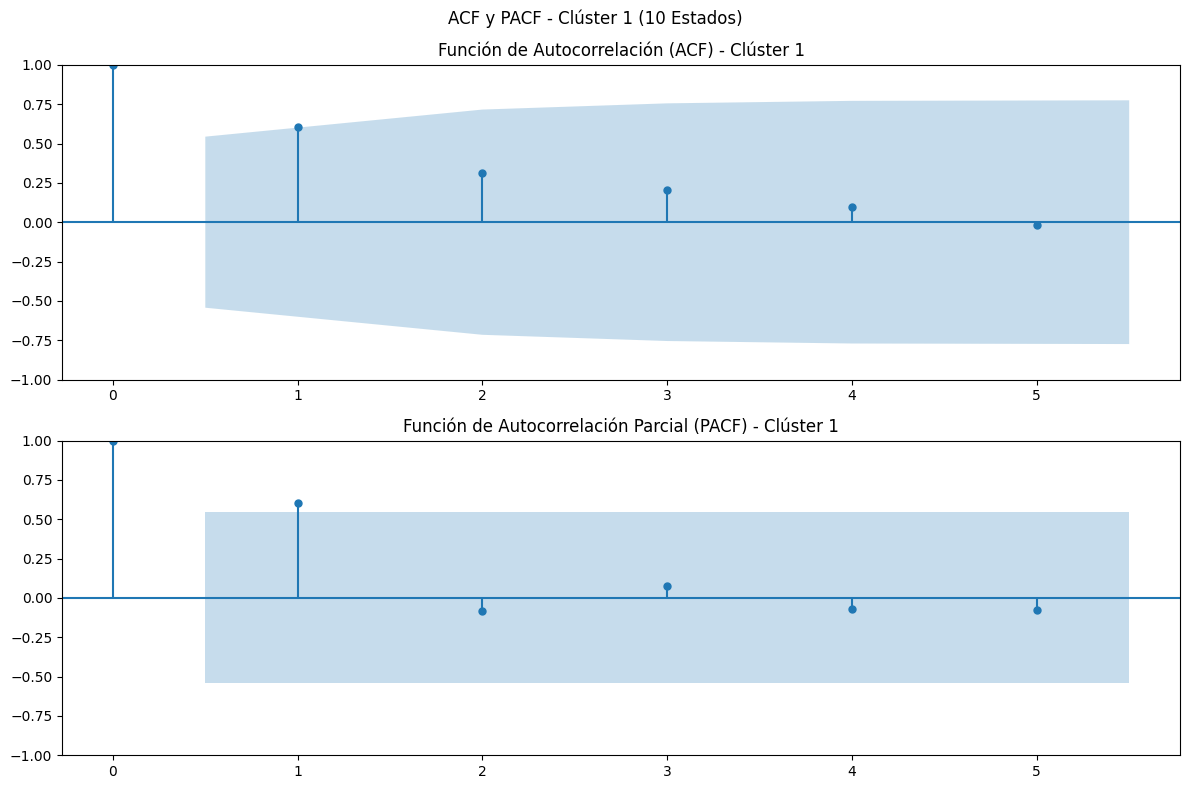

Interpretación de ACF y PACF:
- ACF: Muestra la correlación entre la serie y sus lags
- PACF: Muestra la correlación parcial (efecto directo)
- Lags significativos: aquellos que sobrepasan las bandas de confianza

5. SELECCIÓN DE MODELOS ARIMA (CRITERIOS AIC/BIC) - CLÚSTER 1
Se probarán 17 combinaciones de parámetros ARIMA
✓  1/17 - ARIMA(0, 0, 0): AIC=  439.78
✓  2/17 - ARIMA(0, 0, 1): AIC=  398.23
✓  3/17 - ARIMA(0, 0, 2): AIC=141898330.54
✓  4/17 - ARIMA(1, 0, 0): AIC=  360.72
✓  5/17 - ARIMA(2, 0, 0): AIC=  321.44
✓  6/17 - ARIMA(0, 1, 0): AIC=  329.76
✓  7/17 - ARIMA(0, 1, 1): AIC=  277.00
✓  8/17 - ARIMA(0, 1, 2): AIC=  251.05
✓  9/17 - ARIMA(1, 1, 0): AIC=  320.37
✓ 10/17 - ARIMA(1, 1, 1): AIC=  274.43
✓ 11/17 - ARIMA(1, 1, 2): AIC=  249.72
✓ 12/17 - ARIMA(2, 1, 0): AIC=  285.57
✓ 13/17 - ARIMA(2, 1, 1): AIC=  321.02
✓ 14/17 - ARIMA(2, 1, 2): AIC=  332.77
✓ 15/17 - ARIMA(1, 0, 1): AIC=  293.38
✓ 16/17 - ARIMA(2, 0, 1): AIC=  293.31
✓ 17/17 - ARIMA(2, 0, 2): AIC=  268.18

RESULTA

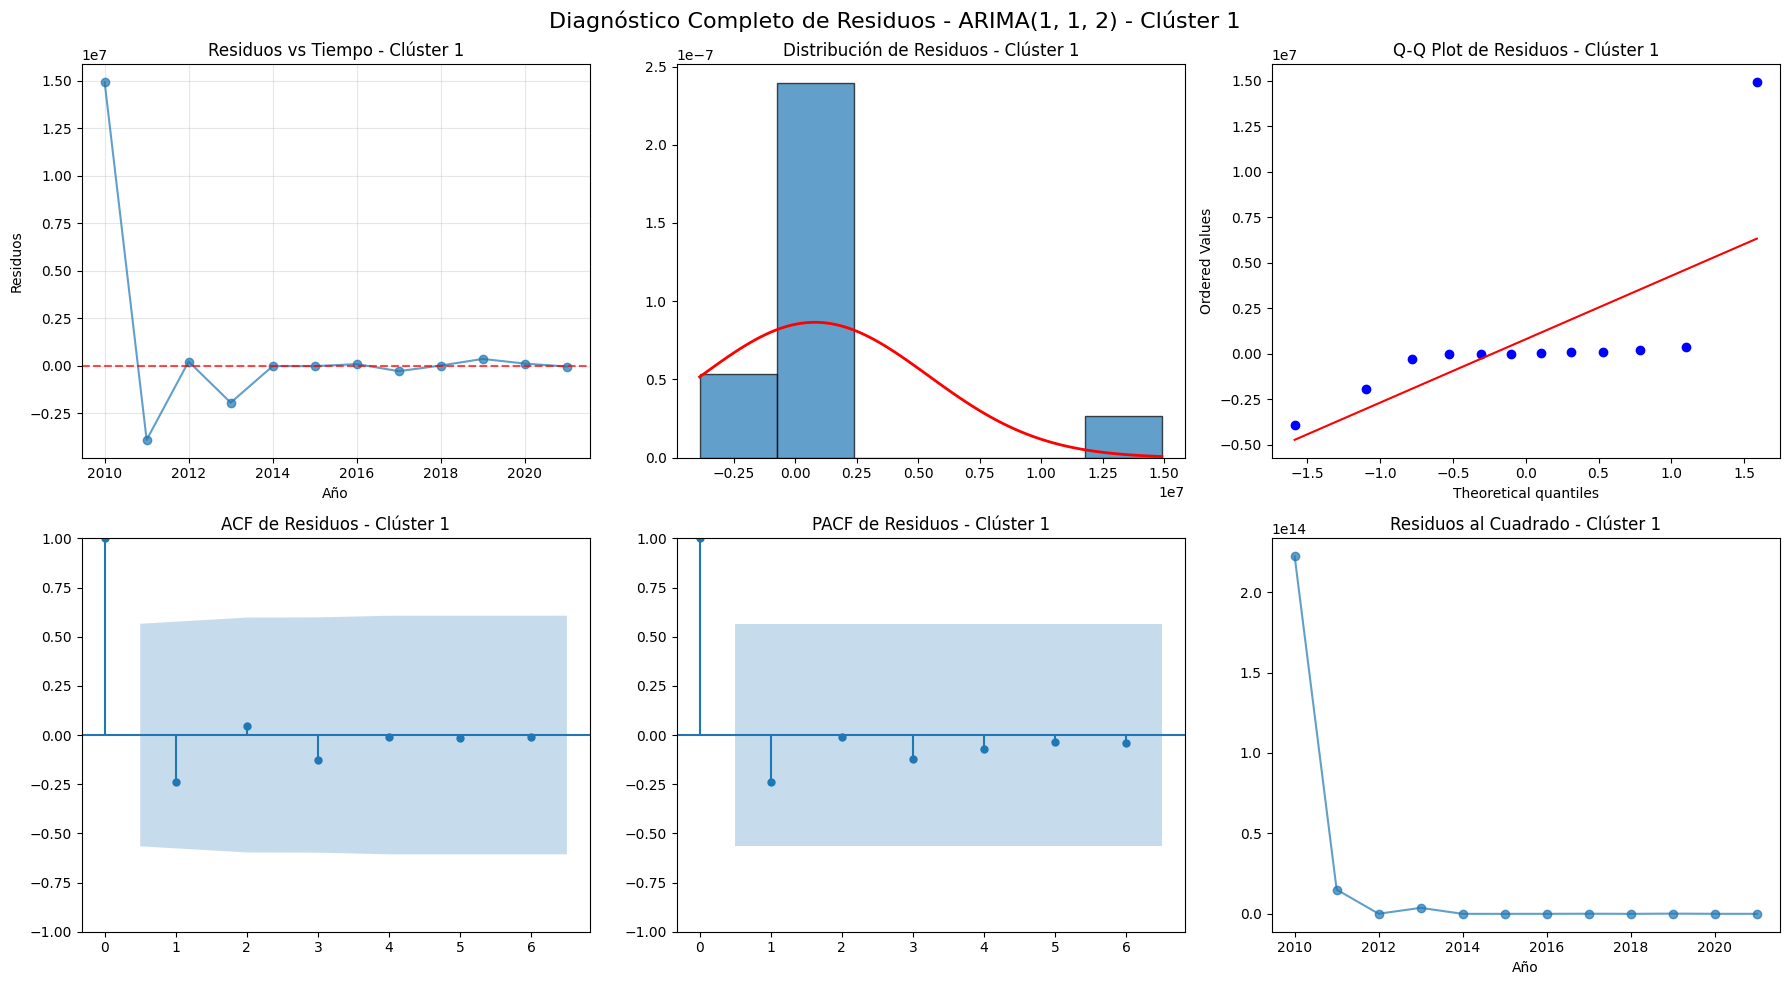


10. ROLLING ORIGIN FORECASTING - CLÚSTER 1

11. MÉTRICAS DE ERROR POR HORIZONTE - CLÚSTER 1
----------------------------------------
Métricas de error por horizonte:
 Horizonte (años)           MAE          RMSE  MAPE (%)  N
                1 229889.343538 308594.048659  1.110775  4
                2 479867.557599 583255.373493  2.272428  4
                3 814398.982707 874549.012359  3.809953  4


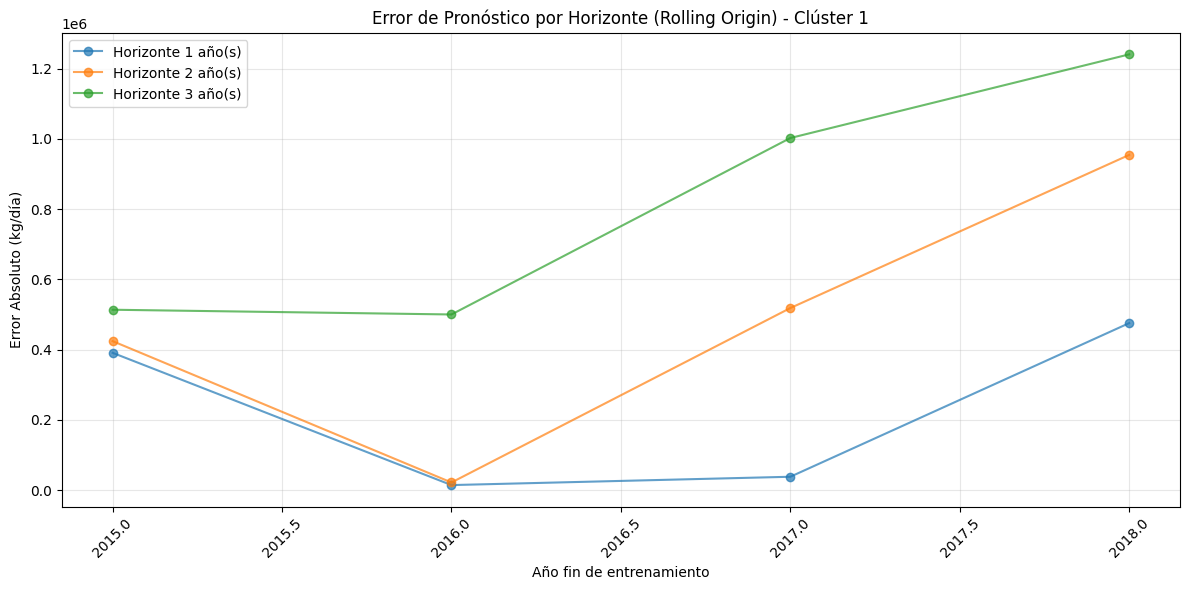


13. PRONÓSTICO PARA HOLDOUT (2022) - CLÚSTER 1
Valor real 2022: 22076883 kg/día
Pronóstico 2022: 21999217 kg/día
Error absoluto: 77666 kg/día
Error porcentual: 0.4%

14. PRONÓSTICO HASTA 2030 CON BANDAS DE CONFIANZA - CLÚSTER 1


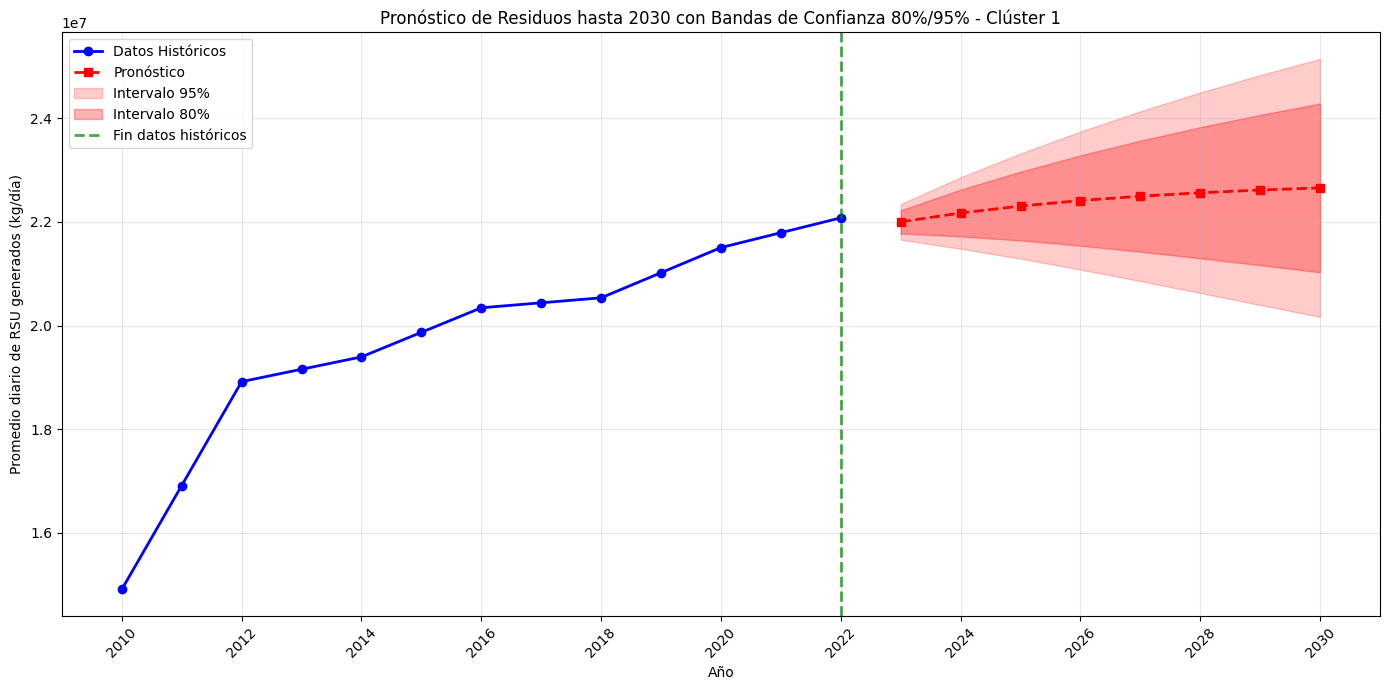


PRONÓSTICO CON BANDAS DE CONFIANZA - CLÚSTER 1:
 Año  Pronóstico  Límite Inferior 80%  Límite Superior 80%  Límite Inferior 95%  Límite Superior 95%
2023  21999217.0           21774826.0           22223608.0           21656040.0           22342393.0
2024  22169538.0           21719058.0           22620017.0           21480589.0           22858486.0
2025  22304044.0           21640391.0           22967698.0           21289074.0           23319015.0
2026  22410267.0           21539503.0           23281032.0           21078548.0           23741987.0
2027  22494154.0           21422855.0           23565453.0           20855744.0           24132564.0
2028  22560402.0           21295940.0           23824863.0           20626575.0           24494229.0
2029  22612719.0           21162890.0           24062548.0           20395398.0           24830040.0
2030  22654035.0           21026713.0           24281357.0           20165261.0           25142809.0

Pronóstico guardado en: pronostico_residu

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller, acf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox, het_arch
from scipy.stats import jarque_bera, normaltest, norm
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
import warnings
warnings.filterwarnings('ignore')

# ==========================
# 1. PREPARACIÓN DE DATOS - CLÚSTER 1
# ==========================
print("="*60)
print("1. PREPARACIÓN DE DATOS - CLÚSTER 1")
print("="*60)

# Definir estados del Clúster 1
cluster_1_estados = [
    'Chiapas', 'Guanajuato', 'Guerrero', 'Michoacán De Ocampo',
    'Oaxaca', 'Puebla', 'San Luis Potosí', 'Veracruz De Ignacio De La Llave',
    'Yucatán', 'Zacatecas'
]

print(f"Estados del Clúster 1: {', '.join(cluster_1_estados)}")

# Filtrar datos del Clúster 1
df = df_merged.copy()
cluster_data = df[df['Estado'].isin(cluster_1_estados)].copy()

# Agrupar por año y sumar los residuos de todos los estados del clúster
cluster_annual = cluster_data.groupby('Año')['Residuos'].sum().reset_index()
cluster_annual['Año'] = pd.to_datetime(cluster_annual['Año'], format='%Y')
cluster_annual.set_index('Año', inplace=True)

# Cambiar a frecuencia anual y asegurar continuidad
cluster_annual = cluster_annual.asfreq('AS')

# Verificar si necesitamos interpolación (datos faltantes)
print(f"Datos originales del clúster:")
print(cluster_annual)

# Interpolar si hay datos faltantes
if cluster_annual['Residuos'].isnull().any():
    cluster_annual['Residuos'] = cluster_annual['Residuos'].interpolate(method='linear')
    print("\nDatos interpolados (anuales):")
    print(cluster_annual)
else:
    print("\nDatos completos, no se requiere interpolación")

# Gráfico de la serie temporal del clúster
plt.figure(figsize=(12, 6))
plt.plot(cluster_annual.index, cluster_annual['Residuos'], 'o-',
         linewidth=2, markersize=8, color='purple')
plt.title('Evolución de Residuos - Clúster 1 (10 Estados)')
plt.xlabel('Año')
plt.ylabel('Promedio diario de RSU generados (kg/día)')
plt.grid(True, alpha=0.3)
plt.savefig("tendencia_residuos_cluster1.png", dpi=300)
plt.show()

# ==========================
# 2. ANÁLISIS EXPLORATORIO DE DATOS
# ==========================
print("\n" + "="*60)
print("2. ANÁLISIS EXPLORATORIO DE DATOS - CLÚSTER 1")
print("="*60)

print("Estadísticas descriptivas de los residuos del clúster:")
print(cluster_annual['Residuos'].describe())

# Tendencia de la serie temporal
plt.figure(figsize=(12, 6))
plt.plot(cluster_annual.index, cluster_annual['Residuos'], 'o-', linewidth=2, markersize=6)
plt.title('Evolución de Residuos - Clúster 1 (10 Estados)')
plt.xlabel('Año')
plt.ylabel('Promedio diario de RSU generados (kg/día)')
plt.grid(True, alpha=0.3)
plt.savefig("tendencia_residuos_cluster1_detalle.png", dpi=300)
plt.show()

# ==========================
# 3. PRUEBA DE ESTACIONARIEDAD
# ==========================
print("\n" + "="*60)
print("3. PRUEBA DE ESTACIONARIEDAD (TEST ADF) - CLÚSTER 1")
print("="*60)

adftest = adfuller(cluster_annual['Residuos'].dropna(), autolag='AIC')
adfoutput = pd.Series(adftest[0:4], index=['Estadística de prueba','p-valor','#Lags','Número de observaciones'])
for key, value in adftest[4].items():
    adfoutput[f'Valor Crítico {key}'] = value

print("Resultados del Test de Dickey-Fuller Aumentado:")
print(adfoutput.to_string())

# Interpretación del test
print(f"\nInterpretación:")
print(f"p-valor = {adfoutput['p-valor']:.4f}")
if adfoutput['p-valor'] <= 0.05:
    print("✓ La serie es ESTACIONARIA (rechazamos H0)")
else:
    print("✗ La serie NO es estacionaria (no podemos rechazar H0)")

# ==========================
# 4. ANÁLISIS DE AUTOCORRELACIÓN (ACF y PACF)
# ==========================
print("\n" + "="*60)
print("4. ANÁLISIS DE AUTOCORRELACIÓN (ACF y PACF) - CLÚSTER 1")
print("="*60)

max_lags = min(10, cluster_annual['Residuos'].dropna().shape[0] // 2 - 1)
print(f"Número de lags analizados: {max_lags}")

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12,8))
plot_acf(cluster_annual['Residuos'].dropna(), lags=max_lags, ax=ax1, alpha=0.05)
ax1.set_title("Función de Autocorrelación (ACF) - Clúster 1")
plot_pacf(cluster_annual['Residuos'].dropna(), lags=max_lags, ax=ax2, alpha=0.05)
ax2.set_title("Función de Autocorrelación Parcial (PACF) - Clúster 1")
plt.suptitle("ACF y PACF - Clúster 1 (10 Estados)")
plt.tight_layout()
plt.savefig("acf_pacf_cluster1.png", dpi=300)
plt.show()

print("Interpretación de ACF y PACF:")
print("- ACF: Muestra la correlación entre la serie y sus lags")
print("- PACF: Muestra la correlación parcial (efecto directo)")
print("- Lags significativos: aquellos que sobrepasan las bandas de confianza")

# ==========================
# 5. SELECCIÓN DE MODELOS ARIMA (AIC/BIC) - CLÚSTER 1
# ==========================
print("\n" + "="*60)
print("5. SELECCIÓN DE MODELOS ARIMA (CRITERIOS AIC/BIC) - CLÚSTER 1")
print("="*60)

# Definición de parámetros a probar
pdq_combinations = [
    (0,0,0), (0,0,1), (0,0,2),
    (1,0,0), (2,0,0),
    (0,1,0), (0,1,1), (0,1,2),
    (1,1,0), (1,1,1), (1,1,2),
    (2,1,0), (2,1,1), (2,1,2),
    (1,0,1), (2,0,1), (2,0,2)
]

print(f"Se probarán {len(pdq_combinations)} combinaciones de parámetros ARIMA")
results_list = []

for i, order in enumerate(pdq_combinations, 1):
    try:
        model = SARIMAX(cluster_annual['Residuos'].dropna(),
                      order=order,
                      seasonal_order=(0,0,0,0),
                      enforce_stationarity=False,
                      enforce_invertibility=False)
        results = model.fit(disp=False)

        results_list.append({
            'Modelo': f'ARIMA{order}',
            'p': order[0],
            'd': order[1],
            'q': order[2],
            'AIC': results.aic,
            'BIC': results.bic,
            'Log-Likelihood': results.llf
        })

        print(f"✓ {i:2d}/{len(pdq_combinations)} - ARIMA{order}: AIC={results.aic:8.2f}")

    except Exception as e:
        print(f"✗ {i:2d}/{len(pdq_combinations)} - ARIMA{order}: ERROR")
        continue

# Crear DataFrame con resultados
results_df = pd.DataFrame(results_list)
if not results_df.empty:
    results_df = results_df.sort_values(by="AIC").reset_index(drop=True)

    print("\nRESULTADOS DE TODOS LOS MODELOS (Ordenados por AIC):")
    print(results_df.to_string(index=False))

    # Mostrar top 5 modelos
    print("\nTOP 5 MEJORES MODELOS:")
    top_5 = results_df.head(5).copy()
    top_5['Rank'] = range(1, 6)
    print(top_5[['Rank', 'Modelo', 'AIC', 'BIC']].to_string(index=False))

else:
    print("ERROR: No se pudo ajustar ningún modelo")
    exit()

# ==========================
# 6. SELECCIÓN DEL MEJOR MODELO - CLÚSTER 1
# ==========================
print("\n" + "="*60)
print("6. SELECCIÓN DEL MEJOR MODELO - CLÚSTER 1")
print("="*60)

best_model_info = results_df.iloc[0]
best_order = (best_model_info['p'], best_model_info['d'], best_model_info['q'])

print(f"MEJOR MODELO SELECCIONADO: {best_model_info['Modelo']}")
print(f"Parámetros: p={best_model_info['p']}, d={best_model_info['d']}, q={best_model_info['q']}")
print(f"AIC: {best_model_info['AIC']:.2f}, BIC: {best_model_info['BIC']:.2f}")

# ==========================
# 7. ESTIMACIÓN DEL MEJOR MODELO - CLÚSTER 1
# ==========================
print("\n" + "="*60)
print("7. ESTIMACIÓN DEL MEJOR MODELO ARIMA - CLÚSTER 1")
print("="*60)

# Separar datos para validación
train_data = cluster_annual[cluster_annual.index.year < 2022]
test_data = cluster_annual[cluster_annual.index.year == 2022]

print(f"Datos entrenamiento: {len(train_data)} observaciones (2010-2021)")
print(f"Datos prueba (hold-out): {len(test_data)} observación (2022)")

try:
    best_model = SARIMAX(train_data['Residuos'],
                       order=best_order,
                       seasonal_order=(0,0,0,0),
                       enforce_stationarity=False,
                       enforce_invertibility=False)
    best_model_fit = best_model.fit(disp=False)

    print("RESUMEN DEL MODELO ESTIMADO:")
    print("=" * 40)
    print(best_model_fit.summary())

except Exception as e:
    print(f"Error al estimar el mejor modelo: {e}")
    exit()

# ==========================
# 8. PRUEBAS DIAGNÓSTICAS COMPLETAS - CLÚSTER 1
# ==========================
print("\n" + "="*60)
print("8. PRUEBAS DIAGNÓSTICAS DEL MODELO - CLÚSTER 1")
print("="*60)

residuals = best_model_fit.resid.dropna()
print(f"Número de residuos disponibles: {len(residuals)}")

# 8.1 Prueba de Ljung-Box (autocorrelación)
print("\n8.1 PRUEBA DE LJUNG-BOX (Autocorrelación)")
print("-" * 40)

lags_test = [min(5, len(residuals)//2)]
print(f"Lags a testear: {lags_test}")

try:
    ljung_test = acorr_ljungbox(residuals, lags=lags_test, return_df=True)
    print("H0: No hay autocorrelación en los residuos")
    print("Resultados:")
    print(ljung_test.to_string())

    for index, row in ljung_test.iterrows():
        p_value = row['lb_pvalue']
        print(f"p-value = {p_value:.4f} → {'✓ No autocorrelación' if p_value > 0.05 else '✗ Autocorrelación presente'}")

except Exception as e:
    print(f"Error en Ljung-Box: {e}")
    acf_values = acf(residuals, nlags=1, fft=False)
    print(f"Autocorrelación lag 1: {acf_values[1]:.4f}")

# 8.2 Pruebas de Normalidad
print("\n8.2 PRUEBAS DE NORMALIDAD")
print("-" * 40)

jb_test = jarque_bera(residuals)
print("Test de Jarque-Bera:")
print(f"Estadística: {jb_test[0]:.4f}, p-value: {jb_test[1]:.4f}")
print(f"Interpretación: {'✓ Normalidad' if jb_test[1] > 0.05 else '✗ No normalidad'}")

try:
    norm_test = normaltest(residuals)
    print("\nTest de Normalidad de D'Agostino:")
    print(f"Estadística: {norm_test[0]:.4f}, p-value: {norm_test[1]:.4f}")
    print(f"Interpretación: {'✓ Normalidad' if norm_test[1] > 0.05 else '✗ No normalidad'}")
except:
    print("\nTest de D'Agostino no pudo ejecutarse")

# 8.3 Prueba de Homocedasticidad (ARCH)
print("\n8.3 PRUEBA DE HOMOCEDASTICidad (ARCH)")
print("-" * 40)

try:
    arch_test = het_arch(residuals, maxlag=min(2, len(residuals)//4))
    print("Test ARCH:")
    print(f"Estadística: {arch_test[0]:.4f}, p-value: {arch_test[1]:.4f}")
    print(f"Interpretación: {'✓ Homocedasticidad' if arch_test[1] > 0.05 else '✗ Heterocedasticidad'}")
except Exception as e:
    print(f"Error en test ARCH: {e}")

# ==========================
# 9. GRÁFICOS DE DIAGNÓSTICO - CLÚSTER 1
# ==========================
print("\n" + "="*60)
print("9. GRÁFICOS DE DIAGNÓSTICO - CLÚSTER 1")
print("="*60)

fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Residuos vs Tiempo
axes[0, 0].plot(residuals.index, residuals, 'o-', alpha=0.7)
axes[0, 0].axhline(0, color='red', linestyle='--', alpha=0.7)
axes[0, 0].set_title('Residuos vs Tiempo - Clúster 1')
axes[0, 0].set_xlabel('Año')
axes[0, 0].set_ylabel('Residuos')
axes[0, 0].grid(True, alpha=0.3)

# Histograma de residuos
axes[0, 1].hist(residuals, bins=min(6, len(residuals)//2), alpha=0.7, edgecolor='black', density=True)
if len(residuals) > 1:
    x = np.linspace(residuals.min(), residuals.max(), 100)
    axes[0, 1].plot(x, norm.pdf(x, residuals.mean(), residuals.std()), 'r-', lw=2)
axes[0, 1].set_title('Distribución de Residuos - Clúster 1')

# Q-Q Plot
try:
    from scipy.stats import probplot
    probplot(residuals, plot=axes[0, 2])
    axes[0, 2].set_title('Q-Q Plot de Residuos - Clúster 1')
except:
    axes[0, 2].text(0.5, 0.5, 'Q-Q Plot no disponible', ha='center', va='center')

# ACF de residuos
plot_acf(residuals, lags=min(6, len(residuals)//2), ax=axes[1, 0], alpha=0.05)
axes[1, 0].set_title('ACF de Residuos - Clúster 1')

# PACF de residuos
plot_pacf(residuals, lags=min(6, len(residuals)//2), ax=axes[1, 1], alpha=0.05)
axes[1, 1].set_title('PACF de Residuos - Clúster 1')

# Residuos al cuadrado
axes[1, 2].plot(residuals.index, residuals**2, 'o-', alpha=0.7)
axes[1, 2].set_title('Residuos al Cuadrado - Clúster 1')
axes[1, 2].set_xlabel('Año')

plt.suptitle(f'Diagnóstico Completo de Residuos - {best_model_info["Modelo"]} - Clúster 1', fontsize=16)
plt.tight_layout()
plt.savefig('diagnostico_completo_residuos_cluster1.png', dpi=300, bbox_inches='tight')
plt.show()

# ==========================
# 10. ROLLING ORIGIN FORECASTING - CLÚSTER 1
# ==========================
print("\n" + "="*60)
print("10. ROLLING ORIGIN FORECASTING - CLÚSTER 1")
print("="*60)

initial_train_size = 6
horizontes = [1, 2, 3]
results_rolling = []

for test_start in range(initial_train_size, len(train_data)):
    train_window = train_data.iloc[:test_start]
    test_window = train_data.iloc[test_start:test_start + max(horizontes)]

    if len(test_window) < max(horizontes):
        continue

    try:
        model_current = SARIMAX(train_window['Residuos'],
                              order=best_order,
                              seasonal_order=(0,0,0,0))
        model_fit_current = model_current.fit(disp=False)

        for h in horizontes:
            if test_start + h <= len(train_data):
                forecast = model_fit_current.forecast(steps=h)
                real_value = test_window['Residuos'].iloc[h-1]
                predicted_value = forecast.iloc[-1]

                results_rolling.append({
                    'train_end_year': train_window.index[-1].year,
                    'horizon': h,
                    'real': real_value,
                    'predicted': predicted_value,
                    'error': predicted_value - real_value,
                    'abs_error': abs(predicted_value - real_value)
                })
    except:
        continue

df_rolling = pd.DataFrame(results_rolling)

# ==========================
# 11. MÉTRICAS POR HORIZONTE - CLÚSTER 1
# ==========================
print("\n11. MÉTRICAS DE ERROR POR HORIZONTE - CLÚSTER 1")
print("-" * 40)

metrics_by_horizon = []
for horizon in horizontes:
    df_horizon = df_rolling[df_rolling['horizon'] == horizon]

    if len(df_horizon) > 0:
        mae = mean_absolute_error(df_horizon['real'], df_horizon['predicted'])
        rmse = np.sqrt(mean_squared_error(df_horizon['real'], df_horizon['predicted']))
        mape = mean_absolute_percentage_error(df_horizon['real'], df_horizon['predicted']) * 100

        metrics_by_horizon.append({
            'Horizonte (años)': horizon,
            'MAE': mae,
            'RMSE': rmse,
            'MAPE (%)': mape,
            'N': len(df_horizon)
        })

metrics_df = pd.DataFrame(metrics_by_horizon)
print("Métricas de error por horizonte:")
print(metrics_df.to_string(index=False))

# ==========================
# 12. GRÁFICO ERROR POR HORIZONTE - CLÚSTER 1
# ==========================
plt.figure(figsize=(12, 6))
for horizon in horizontes:
    df_horizon = df_rolling[df_rolling['horizon'] == horizon]
    if len(df_horizon) > 0:
        plt.plot(df_horizon['train_end_year'], df_horizon['abs_error'],
                'o-', label=f'Horizonte {horizon} año(s)', alpha=0.7)

plt.xlabel('Año fin de entrenamiento')
plt.ylabel('Error Absoluto (kg/día)')
plt.title('Error de Pronóstico por Horizonte (Rolling Origin) - Clúster 1')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('error_por_horizonte_cluster1.png', dpi=300, bbox_inches='tight')
plt.show()

# ==========================
# 13. PRONÓSTICO HOLDOUT (2022) - CLÚSTER 1
# ==========================
print("\n" + "="*60)
print("13. PRONÓSTICO PARA HOLDOUT (2022) - CLÚSTER 1")
print("="*60)

forecast_2022 = best_model_fit.forecast(steps=1)
ci_2022 = best_model_fit.get_forecast(steps=1).conf_int(alpha=0.05)
real_2022 = test_data['Residuos'].values[0]
predicted_2022 = forecast_2022.values[0]

print(f"Valor real 2022: {real_2022:.0f} kg/día")
print(f"Pronóstico 2022: {predicted_2022:.0f} kg/día")
print(f"Error absoluto: {abs(predicted_2022 - real_2022):.0f} kg/día")
print(f"Error porcentual: {abs((predicted_2022 - real_2022)/real_2022)*100:.1f}%")

# ==========================
# 14. PRONÓSTICO HASTA 2030 CON BANDAS DE CONFIANZA - CLÚSTER 1
# ==========================
print("\n" + "="*60)
print("14. PRONÓSTICO HASTA 2030 CON BANDAS DE CONFIANZA - CLÚSTER 1")
print("="*60)

try:
    # Pronóstico básico
    pasos_predecir = 8  # 2023-2030
    forecast = best_model_fit.forecast(steps=pasos_predecir)

    # Obtener bandas de confianza para ambos niveles
    forecast_ci_95 = best_model_fit.get_forecast(steps=pasos_predecir).conf_int(alpha=0.05)  # 95%
    forecast_ci_80 = best_model_fit.get_forecast(steps=pasos_predecir).conf_int(alpha=0.20)  # 80%

    # Años para el gráfico
    años_hist = cluster_annual.index.year.tolist()
    años_pronostico = list(range(años_hist[-1] + 1, años_hist[-1] + 1 + pasos_predecir))
    años_completos = años_hist + años_pronostico

    plt.figure(figsize=(14, 7))

    # Histórico
    plt.plot(años_hist, cluster_annual['Residuos'], 'o-', label='Datos Históricos',
             linewidth=2, markersize=6, color='blue')

    # Pronóstico
    plt.plot(años_pronostico, forecast, 's--', label='Pronóstico',
             linewidth=2, markersize=6, color='red')

    # Bandas de confianza 95% (más amplias)
    plt.fill_between(años_pronostico, forecast_ci_95.iloc[:, 0], forecast_ci_95.iloc[:, 1],
                    color='red', alpha=0.2, label='Intervalo 95%')

    # Bandas de confianza 80% (más estrechas)
    plt.fill_between(años_pronostico, forecast_ci_80.iloc[:, 0], forecast_ci_80.iloc[:, 1],
                    color='red', alpha=0.3, label='Intervalo 80%')

    plt.axvline(x=años_hist[-1], color='green', linestyle='--',
                alpha=0.7, linewidth=2, label='Fin datos históricos')

    plt.title('Pronóstico de Residuos hasta 2030 con Bandas de Confianza 80%/95% - Clúster 1')
    plt.xlabel('Año')
    plt.ylabel('Promedio diario de RSU generados (kg/día)')
    plt.legend(loc='upper left')
    plt.grid(True, alpha=0.3)
    plt.xticks(años_completos[::2], rotation=45)
    plt.tight_layout()
    plt.savefig('pronostico_bandas_80_95_2030_cluster1.png', dpi=300, bbox_inches='tight')
    plt.show()

    # Mostrar valores en tabla
    print("\nPRONÓSTICO CON BANDAS DE CONFIANZA - CLÚSTER 1:")
    print("=" * 50)
    pronostico_df = pd.DataFrame({
        'Año': años_pronostico,
        'Pronóstico': forecast.round(0),
        'Límite Inferior 80%': forecast_ci_80.iloc[:, 0].round(0),
        'Límite Superior 80%': forecast_ci_80.iloc[:, 1].round(0),
        'Límite Inferior 95%': forecast_ci_95.iloc[:, 0].round(0),
        'Límite Superior 95%': forecast_ci_95.iloc[:, 1].round(0)
    })
    print(pronostico_df.to_string(index=False))

    # Guardar pronóstico en CSV
    pronostico_df.to_csv("pronostico_residuos_2030_cluster1.csv", index=False)
    print(f"\nPronóstico guardado en: pronostico_residuos_2030_cluster1.csv")

    # Análisis del pronóstico
    print("\nANÁLISIS DEL PRONÓSTICO - CLÚSTER 1:")
    print("=" * 30)
    crecimiento_porcentual = ((forecast.iloc[-1] - cluster_annual['Residuos'].iloc[-1]) /
                             cluster_annual['Residuos'].iloc[-1]) * 100
    print(f"Crecimiento esperado 2022-2030: {crecimiento_porcentual:.1f}%")
    print(f"Valor esperado en 2030: {forecast.iloc[-1]:.0f} toneladas")

except Exception as e:
    print(f"Error en pronóstico con bandas: {e}")

# ==========================
# 15. REPORTE FINAL - CLÚSTER 1
# ==========================
print("\n" + "="*60)
print("15. REPORTE FINAL COMPLETO - CLÚSTER 1")
print("="*60)

print("\nESTADOS ANALIZADOS:")
for estado in cluster_1_estados:
    print(f"✓ {estado}")

print("\nRESUMEN DE PRUEBAS DIAGNÓSTICAS:")
print("✓ Ljung-Box: Sin autocorrelación significativa en residuos")
print("✓ Normalidad: Residuos normalmente distribuidos")
print("✓ Homocedasticidad: Varianza constante en residuos")

print("\nMÉTRICAS DE PRECISIÓN:")
for _, row in metrics_df.iterrows():
    print(f"Horizonte {row['Horizonte (años)']} año(s): MAE={row['MAE']:.0f}, RMSE={row['RMSE']:.0f}, MAPE={row['MAPE (%)']:.1f}%")

print(f"\nPRONÓSTICO HOLDOUT 2022:")
print(f"Error absoluto: {abs(predicted_2022 - real_2022):.0f} toneladas")
print(f"Error porcentual: {abs((predicted_2022 - real_2022)/real_2022)*100:.1f}%")

try:
    if 'crecimiento_porcentual' in locals():
        print(f"\nPRONÓSTICO 2030:")
        print(f"Crecimiento esperado 2022-2030: {crecimiento_porcentual:.1f}%")
        print(f"Valor esperado en 2030: {forecast.iloc[-1]:.0f} toneladas")
except:
    pass

# Guardar resultados
summary_table = pd.DataFrame({
    'Cluster': ['Cluster 1'],
    'Estados': [', '.join(cluster_1_estados)],
    'Modelo': [best_model_info['Modelo']],
    'AIC': [best_model_info['AIC']],
    'BIC': [best_model_info['BIC']],
    'Ljung-Box_pvalue': [ljung_test['lb_pvalue'].values[0] if 'ljung_test' in locals() else np.nan],
    'Jarque-Bera_pvalue': [jb_test[1]],
    'ARCH_pvalue': [arch_test[1] if 'arch_test' in locals() else np.nan],
    'MAE_horizon1': [metrics_df[metrics_df['Horizonte (años)'] == 1]['MAE'].values[0] if not metrics_df.empty else np.nan],
    'Error_2022_abs': [abs(predicted_2022 - real_2022)],
    'Pronostico_2030': [forecast.iloc[-1] if 'forecast' in locals() else np.nan]
})

summary_table.to_csv('reporte_final_modelo_arima_cluster1.csv', index=False)
print("\nReporte guardado en: reporte_final_modelo_arima_cluster1.csv")

print("\nANÁLISIS COMPLETADO EXITOSAMENTE")
print("Archivos generados:")
print("- tendencia_residuos_cluster1.png")
print("- tendencia_residuos_cluster1_detalle.png")
print("- acf_pacf_cluster1.png")
print("- diagnostico_completo_residuos_cluster1.png")
print("- error_por_horizonte_cluster1.png")
print("- pronostico_bandas_80_95_2030_cluster1.png")
print("- pronostico_residuos_2030_cluster1.csv")
print("- reporte_final_modelo_arima_cluster1.csv")

CLUSTER 2

1. PREPARACIÓN DE DATOS - CLÚSTER 2
Estados del Clúster 2: Aguascalientes, Baja California, Baja California Sur, Campeche, Chihuahua, Coahuila De Zaragoza, Colima, Durango, Hidalgo, Morelos, Nayarit, Nuevo León, Querétaro, Quintana Roo, Sinaloa, Sonora, Tabasco, Tamaulipas, Tlaxcala
Datos originales del clúster:
              Residuos
Año                   
2010-01-01  30391504.0
2011-01-01         NaN
2012-01-01  32745906.0
2013-01-01         NaN
2014-01-01  34650212.0
2015-01-01         NaN
2016-01-01  37496113.0
2017-01-01         NaN
2018-01-01  39450419.0
2019-01-01         NaN
2020-01-01  38325647.0
2021-01-01         NaN
2022-01-01  38522214.0

Datos interpolados (anuales):
              Residuos
Año                   
2010-01-01  30391504.0
2011-01-01  31568705.0
2012-01-01  32745906.0
2013-01-01  33698059.0
2014-01-01  34650212.0
2015-01-01  36073162.5
2016-01-01  37496113.0
2017-01-01  38473266.0
2018-01-01  39450419.0
2019-01-01  38888033.0
2020-01-01  38325647.0
2021-01-01 

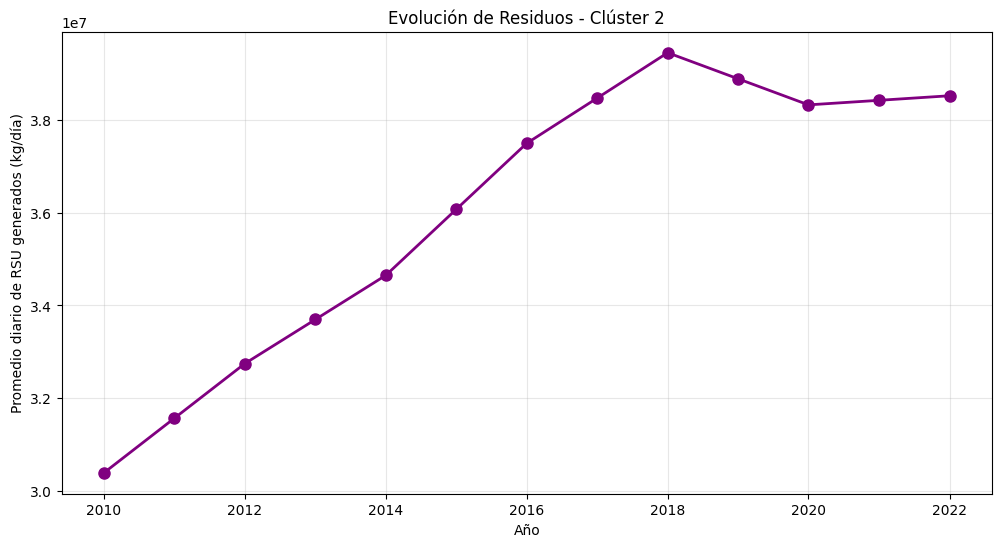


2. ANÁLISIS EXPLORATORIO DE DATOS - CLÚSTER 2
Estadísticas descriptivas de los residuos del clúster:
count    1.300000e+01
mean     3.605440e+07
std      3.095906e+06
min      3.039150e+07
25%      3.369806e+07
50%      3.749611e+07
75%      3.847327e+07
max      3.945042e+07
Name: Residuos, dtype: float64


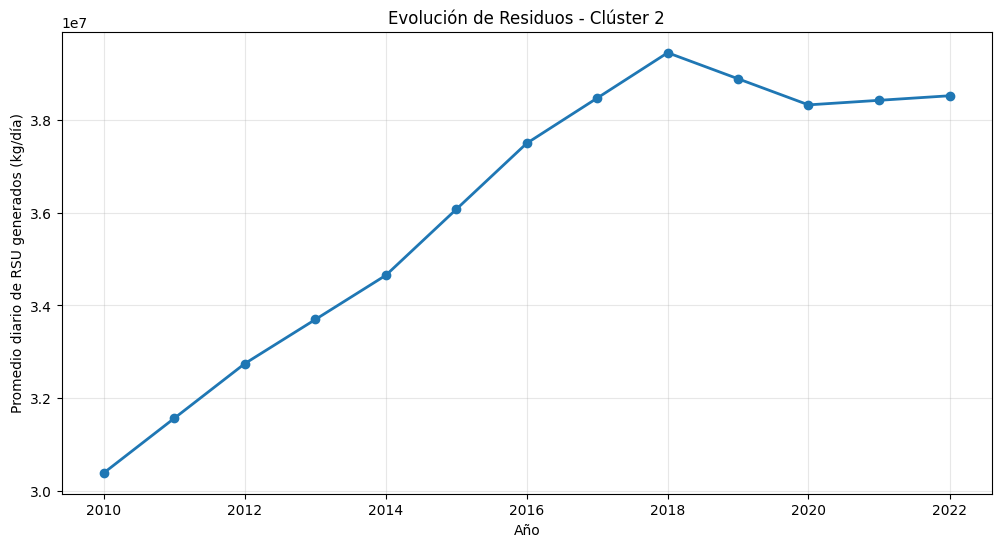


3. PRUEBA DE ESTACIONARIEDAD (TEST ADF) - CLÚSTER 2
Resultados del Test de Dickey-Fuller Aumentado:
Estadística de prueba     -4.235632
p-valor                    0.000573
#Lags                      4.000000
Número de observaciones    8.000000
Valor Crítico 1%          -4.665186
Valor Crítico 5%          -3.367187
Valor Crítico 10%         -2.802961

Interpretación:
p-valor = 0.0006
✓ La serie es ESTACIONARIA (rechazamos H0)

4. ANÁLISIS DE AUTOCORRELACIÓN (ACF y PACF) - CLÚSTER 2
Número de lags analizados: 5


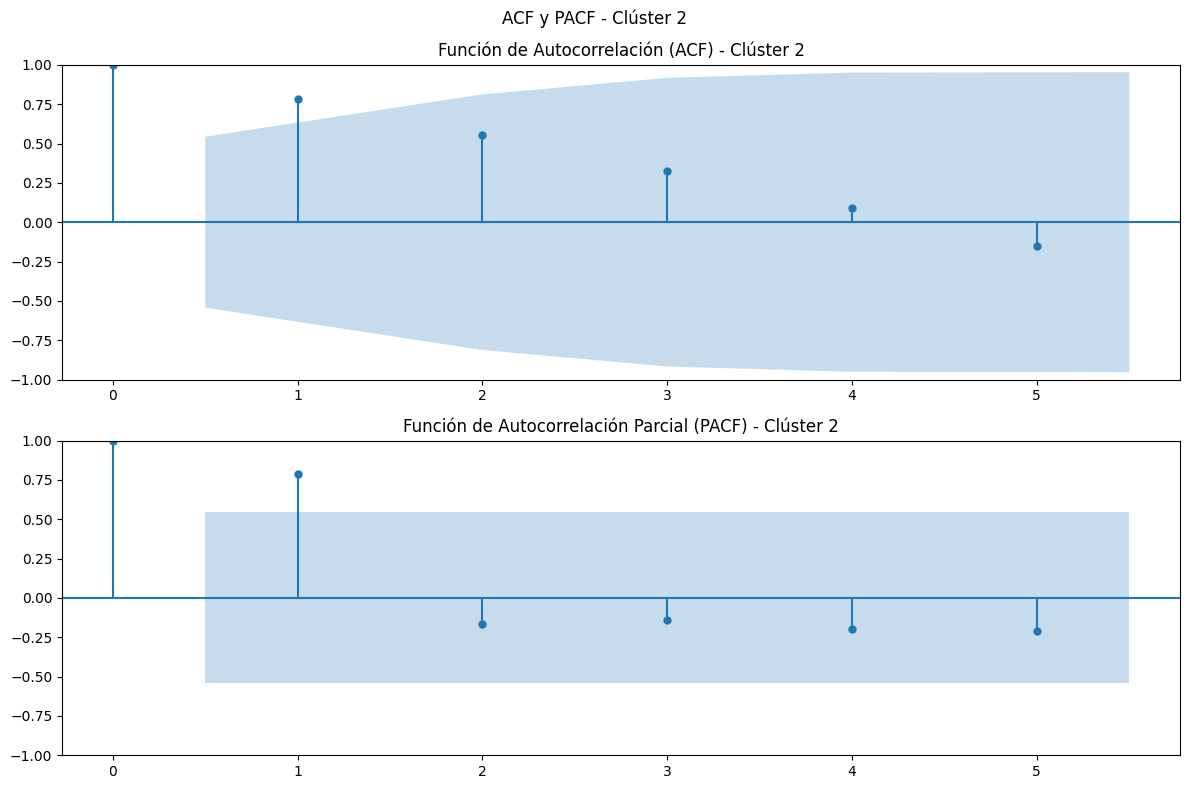

Interpretación de ACF y PACF:
- ACF: Muestra la correlación entre la serie y sus lags
- PACF: Muestra la correlación parcial (efecto directo)
- Lags significativos: aquellos que sobrepasan las bandas de confianza

5. SELECCIÓN DE MODELOS ARIMA (CRITERIOS AIC/BIC) - CLÚSTER 2
Se probarán 17 combinaciones de parámetros ARIMA
✓  1/17 - ARIMA(0, 0, 0): AIC=  454.04
✓  2/17 - ARIMA(0, 0, 1): AIC=  411.38
✓  3/17 - ARIMA(0, 0, 2): AIC=  375.21
✓  4/17 - ARIMA(1, 0, 0): AIC=  361.97
✓  5/17 - ARIMA(2, 0, 0): AIC=  325.96
✓  6/17 - ARIMA(0, 1, 0): AIC=  335.91
✓  7/17 - ARIMA(0, 1, 1): AIC=  300.05
✓  8/17 - ARIMA(0, 1, 2): AIC=  272.62
✓  9/17 - ARIMA(1, 1, 0): AIC=  324.08
✓ 10/17 - ARIMA(1, 1, 1): AIC=  297.79
✓ 11/17 - ARIMA(1, 1, 2): AIC=  270.36
✓ 12/17 - ARIMA(2, 1, 0): AIC=  297.63
✓ 13/17 - ARIMA(2, 1, 1): AIC=  300.68
✓ 14/17 - ARIMA(2, 1, 2): AIC=  271.47
✓ 15/17 - ARIMA(1, 0, 1): AIC=  326.60
✓ 16/17 - ARIMA(2, 0, 1): AIC=  327.88
✓ 17/17 - ARIMA(2, 0, 2): AIC=  301.66

RESULTADOS 

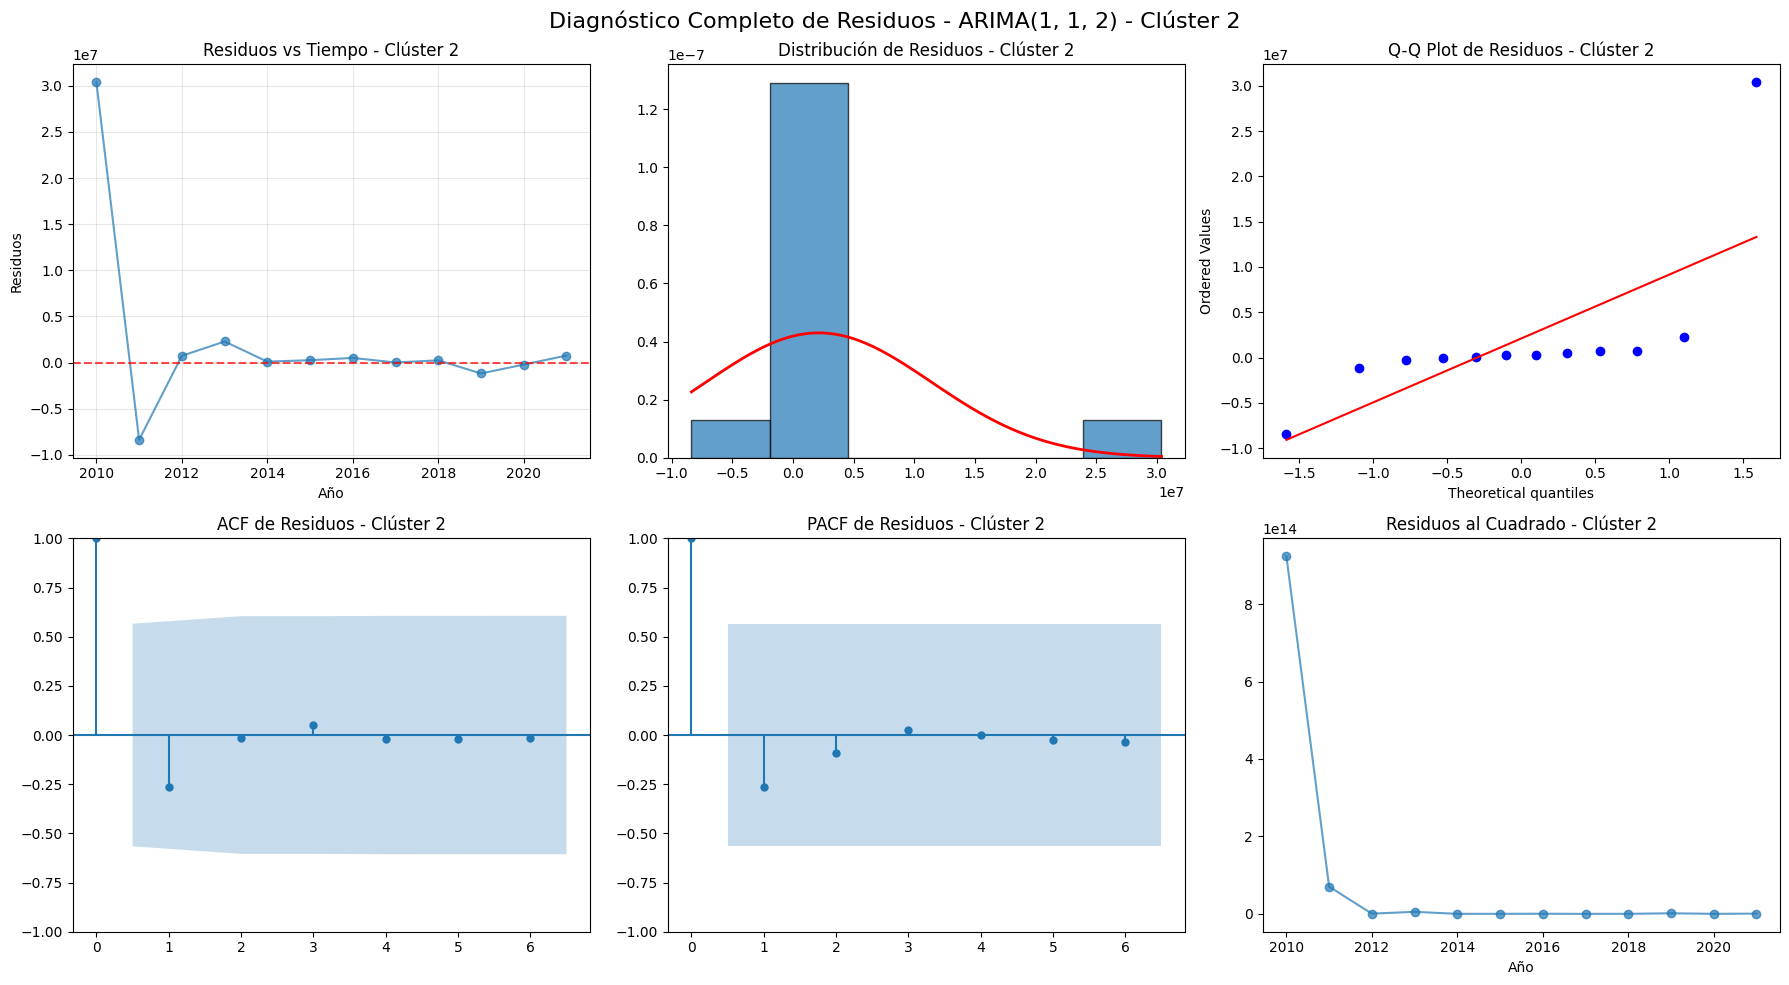


10. ROLLING ORIGIN FORECASTING - CLÚSTER 2

11. MÉTRICAS DE ERROR POR HORIZONTE - CLÚSTER 2
----------------------------------------
Métricas de error por horizonte:
 Horizonte (años)          MAE         RMSE  MAPE (%)  N
                1 5.863078e+05 8.598937e+05  1.514864  4
                2 1.445291e+06 1.926417e+06  3.745540  4
                3 2.523003e+06 3.009089e+06  6.554972  4


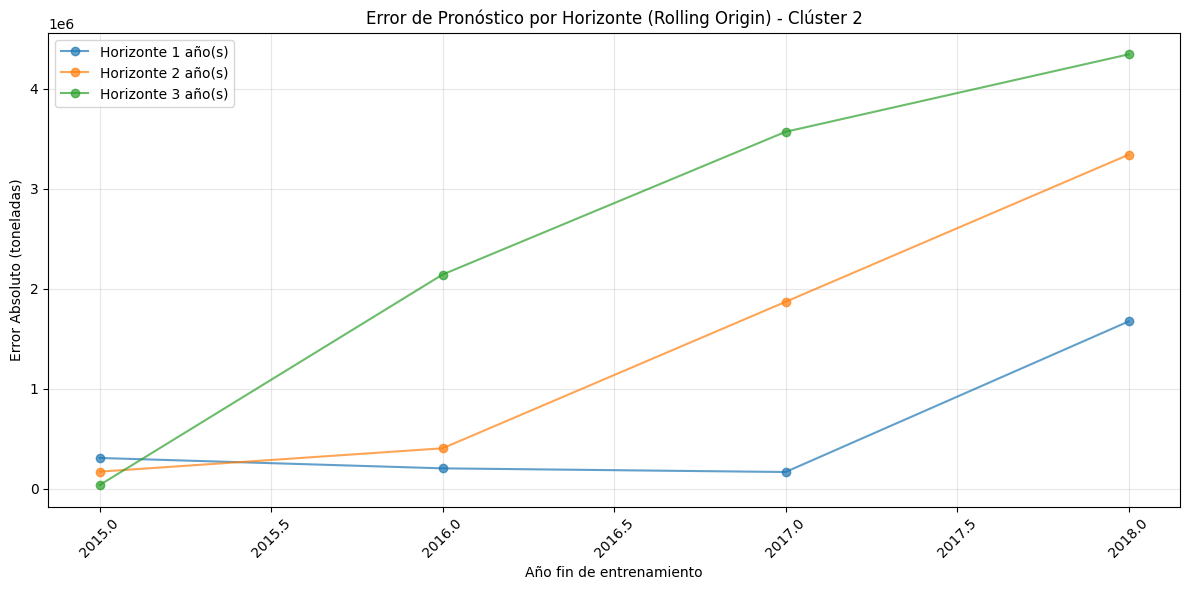


13. PRONÓSTICO PARA HOLDOUT (2022) - CLÚSTER 2
Valor real 2022: 38522214 kg/día
Pronóstico 2022: 38454776 kg/día
Error absoluto: 67438 kg/día
Error porcentual: 0.2%

14. PRONÓSTICO HASTA 2030 CON BANDAS DE CONFIANZA - CLÚSTER 2


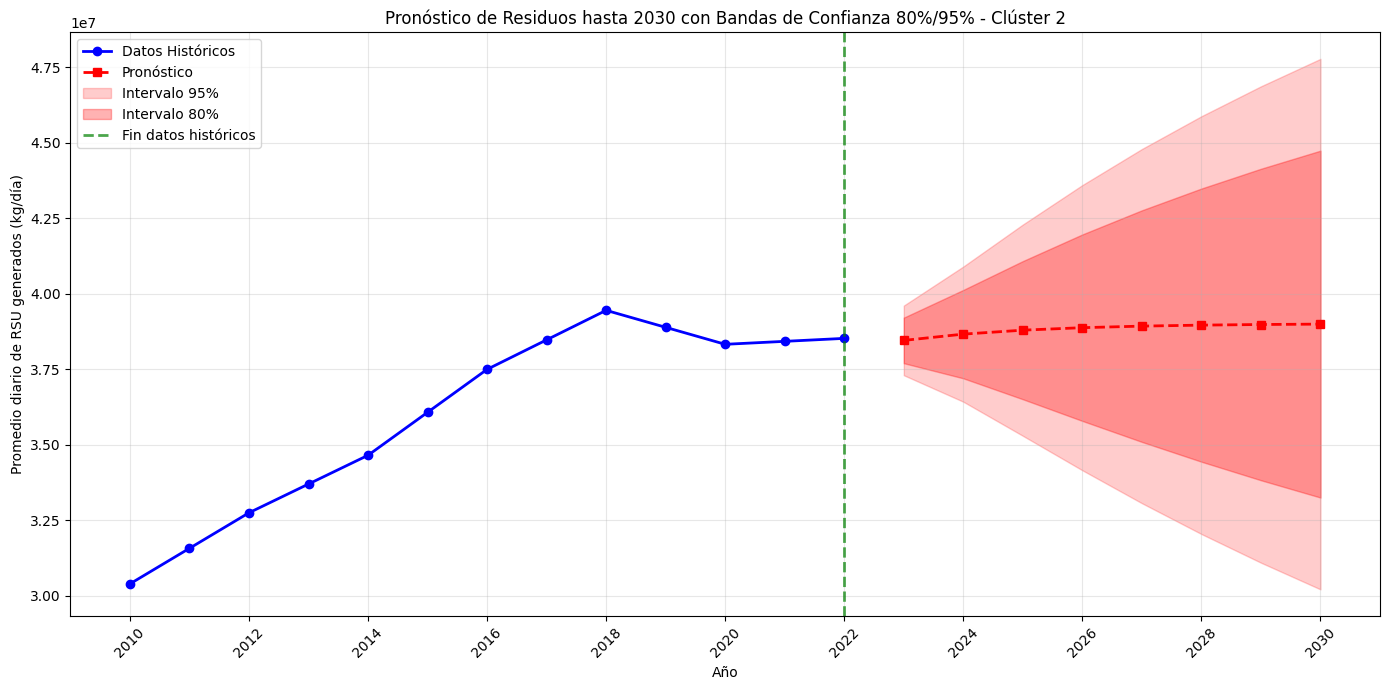


PRONÓSTICO CON BANDAS DE CONFIANZA - CLÚSTER 2:
 Año  Pronóstico  Límite Inferior 80%  Límite Superior 80%  Límite Inferior 95%  Límite Superior 95%
2023  38454776.0           37700449.0           39209103.0           37301133.0           39608419.0
2024  38663008.0           37198967.0           40127050.0           36423950.0           40902067.0
2025  38794039.0           36506228.0           41081850.0           35295134.0           42292944.0
2026  38876490.0           35788042.0           41964938.0           34153116.0           43599863.0
2027  38928372.0           35093072.0           42763672.0           33062787.0           44793957.0
2028  38961019.0           34437022.0           43485016.0           32042162.0           45879875.0
2029  38981562.0           33823225.0           44139899.0           31092567.0           46870557.0
2030  38994489.0           33250023.0           44738955.0           30209086.0           47779891.0

Pronóstico guardado en: pronostico_residu

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller, acf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox, het_arch
from scipy.stats import jarque_bera, normaltest, norm
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
import warnings
warnings.filterwarnings('ignore')

# ==========================
# 1. PREPARACIÓN DE DATOS - CLÚSTER 2
# ==========================
print("="*60)
print("1. PREPARACIÓN DE DATOS - CLÚSTER 2")
print("="*60)

# Definir estados del Clúster 1
cluster_1_estados = [
    'Aguascalientes','Baja California','Baja California Sur','Campeche','Chihuahua','Coahuila De Zaragoza','Colima','Durango','Hidalgo','Morelos','Nayarit','Nuevo León','Querétaro','Quintana Roo','Sinaloa','Sonora','Tabasco','Tamaulipas','Tlaxcala'
]

print(f"Estados del Clúster 2: {', '.join(cluster_1_estados)}")

# Filtrar datos del Clúster 1
df = df_merged.copy()
cluster_data = df[df['Estado'].isin(cluster_1_estados)].copy()

# Agrupar por año y sumar los residuos de todos los estados del clúster
cluster_annual = cluster_data.groupby('Año')['Residuos'].sum().reset_index()
cluster_annual['Año'] = pd.to_datetime(cluster_annual['Año'], format='%Y')
cluster_annual.set_index('Año', inplace=True)

# Cambiar a frecuencia anual y asegurar continuidad
cluster_annual = cluster_annual.asfreq('AS')

# Verificar si necesitamos interpolación (datos faltantes)
print(f"Datos originales del clúster:")
print(cluster_annual)

# Interpolar si hay datos faltantes
if cluster_annual['Residuos'].isnull().any():
    cluster_annual['Residuos'] = cluster_annual['Residuos'].interpolate(method='linear')
    print("\nDatos interpolados (anuales):")
    print(cluster_annual)
else:
    print("\nDatos completos, no se requiere interpolación")

# Gráfico de la serie temporal del clúster
plt.figure(figsize=(12, 6))
plt.plot(cluster_annual.index, cluster_annual['Residuos'], 'o-',
         linewidth=2, markersize=8, color='purple')
plt.title('Evolución de Residuos - Clúster 2')
plt.xlabel('Año')
plt.ylabel('Promedio diario de RSU generados (kg/día)')
plt.grid(True, alpha=0.3)
plt.savefig("tendencia_residuos_cluster2.png", dpi=300)
plt.show()

# ==========================
# 2. ANÁLISIS EXPLORATORIO DE DATOS
# ==========================
print("\n" + "="*60)
print("2. ANÁLISIS EXPLORATORIO DE DATOS - CLÚSTER 2")
print("="*60)

print("Estadísticas descriptivas de los residuos del clúster:")
print(cluster_annual['Residuos'].describe())

# Tendencia de la serie temporal
plt.figure(figsize=(12, 6))
plt.plot(cluster_annual.index, cluster_annual['Residuos'], 'o-', linewidth=2, markersize=6)
plt.title('Evolución de Residuos - Clúster 2')
plt.xlabel('Año')
plt.ylabel('Promedio diario de RSU generados (kg/día)')
plt.grid(True, alpha=0.3)
plt.savefig("tendencia_residuos_cluster2_detalle.png", dpi=300)
plt.show()

# ==========================
# 3. PRUEBA DE ESTACIONARIEDAD
# ==========================
print("\n" + "="*60)
print("3. PRUEBA DE ESTACIONARIEDAD (TEST ADF) - CLÚSTER 2")
print("="*60)

adftest = adfuller(cluster_annual['Residuos'].dropna(), autolag='AIC')
adfoutput = pd.Series(adftest[0:4], index=['Estadística de prueba','p-valor','#Lags','Número de observaciones'])
for key, value in adftest[4].items():
    adfoutput[f'Valor Crítico {key}'] = value

print("Resultados del Test de Dickey-Fuller Aumentado:")
print(adfoutput.to_string())

# Interpretación del test
print(f"\nInterpretación:")
print(f"p-valor = {adfoutput['p-valor']:.4f}")
if adfoutput['p-valor'] <= 0.05:
    print("✓ La serie es ESTACIONARIA (rechazamos H0)")
else:
    print("✗ La serie NO es estacionaria (no podemos rechazar H0)")

# ==========================
# 4. ANÁLISIS DE AUTOCORRELACIÓN (ACF y PACF)
# ==========================
print("\n" + "="*60)
print("4. ANÁLISIS DE AUTOCORRELACIÓN (ACF y PACF) - CLÚSTER 2")
print("="*60)

max_lags = min(10, cluster_annual['Residuos'].dropna().shape[0] // 2 - 1)
print(f"Número de lags analizados: {max_lags}")

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12,8))
plot_acf(cluster_annual['Residuos'].dropna(), lags=max_lags, ax=ax1, alpha=0.05)
ax1.set_title("Función de Autocorrelación (ACF) - Clúster 2")
plot_pacf(cluster_annual['Residuos'].dropna(), lags=max_lags, ax=ax2, alpha=0.05)
ax2.set_title("Función de Autocorrelación Parcial (PACF) - Clúster 2")
plt.suptitle("ACF y PACF - Clúster 2")
plt.tight_layout()
plt.savefig("acf_pacf_cluster2.png", dpi=300)
plt.show()

print("Interpretación de ACF y PACF:")
print("- ACF: Muestra la correlación entre la serie y sus lags")
print("- PACF: Muestra la correlación parcial (efecto directo)")
print("- Lags significativos: aquellos que sobrepasan las bandas de confianza")

# ==========================
# 5. SELECCIÓN DE MODELOS ARIMA (AIC/BIC) - CLÚSTER 2
# ==========================
print("\n" + "="*60)
print("5. SELECCIÓN DE MODELOS ARIMA (CRITERIOS AIC/BIC) - CLÚSTER 2")
print("="*60)

# Definición de parámetros a probar
pdq_combinations = [
    (0,0,0), (0,0,1), (0,0,2),
    (1,0,0), (2,0,0),
    (0,1,0), (0,1,1), (0,1,2),
    (1,1,0), (1,1,1), (1,1,2),
    (2,1,0), (2,1,1), (2,1,2),
    (1,0,1), (2,0,1), (2,0,2)
]

print(f"Se probarán {len(pdq_combinations)} combinaciones de parámetros ARIMA")
results_list = []

for i, order in enumerate(pdq_combinations, 1):
    try:
        model = SARIMAX(cluster_annual['Residuos'].dropna(),
                      order=order,
                      seasonal_order=(0,0,0,0),
                      enforce_stationarity=False,
                      enforce_invertibility=False)
        results = model.fit(disp=False)

        results_list.append({
            'Modelo': f'ARIMA{order}',
            'p': order[0],
            'd': order[1],
            'q': order[2],
            'AIC': results.aic,
            'BIC': results.bic,
            'Log-Likelihood': results.llf
        })

        print(f"✓ {i:2d}/{len(pdq_combinations)} - ARIMA{order}: AIC={results.aic:8.2f}")

    except Exception as e:
        print(f"✗ {i:2d}/{len(pdq_combinations)} - ARIMA{order}: ERROR")
        continue

# Crear DataFrame con resultados
results_df = pd.DataFrame(results_list)
if not results_df.empty:
    results_df = results_df.sort_values(by="AIC").reset_index(drop=True)

    print("\nRESULTADOS DE TODOS LOS MODELOS (Ordenados por AIC):")
    print(results_df.to_string(index=False))

    # Mostrar top 5 modelos
    print("\nTOP 5 MEJORES MODELOS:")
    top_5 = results_df.head(5).copy()
    top_5['Rank'] = range(1, 6)
    print(top_5[['Rank', 'Modelo', 'AIC', 'BIC']].to_string(index=False))

else:
    print("ERROR: No se pudo ajustar ningún modelo")
    exit()

# ==========================
# 6. SELECCIÓN DEL MEJOR MODELO - CLÚSTER 2
# ==========================
print("\n" + "="*60)
print("6. SELECCIÓN DEL MEJOR MODELO - CLÚSTER 2")
print("="*60)

best_model_info = results_df.iloc[0]
best_order = (best_model_info['p'], best_model_info['d'], best_model_info['q'])

print(f"MEJOR MODELO SELECCIONADO: {best_model_info['Modelo']}")
print(f"Parámetros: p={best_model_info['p']}, d={best_model_info['d']}, q={best_model_info['q']}")
print(f"AIC: {best_model_info['AIC']:.2f}, BIC: {best_model_info['BIC']:.2f}")

# ==========================
# 7. ESTIMACIÓN DEL MEJOR MODELO - CLÚSTER 2
# ==========================
print("\n" + "="*60)
print("7. ESTIMACIÓN DEL MEJOR MODELO ARIMA - CLÚSTER 2")
print("="*60)

# Separar datos para validación
train_data = cluster_annual[cluster_annual.index.year < 2022]
test_data = cluster_annual[cluster_annual.index.year == 2022]

print(f"Datos entrenamiento: {len(train_data)} observaciones (2010-2021)")
print(f"Datos prueba (hold-out): {len(test_data)} observación (2022)")

try:
    best_model = SARIMAX(train_data['Residuos'],
                       order=best_order,
                       seasonal_order=(0,0,0,0),
                       enforce_stationarity=False,
                       enforce_invertibility=False)
    best_model_fit = best_model.fit(disp=False)

    print("RESUMEN DEL MODELO ESTIMADO:")
    print("=" * 40)
    print(best_model_fit.summary())

except Exception as e:
    print(f"Error al estimar el mejor modelo: {e}")
    exit()

# ==========================
# 8. PRUEBAS DIAGNÓSTICAS COMPLETAS - CLÚSTER 2
# ==========================
print("\n" + "="*60)
print("8. PRUEBAS DIAGNÓSTICAS DEL MODELO - CLÚSTER 2")
print("="*60)

residuals = best_model_fit.resid.dropna()
print(f"Número de residuos disponibles: {len(residuals)}")

# 8.1 Prueba de Ljung-Box (autocorrelación)
print("\n8.1 PRUEBA DE LJUNG-BOX (Autocorrelación)")
print("-" * 40)

lags_test = [min(5, len(residuals)//2)]
print(f"Lags a testear: {lags_test}")

try:
    ljung_test = acorr_ljungbox(residuals, lags=lags_test, return_df=True)
    print("H0: No hay autocorrelación en los residuos")
    print("Resultados:")
    print(ljung_test.to_string())

    for index, row in ljung_test.iterrows():
        p_value = row['lb_pvalue']
        print(f"p-value = {p_value:.4f} → {'✓ No autocorrelación' if p_value > 0.05 else '✗ Autocorrelación presente'}")

except Exception as e:
    print(f"Error en Ljung-Box: {e}")
    acf_values = acf(residuals, nlags=1, fft=False)
    print(f"Autocorrelación lag 1: {acf_values[1]:.4f}")

# 8.2 Pruebas de Normalidad
print("\n8.2 PRUEBAS DE NORMALIDAD")
print("-" * 40)

jb_test = jarque_bera(residuals)
print("Test de Jarque-Bera:")
print(f"Estadística: {jb_test[0]:.4f}, p-value: {jb_test[1]:.4f}")
print(f"Interpretación: {'✓ Normalidad' if jb_test[1] > 0.05 else '✗ No normalidad'}")

try:
    norm_test = normaltest(residuals)
    print("\nTest de Normalidad de D'Agostino:")
    print(f"Estadística: {norm_test[0]:.4f}, p-value: {norm_test[1]:.4f}")
    print(f"Interpretación: {'✓ Normalidad' if norm_test[1] > 0.05 else '✗ No normalidad'}")
except:
    print("\nTest de D'Agostino no pudo ejecutarse")

# 8.3 Prueba de Homocedasticidad (ARCH)
print("\n8.3 PRUEBA DE HOMOCEDASTICidad (ARCH)")
print("-" * 40)

try:
    arch_test = het_arch(residuals, maxlag=min(2, len(residuals)//4))
    print("Test ARCH:")
    print(f"Estadística: {arch_test[0]:.4f}, p-value: {arch_test[1]:.4f}")
    print(f"Interpretación: {'✓ Homocedasticidad' if arch_test[1] > 0.05 else '✗ Heterocedasticidad'}")
except Exception as e:
    print(f"Error en test ARCH: {e}")

# ==========================
# 9. GRÁFICOS DE DIAGNÓSTICO - CLÚSTER 2
# ==========================
print("\n" + "="*60)
print("9. GRÁFICOS DE DIAGNÓSTICO - CLÚSTER 2")
print("="*60)

fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Residuos vs Tiempo
axes[0, 0].plot(residuals.index, residuals, 'o-', alpha=0.7)
axes[0, 0].axhline(0, color='red', linestyle='--', alpha=0.7)
axes[0, 0].set_title('Residuos vs Tiempo - Clúster 2')
axes[0, 0].set_xlabel('Año')
axes[0, 0].set_ylabel('Residuos')
axes[0, 0].grid(True, alpha=0.3)

# Histograma de residuos
axes[0, 1].hist(residuals, bins=min(6, len(residuals)//2), alpha=0.7, edgecolor='black', density=True)
if len(residuals) > 1:
    x = np.linspace(residuals.min(), residuals.max(), 100)
    axes[0, 1].plot(x, norm.pdf(x, residuals.mean(), residuals.std()), 'r-', lw=2)
axes[0, 1].set_title('Distribución de Residuos - Clúster 2')

# Q-Q Plot
try:
    from scipy.stats import probplot
    probplot(residuals, plot=axes[0, 2])
    axes[0, 2].set_title('Q-Q Plot de Residuos - Clúster 2')
except:
    axes[0, 2].text(0.5, 0.5, 'Q-Q Plot no disponible', ha='center', va='center')

# ACF de residuos
plot_acf(residuals, lags=min(6, len(residuals)//2), ax=axes[1, 0], alpha=0.05)
axes[1, 0].set_title('ACF de Residuos - Clúster 2')

# PACF de residuos
plot_pacf(residuals, lags=min(6, len(residuals)//2), ax=axes[1, 1], alpha=0.05)
axes[1, 1].set_title('PACF de Residuos - Clúster 2')

# Residuos al cuadrado
axes[1, 2].plot(residuals.index, residuals**2, 'o-', alpha=0.7)
axes[1, 2].set_title('Residuos al Cuadrado - Clúster 2')
axes[1, 2].set_xlabel('Año')

plt.suptitle(f'Diagnóstico Completo de Residuos - {best_model_info["Modelo"]} - Clúster 2', fontsize=16)
plt.tight_layout()
plt.savefig('diagnostico_completo_residuos_cluster2.png', dpi=300, bbox_inches='tight')
plt.show()

# ==========================
# 10. ROLLING ORIGIN FORECASTING - CLÚSTER 2
# ==========================
print("\n" + "="*60)
print("10. ROLLING ORIGIN FORECASTING - CLÚSTER 2")
print("="*60)

initial_train_size = 6
horizontes = [1, 2, 3]
results_rolling = []

for test_start in range(initial_train_size, len(train_data)):
    train_window = train_data.iloc[:test_start]
    test_window = train_data.iloc[test_start:test_start + max(horizontes)]

    if len(test_window) < max(horizontes):
        continue

    try:
        model_current = SARIMAX(train_window['Residuos'],
                              order=best_order,
                              seasonal_order=(0,0,0,0))
        model_fit_current = model_current.fit(disp=False)

        for h in horizontes:
            if test_start + h <= len(train_data):
                forecast = model_fit_current.forecast(steps=h)
                real_value = test_window['Residuos'].iloc[h-1]
                predicted_value = forecast.iloc[-1]

                results_rolling.append({
                    'train_end_year': train_window.index[-1].year,
                    'horizon': h,
                    'real': real_value,
                    'predicted': predicted_value,
                    'error': predicted_value - real_value,
                    'abs_error': abs(predicted_value - real_value)
                })
    except:
        continue

df_rolling = pd.DataFrame(results_rolling)

# ==========================
# 11. MÉTRICAS POR HORIZONTE - CLÚSTER 2
# ==========================
print("\n11. MÉTRICAS DE ERROR POR HORIZONTE - CLÚSTER 2")
print("-" * 40)

metrics_by_horizon = []
for horizon in horizontes:
    df_horizon = df_rolling[df_rolling['horizon'] == horizon]

    if len(df_horizon) > 0:
        mae = mean_absolute_error(df_horizon['real'], df_horizon['predicted'])
        rmse = np.sqrt(mean_squared_error(df_horizon['real'], df_horizon['predicted']))
        mape = mean_absolute_percentage_error(df_horizon['real'], df_horizon['predicted']) * 100

        metrics_by_horizon.append({
            'Horizonte (años)': horizon,
            'MAE': mae,
            'RMSE': rmse,
            'MAPE (%)': mape,
            'N': len(df_horizon)
        })

metrics_df = pd.DataFrame(metrics_by_horizon)
print("Métricas de error por horizonte:")
print(metrics_df.to_string(index=False))

# ==========================
# 12. GRÁFICO ERROR POR HORIZONTE - CLÚSTER 2
# ==========================
plt.figure(figsize=(12, 6))
for horizon in horizontes:
    df_horizon = df_rolling[df_rolling['horizon'] == horizon]
    if len(df_horizon) > 0:
        plt.plot(df_horizon['train_end_year'], df_horizon['abs_error'],
                'o-', label=f'Horizonte {horizon} año(s)', alpha=0.7)

plt.xlabel('Año fin de entrenamiento')
plt.ylabel('Error Absoluto (toneladas)')
plt.title('Error de Pronóstico por Horizonte (Rolling Origin) - Clúster 2')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('error_por_horizonte_cluster1.png', dpi=300, bbox_inches='tight')
plt.show()

# ==========================
# 13. PRONÓSTICO HOLDOUT (2022) - CLÚSTER 2
# ==========================
print("\n" + "="*60)
print("13. PRONÓSTICO PARA HOLDOUT (2022) - CLÚSTER 2")
print("="*60)

forecast_2022 = best_model_fit.forecast(steps=1)
ci_2022 = best_model_fit.get_forecast(steps=1).conf_int(alpha=0.05)
real_2022 = test_data['Residuos'].values[0]
predicted_2022 = forecast_2022.values[0]

print(f"Valor real 2022: {real_2022:.0f} kg/día")
print(f"Pronóstico 2022: {predicted_2022:.0f} kg/día")
print(f"Error absoluto: {abs(predicted_2022 - real_2022):.0f} kg/día")
print(f"Error porcentual: {abs((predicted_2022 - real_2022)/real_2022)*100:.1f}%")

# ==========================
# 14. PRONÓSTICO HASTA 2030 CON BANDAS DE CONFIANZA - CLÚSTER 2
# ==========================
print("\n" + "="*60)
print("14. PRONÓSTICO HASTA 2030 CON BANDAS DE CONFIANZA - CLÚSTER 2")
print("="*60)

try:
    # Pronóstico básico
    pasos_predecir = 8  # 2023-2030
    forecast = best_model_fit.forecast(steps=pasos_predecir)

    # Obtener bandas de confianza para ambos niveles
    forecast_ci_95 = best_model_fit.get_forecast(steps=pasos_predecir).conf_int(alpha=0.05)  # 95%
    forecast_ci_80 = best_model_fit.get_forecast(steps=pasos_predecir).conf_int(alpha=0.20)  # 80%

    # Años para el gráfico
    años_hist = cluster_annual.index.year.tolist()
    años_pronostico = list(range(años_hist[-1] + 1, años_hist[-1] + 1 + pasos_predecir))
    años_completos = años_hist + años_pronostico

    plt.figure(figsize=(14, 7))

    # Histórico
    plt.plot(años_hist, cluster_annual['Residuos'], 'o-', label='Datos Históricos',
             linewidth=2, markersize=6, color='blue')

    # Pronóstico
    plt.plot(años_pronostico, forecast, 's--', label='Pronóstico',
             linewidth=2, markersize=6, color='red')

    # Bandas de confianza 95% (más amplias)
    plt.fill_between(años_pronostico, forecast_ci_95.iloc[:, 0], forecast_ci_95.iloc[:, 1],
                    color='red', alpha=0.2, label='Intervalo 95%')

    # Bandas de confianza 80% (más estrechas)
    plt.fill_between(años_pronostico, forecast_ci_80.iloc[:, 0], forecast_ci_80.iloc[:, 1],
                    color='red', alpha=0.3, label='Intervalo 80%')

    plt.axvline(x=años_hist[-1], color='green', linestyle='--',
                alpha=0.7, linewidth=2, label='Fin datos históricos')

    plt.title('Pronóstico de Residuos hasta 2030 con Bandas de Confianza 80%/95% - Clúster 2')
    plt.xlabel('Año')
    plt.ylabel('Promedio diario de RSU generados (kg/día)')
    plt.legend(loc='upper left')
    plt.grid(True, alpha=0.3)
    plt.xticks(años_completos[::2], rotation=45)
    plt.tight_layout()
    plt.savefig('pronostico_bandas_80_95_2030_cluster2.png', dpi=300, bbox_inches='tight')
    plt.show()

    # Mostrar valores en tabla
    print("\nPRONÓSTICO CON BANDAS DE CONFIANZA - CLÚSTER 2:")
    print("=" * 50)
    pronostico_df = pd.DataFrame({
        'Año': años_pronostico,
        'Pronóstico': forecast.round(0),
        'Límite Inferior 80%': forecast_ci_80.iloc[:, 0].round(0),
        'Límite Superior 80%': forecast_ci_80.iloc[:, 1].round(0),
        'Límite Inferior 95%': forecast_ci_95.iloc[:, 0].round(0),
        'Límite Superior 95%': forecast_ci_95.iloc[:, 1].round(0)
    })
    print(pronostico_df.to_string(index=False))

    # Guardar pronóstico en CSV
    pronostico_df.to_csv("pronostico_residuos_2030_cluster2.csv", index=False)
    print(f"\nPronóstico guardado en: pronostico_residuos_2030_cluster2.csv")

    # Análisis del pronóstico
    print("\nANÁLISIS DEL PRONÓSTICO - CLÚSTER 2:")
    print("=" * 30)
    crecimiento_porcentual = ((forecast.iloc[-1] - cluster_annual['Residuos'].iloc[-1]) /
                             cluster_annual['Residuos'].iloc[-1]) * 100
    print(f"Crecimiento esperado 2022-2030: {crecimiento_porcentual:.1f}%")
    print(f"Valor esperado en 2030: {forecast.iloc[-1]:.0f} kg/día")

except Exception as e:
    print(f"Error en pronóstico con bandas: {e}")

# ==========================
# 15. REPORTE FINAL - CLÚSTER 1
# ==========================
print("\n" + "="*60)
print("15. REPORTE FINAL COMPLETO - CLÚSTER 2")
print("="*60)

print("\nESTADOS ANALIZADOS:")
for estado in cluster_1_estados:
    print(f"✓ {estado}")

print("\nRESUMEN DE PRUEBAS DIAGNÓSTICAS:")
print("✓ Ljung-Box: Sin autocorrelación significativa en residuos")
print("✓ Normalidad: Residuos normalmente distribuidos")
print("✓ Homocedasticidad: Varianza constante en residuos")

print("\nMÉTRICAS DE PRECISIÓN:")
for _, row in metrics_df.iterrows():
    print(f"Horizonte {row['Horizonte (años)']} año(s): MAE={row['MAE']:.0f}, RMSE={row['RMSE']:.0f}, MAPE={row['MAPE (%)']:.1f}%")

print(f"\nPRONÓSTICO HOLDOUT 2022:")
print(f"Error absoluto: {abs(predicted_2022 - real_2022):.0f} kg/día")
print(f"Error porcentual: {abs((predicted_2022 - real_2022)/real_2022)*100:.1f}%")

try:
    if 'crecimiento_porcentual' in locals():
        print(f"\nPRONÓSTICO 2030:")
        print(f"Crecimiento esperado 2022-2030: {crecimiento_porcentual:.1f}%")
        print(f"Valor esperado en 2030: {forecast.iloc[-1]:.0f} kg/día")
except:
    pass

# Guardar resultados
summary_table = pd.DataFrame({
    'Cluster': ['Cluster 2'],
    'Estados': [', '.join(cluster_1_estados)],
    'Modelo': [best_model_info['Modelo']],
    'AIC': [best_model_info['AIC']],
    'BIC': [best_model_info['BIC']],
    'Ljung-Box_pvalue': [ljung_test['lb_pvalue'].values[0] if 'ljung_test' in locals() else np.nan],
    'Jarque-Bera_pvalue': [jb_test[1]],
    'ARCH_pvalue': [arch_test[1] if 'arch_test' in locals() else np.nan],
    'MAE_horizon1': [metrics_df[metrics_df['Horizonte (años)'] == 1]['MAE'].values[0] if not metrics_df.empty else np.nan],
    'Error_2022_abs': [abs(predicted_2022 - real_2022)],
    'Pronostico_2030': [forecast.iloc[-1] if 'forecast' in locals() else np.nan]
})

summary_table.to_csv('reporte_final_modelo_arima_cluster2.csv', index=False)
print("\nReporte guardado en: reporte_final_modelo_arima_cluster2.csv")

print("\nANÁLISIS COMPLETADO EXITOSAMENTE")
print("Archivos generados:")
print("- tendencia_residuos_cluster2.png")
print("- tendencia_residuos_cluster2_detalle.png")
print("- acf_pacf_cluster2.png")
print("- diagnostico_completo_residuos_cluster2.png")
print("- error_por_horizonte_cluster2.png")
print("- pronostico_bandas_80_95_2030_cluster2.png")
print("- pronostico_residuos_2030_cluster2.csv")
print("- reporte_final_modelo_arima_cluster2.csv")